In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train_path = '../Data/widsdatathon2024-university/train.csv'
test_path = '../Data/widsdatathon2024-university/test.csv'

output_path = '../Data/train_test_tt.csv'

In [3]:
train_df = pd.read_csv(train_path)
train_df['allocated_set'] = 'train'
test_df = pd.read_csv(test_path)
test_df['allocated_set'] = 'test'

df = pd.concat([train_df,test_df],
              axis=0).reset_index(drop=True)

In [4]:
df.describe()

patient_id  patient_zip3   patient_age           bmi  \
count   39519.000000  39519.000000  39519.000000  12482.000000   
mean   550399.374174    520.365116     54.424049     29.229523   
std    260773.401143    292.656985     11.217219      5.662184   
min    100051.000000      6.000000     18.000000     14.000000   
25%    323049.000000    292.000000     47.000000     24.960000   
50%    552167.000000    488.000000     55.000000     28.660000   
75%    776035.000000    782.000000     62.000000     33.000000   
max    999996.000000    999.000000     91.000000     97.000000   

       breast_cancer_diagnosis_year    population       density    age_median  \
count                  39519.000000  39519.000000  39519.000000  39519.000000   
mean                    2016.486424  19887.925833   1656.668336     40.689346   
std                        1.057922  13489.353665   3642.158636      4.012954   
min                     2015.000000     11.000000      0.821739     20.600000   
25%                     2016.000000   8917.000000    167.167647     37.734426   
50%                     2016.000000  18259.000000    627.904167     40.768605   
75%                     2017.000000  27537.000000   1555.107692     43.212963   
max                     2018.000000  71374.000000  29851.685710     73.500000   

       age_under_10  age_10_to_19  ...    race_other  race_multiple  \
count  39519.000000  39519.000000  ...  39519.000000   39519.000000   
mean      11.118332     12.886369  ...      5.346427       6.452429   
std        1.532715      1.881145  ...      5.956250       3.518786   
min        0.000000      0.000000  ...      0.000000       0.000000   
25%       10.149254     11.792453  ...      1.307353       3.892593   
50%       11.022034     12.923944  ...      3.355556       5.578689   
75%       12.194737     13.930435  ...      7.630000       8.611905   
max       17.675000     35.300000  ...     33.188889      26.429870   

           hispanic      disabled       poverty  limited_english  \
count  39519.000000  39518.000000  39514.000000     39514.000000   
mean      17.788920     13.437071     13.318639         4.614742   
std       17.493325      3.798747      5.760003         6.687422   
min        0.000000      4.600000      3.433333         0.000000   
25%        4.608824     10.270492      9.329577         0.972414   
50%       11.588889     13.085185     12.122857         2.605882   
75%       24.485185     15.657143     16.408333         5.958333   
max       99.104348     35.155556     48.931818        74.067391   

       commute_time  health_uninsured       veteran  treatment_pd  
count  39518.000000      39518.000000  39519.000000  27674.000000  
mean      28.100588          8.552149      7.072006    134.218472  
std        4.918609          4.317622      3.102473    187.759654  
min       12.460784          1.165385      1.200000      0.000000  
25%       24.986420          5.472464      4.956250     36.000000  
50%       27.828125          7.382500      6.882222     70.000000  
75%       30.925000         10.676316      8.640000    133.000000  
max       48.020000         29.565000     65.700000   1455.000000  

[8 rows x 70 columns]

In [5]:
# Rename feature columns for better readability
train_df.rename(columns={'bmi': 'patient_bmi',
                   'region': 'patient_region',
                   'division': 'patient_division',
                   'side': 'patient_tumor_side',
                   'quadrant': 'patient_tumor_quadrant',
                   'metastatic_organ': 'patient_metastatic_organ',
                   'cleaned_metastatic_first_treatment': 'patient_metastatic_first_treatment',
                   'cleaned_metastatic_first_treatment_type': 'patient_metastatic_first_treatment_type',
                   'population': 'population_size',
                   'density': 'population_density',
                   'age_median': 'population_age_median',
                   'female': 'population_female_perc',
                   'married': 'population_married_perc',
                   'divorced': 'population_divorced_perc',
                   'never_married': 'population_never_married_perc',
                   'widowed': 'population_widowed_perc',
                   'family_size': 'population_family_size',
                   'family_dual_income': 'population_family_dual_income_perc',
                   'income_individual_median': 'population_income_individual_median',
                   'income_household_median': 'population_income_household_median',
                   'home_ownership': 'population_home_ownership_perc',
                   'home_value': 'population_home_value',
                   'rent_median': 'population_rent_median',
                   'rent_burden': 'population_rent_burden_perc',
                   'education_less_highschool': 'population_education_less_highschool_perc',
                   'education_highschool': 'population_education_highschool_perc',
                   'education_some_college': 'population_education_some_college_perc',
                   'education_bachelors': 'population_education_bachelors_perc',
                   'education_graduate': 'population_education_graduate_perc',
                   'education_college_or_above': 'population_education_college_or_above_perc',
                   'education_stem_degree': 'population_education_stem_degree_perc',
                   'unemployment_rate': 'population_unemployment_rate',
                   'self_employed': 'population_self_employed_perc',
                   'farmer': 'population_farmer_perc',
                   'race_white': 'population_race_white_perc',
                   'race_black': 'population_race_black_perc',
                   'race_asian': 'population_race_asian_perc',
                   'race_native': 'population_race_native_american_perc',
                   'race_pacific': 'population_race_pacific_islander_perc',
                   'race_other': 'population_race_other_perc',
                   'race_multiple': 'population_race_multiple_perc',
                   'hispanic': 'population_hispanic_perc',
                   'disabled': 'population_disabled_perc',
                   'poverty': 'population_poverty_perc',
                   'limited_english': 'population_limited_english_perc',
                   'commute_time': 'population_commute_time',
                   'health_uninsured': 'population_health_uninsured_perc',
                   'veteran': 'population_veteran_perc'
                   }, inplace=True)

In [6]:
patient_zip_count = train_df['patient_zip3'].value_counts().sort_values(ascending=False).to_frame().reset_index()
patient_zip_count

patient_zip3  count
0             606    385
1             112    335
2             300    313
3             917    276
4             604    269
..            ...    ...
844           580      1
845           825      1
846           831      1
847           845      1
848           653      1

[849 rows x 2 columns]

# Given that we know the zipcode of close three digits are geographiically closer, we can identify multiple peaks

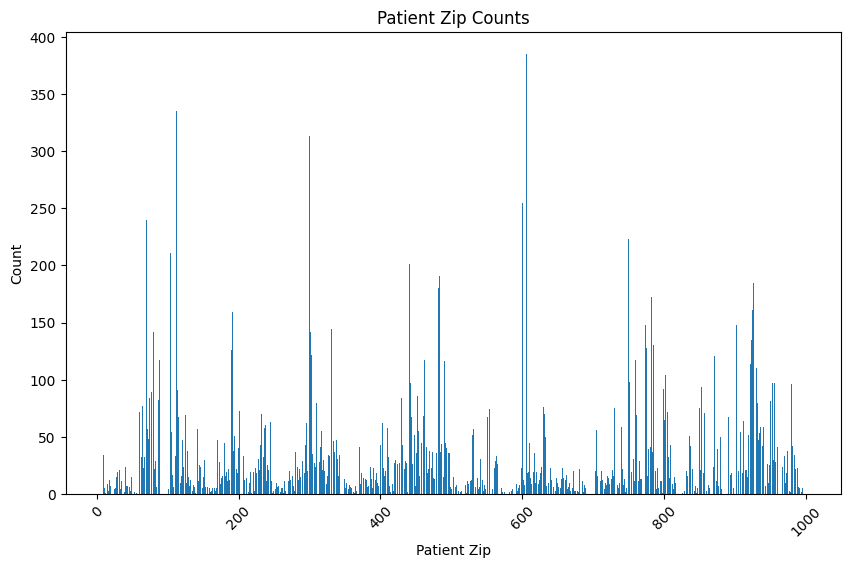

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(patient_zip_count['patient_zip3'], patient_zip_count['count'])
plt.xlabel('Patient Zip')
plt.ylabel('Count')
plt.title('Patient Zip Counts')
plt.xticks(rotation=45)
plt.show()

# split breast cancer diagnosis into sides and quadrants

In [8]:
map_cancer_desc = {
    'Malignant neoplasm of ovrlp sites of right female breast': {'side':'R', 'quadrant':'overlap'},
    'Malig neoplasm of upper-outer quadrant of left female breast': {'side':'L', 'quadrant':'UO'},
    'Malig neoplasm of upper-inner quadrant of left female breast': {'side':'L', 'quadrant':'UI'},
    'Malignant neoplasm of breast (female), unspecified': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malig neoplm of lower-inner quadrant of right female breast': {'side':'R', 'quadrant':'LI'},
    'Malignant neoplasm of upper-inner quadrant of female breast': {'side':'unspecified', 'quadrant':'UI'},
    'Malignant neoplasm of central portion of left female breast': {'side':'L', 'quadrant':'central'},
    'Malignant neoplasm of unspecified site of left female breast': {'side':'L', 'quadrant':'unspecified'},
    'Malig neoplm of upper-inner quadrant of right female breast': {'side':'R', 'quadrant':'UI'},
    'Malignant neoplasm of unsp site of unspecified female breast': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malignant neoplasm of unsp site of right female breast': {'side':'R', 'quadrant':'unspecified'},
    'Malig neoplm of upper-outer quadrant of right female breast': {'side':'R', 'quadrant':'UO'},
    'Malig neoplasm of lower-inner quadrant of left female breast': {'side':'L', 'quadrant':'LI'},
    'Malignant neoplasm of nipple and areola, left female breast': {'side':'L', 'quadrant':'nipple'},
    'Malignant neoplasm of lower-outer quadrant of female breast': {'side':'unspecified', 'quadrant':'LO'},
    'Malignant neoplasm of other specified sites of female breast': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malig neoplm of lower-outer quadrant of right female breast': {'side':'R', 'quadrant':'LO'},
    'Malignant neoplasm of central portion of breast, female': {'side':'unspecified', 'quadrant':'central'},
    'Malignant neoplasm of lower-inner quadrant of female breast': {'side':'unspecified', 'quadrant':'LI'},
    'Malignant neoplasm of ovrlp sites of left female breast': {'side':'L', 'quadrant':'overlap'},
    'Malignant neoplasm of central portion of right female breast': {'side':'R', 'quadrant':'central'},
    'Malignant neoplasm of nipple and areola, right female breast': {'side':'R', 'quadrant':'nipple'},
    'Malignant neoplasm of axillary tail of left female breast': {'side':'L', 'quadrant':'axillary tail'},
    'Malignant neoplasm of upper-outer quadrant of female breast': {'side':'unspecified', 'quadrant':'UO'},
    'Malig neoplasm of upper-outer quadrant of unsp female breast': {'side':'unspecified', 'quadrant':'UO'},
    'Malig neoplasm of lower-outer quadrant of left female breast': {'side':'L', 'quadrant':'LO'},
    'Malignant neoplasm of central portion of unsp female breast': {'side':'unspecified', 'quadrant':'central'},
    'Malig neoplasm of lower-outer quadrant of unsp female breast': {'side':'unspecified', 'quadrant':'LO'},
    'Malignant neoplasm of axillary tail of right female breast': {'side':'R', 'quadrant':'axillary tail'},
    'Malignant neoplasm of ovrlp sites of unsp female breast': {'side':'unspecified', 'quadrant':'overlap'},
    'Malignant neoplasm of upper-outer quadrant of breast, female': {'side':'unspecified', 'quadrant':'UO'},
    'Malignant neoplasm of overlapping sites of breast, female': {'side':'unspecified', 'quadrant':'overlap'},
    'Malignant neoplasm of central portion of female breast': {'side':'unspecified', 'quadrant':'central'},
    'Malignant neoplasm of axillary tail of breast, female': {'side':'unspecified', 'quadrant':'axillary tail'},
    'Malignant neoplasm of breast of unspecified site, female': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malig neoplasm of upper-inner quadrant of unsp female breast': {'side':'unspecified', 'quadrant':'UI'},
    'Secondary malignant neoplasm of breast': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malignant neoplasm of lower-outer quadrant of breast, female': {'side':'unspecified', 'quadrant':'LO'},
    'Malignant neoplasm of axillary tail of unsp female breast': {'side':'unspecified', 'quadrant':'axillary tail'},
    'Malignant neoplasm of nipple and areola, unsp female breast': {'side':'unspecified', 'quadrant':'nipple'},
    'Malig neoplasm of lower-inner quadrant of unsp female breast': {'side':'unspecified', 'quadrant':'LI'},
    'Malignant neoplasm of axillary tail of female breast': {'side':'unspecified', 'quadrant':'axillary tail'},
    'Malignant neoplasm of unsp site of unspecified male breast': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malig neoplasm of lower-outer quadrant of right male breast': {'side':'R', 'quadrant':'LO'},
    'Malig neoplasm of upper-inner quadrant of left male breast': {'side':'L', 'quadrant':'UI'},
    'Malignant neoplasm of upper-inner quadrant of breast, female': {'side':'unspecified', 'quadrant':'UI'},
    'Malignant neoplasm of nipple and areola of female breast': {'side':'unspecified', 'quadrant':'nipple'},
    'Malignant neoplasm of nipple and areola, female': {'side':'unspecified', 'quadrant':'nipple'},
    'Malignant neoplasm of nipple and areola, right male breast': {'side':'R', 'quadrant':'nipple'},
    'Malignant neoplasm of central portion of right male breast': {'side':'R', 'quadrant':'central'},
    'Malignant neoplasm of lower-inner quadrant of breast, female': {'side':'unspecified', 'quadrant':'LI'},
    'Malig neoplasm of lower-outer quadrant of left male breast': {'side':'L', 'quadrant':'LO'},
    'Malig neoplasm of upper-outer quadrant of right male breast': {'side':'R', 'quadrant':'UO'},
    'Malig neoplasm of upper-inner quadrant of right male breast': {'side':'R', 'quadrant':'UI'},
    'Malignant neoplasm of other and unspecified sites of male breast': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malignant neoplasm of unspecified site of right male breast': {'side':'R', 'quadrant':'unspecified'},
    'Malig neoplasm of lower-inner quadrant of left male breast': {'side':'L', 'quadrant':'LI'},
    'Malig neoplasm of upper-outer quadrant of left male breast': {'side':'L', 'quadrant':'UO'},
    'Malignant neoplasm of breast': {'side':'unspecified', 'quadrant':'unspecified'},
    'Malignant neoplasm of nipple and areola, left male breast': {'side':'L', 'quadrant':'nipple'},
    'Malignant neoplasm of axillary tail of right male breast': {'side':'R', 'quadrant':'axillary tail'},
}

In [9]:
df['side'] = df['breast_cancer_diagnosis_desc'].apply(lambda x: map_cancer_desc[x]['side'])
df['quadrant'] = df['breast_cancer_diagnosis_desc'].apply(lambda x: map_cancer_desc[x]['quadrant'])

In [10]:
df['side'].value_counts(dropna=False)

side
L              15031
R              14783
unspecified     9705
Name: count, dtype: int64

In [11]:
df['quadrant'].value_counts(dropna=False)

quadrant
unspecified      19146
UO                8419
overlap           3787
UI                2499
central           1741
LO                1700
LI                1125
nipple             781
axillary tail      321
Name: count, dtype: int64

# group metastasis codes into organs

In [12]:
ICD10_code_description_dict = {
    'C770':"Secondary and unspecified malignant neoplasm of lymph nodes of head, face and neck", 
 'C771': "Secondary and unspecified malignant neoplasm of intrathoracic lymph nodes",
 'C772': "Secondary and unspecified malignant neoplasm of intra-abdominal lymph nodes", 
 'C773': "Secondary and unspecified malignant neoplasm of axilla and upper limb lymph nodes",
 'C774': "Secondary and unspecified malignant neoplasm of inguinal and lower limb lymph nodes",
 'C775': "Secondary and unspecified malignant neoplasm of intrapelvic lymph nodes",
 'C778': "Secondary and unspecified malignant neoplasm of lymph nodes of multiple regions",
 'C779': "Secondary and unspecified malignant neoplasm of lymph node, unspecified",
 'C7800': "Secondary malignant neoplasm of unspecified lung",
 'C7801': "Secondary malignant neoplasm of right lung",
 'C7802': "Secondary malignant neoplasm of left lung",
 'C781': "Secondary malignant neoplasm of mediastinum",
 'C782': "Secondary malignant neoplasm of pleura",
 'C7830': "Secondary malignant neoplasm of unspecified respiratory organ",
 'C7839': "Secondary malignant neoplasm of other respiratory organs",
 'C784': "Secondary malignant neoplasm of small intestine" ,
 'C785':"Secondary malignant neoplasm of large intestine and rectum",
'C786':"Secondary malignant neoplasm of retroperitoneum and peritoneum",
'C787': "Secondary malignant neoplasm of liver and intrahepatic bile duct",
 'C7880': "Secondary malignant neoplasm of unspecified digestive organ",
'C7889': "Secondary malignant neoplasm of other digestive organs",
 'C7900': "Secondary malignant neoplasm of unspecified kidney and renal pelvis", 
 'C7901': "Secondary malignant neoplasm of right kidney and renal pelvis", 
 'C7902': "Secondary malignant neoplasm of left kidney and renal pelvis",
'C7910': "Secondary malignant neoplasm of unspecified urinary organs",
'C792': "Secondary malignant neoplasm of skin",
 'C7931': "Secondary malignant neoplasm of brain", 
 'C7932': "Secondary malignant neoplasm of cerebral meninges",
 'C7940': "Secondary malignant neoplasm of unspecified part of nervous system", 
 'C7949': "Secondary malignant neoplasm of other parts of nervous system",
'C7951': "Secondary malignant neoplasm of bone",
'C7952': "Secondary malignant neoplasm of bone marrow" ,
 'C7960': "Secondary malignant neoplasm of unspecified ovary",
'C7961': "Secondary malignant neoplasm of right ovary",
'C7962': "Secondary malignant neoplasm of left ovary",
 'C7970':"Secondary malignant neoplasm of unspecified adrenal gland",
 'C7971': "Secondary malignant neoplasm of right adrenal gland",
'C7972': "Secondary malignant neoplasm of left adrenal gland",
'C7981':"Secondary malignant neoplasm of breast",
'C7982': "Secondary malignant neoplasm of genital organs",
'C7989': "Secondary malignant neoplasm of other specified sites",
 'C799': "Secondary malignant neoplasm of unspecified site"}

In [13]:
map_metas_code_to_organ = {
    'C770':"lymph nodes of head, face and neck", 
 'C771': "intrathoracic lymph nodes",
 'C772': "intra-abdominal lymph nodes", 
 'C773': "axilla and upper limb lymph nodes",
 'C774': "inguinal and lower limb lymph nodes",
 'C775': "intrapelvic lymph nodes",
 'C778': "lymph nodes of multiple regions",
 'C779': "lymph node, unspecified",
 'C7800': "lung",
 'C7801': "lung",
 'C7802': "lung",
 'C781': "mediastinum",
 'C782': "lung",
 'C7830': "lung",
 'C7839': "lung",
 'C784': "intestine" ,
 'C785':"intestine",
'C786':"retroperitoneum and peritoneum",
'C787': "liver",
 'C7880': "unspecified digestive organ",
'C7889': "unspecified digestive organ",
 'C7900': "kidney and other urinary organs", 
 'C7901': "kidney and other urinary organs", 
 'C7902': "kidney and other urinary organs",
'C7910': "kidney and other urinary organs",
    'C7911': 'kidney and other urinary organs',
'C792': "skin",
 'C7931': "brain", 
 'C7932': "brain",
 'C7940': "brain", 
 'C7949': "brain",
'C7951': "bone",
'C7952': "bone" ,
 'C7960': "ovary",
'C7961': "ovary",
'C7962': "ovary",
 'C7970':"adrenal gland",
 'C7971': "adrenal gland",
'C7972': "adrenal gland",
'C7981':"unspecified",
'C7982': "ovary",
'C7989': "unspecified",
 'C799': "unspecified"}

In [14]:
df['metastatic_organ'] = df['metastatic_cancer_diagnosis_code'].apply(lambda x: map_metas_code_to_organ[x])

In [15]:
df['metastatic_organ'].value_counts(dropna=False)

metastatic_organ
axilla and upper limb lymph nodes      26298
bone                                    3967
unspecified                             2411
lymph node, unspecified                 1736
lung                                    1467
liver                                   1382
brain                                    458
intrathoracic lymph nodes                455
lymph nodes of head, face and neck       409
skin                                     317
lymph nodes of multiple regions          249
intra-abdominal lymph nodes               99
retroperitoneum and peritoneum            84
mediastinum                               62
unspecified digestive organ               26
adrenal gland                             25
ovary                                     23
intestine                                 23
kidney and other urinary organs           12
inguinal and lower limb lymph nodes       10
intrapelvic lymph nodes                    6
Name: count, dtype: int64

In [16]:
map_treatment_to_generic = {
     'ATEZOLIZUMAB':'ATEZOLIZUMAB',
     'BEVACIZUMAB':'BEVACIZUMAB',
     'BLEOMYCIN SULFATE':'BLEOMYCIN',
     'CAPECITABINE':'CAPECITABINE',
     'CARBOPLATIN':'CARBOPLATIN',
     'CISPLATIN':'CISPLATIN',
     'CYCLOPHOSPHAMIDE':'CYCLOPHOSPHAMIDE',
     'DOCETAXEL':'DOCETAXEL',
     'DOCETAXEL ANHYDROUS':'DOCETAXEL',
     'DOXORUBICIN HCL':'DOXORUBICIN',
     'DOXORUBICIN HCL LIPOSOMAL':'DOXORUBICIN',
     'DOXORUBICIN HYDROCHLORIDE':'DOXORUBICIN',
     'DRUG ASSAY EVEROLIMUS':'EVEROLIMUS',
     'EPIRUBICIN HCL':'EPIRUBICIN',
     'EPIRUBICIN HYDROCHLORIDE':'EPIRUBICIN',
     'ERIBULIN MESYLATE':'ERIBULIN',
     'ERLOTINIB HYDROCHLORIDE':'ERLOTINIB',
     'ETOPOSIDE':'ETOPOSIDE',
     'EVEROLIMUS':'EVEROLIMUS',
     'GEMCITABINE HCL':'GEMCITABINE',
     'GEMCITABINE HYDROCHLORIDE':'GEMCITABINE',
     'IPILIMUMAB':'IPILIMUMAB',
     'IRINOTECAN HCL':'IRINOTECAN',
     'IXABEPILONE':'IXABEPILONE',
     'Inj gemcitabine hcl (accord)':'GEMCITABINE',
     'METHOTREXATE':'METHOTREXATE',
     'METHOTREXATE SODIUM':'METHOTREXATE',
     'NIRAPARIB':'NIRAPARIB',
     'NIVOLUMAB':'NIVOLUMAB',
     'PACLITAXEL':'PACLITAXEL',
     'PACLITAXEL PROTEIN BOUND PARTICLES':'PACLITAXEL',
     'PAZOPANIB HYDROCHLORIDE':'PAZOPANIB',
     'PEMETREXED DISODIUM':'PEMETREXED',
     'PEMETREXED DISODIUM HEPTAHYDRATE':'PEMETREXED',
     'RUCAPARIB CAMSYLATE':'RUCAPARIB',
     'TALAZOPARIB TOSYLATE':'TALAZOPARIB',
     'TEMOZOLOMIDE':'TEMOZOLOMIDE',
     'THALIDOMIDE':'THALIDOMIDE',
     'TOPOTECAN HCL':'TOPOTECAN',
     'VINORELBINE TARTRATE':'VINORELBINE'
}

In [17]:
df['cleaned_metastatic_first_treatment'] = df['metastatic_first_treatment'].apply(lambda x:map_treatment_to_generic[x])

In [18]:
df['cleaned_metastatic_first_treatment'].value_counts(dropna=False)

cleaned_metastatic_first_treatment
DOXORUBICIN         14703
CARBOPLATIN          6490
CYCLOPHOSPHAMIDE     5952
PACLITAXEL           4982
CAPECITABINE         2368
DOCETAXEL            1849
EVEROLIMUS            769
ERIBULIN              555
GEMCITABINE           544
METHOTREXATE          348
BEVACIZUMAB           316
VINORELBINE           310
CISPLATIN             150
IXABEPILONE            70
NIVOLUMAB              24
IRINOTECAN             19
TEMOZOLOMIDE           15
IPILIMUMAB              9
PEMETREXED              9
ERLOTINIB               8
EPIRUBICIN              5
ATEZOLIZUMAB            5
ETOPOSIDE               4
TOPOTECAN               4
PAZOPANIB               3
BLEOMYCIN               3
TALAZOPARIB             2
THALIDOMIDE             1
RUCAPARIB               1
NIRAPARIB               1
Name: count, dtype: int64

In [19]:
map_generic_to_type = {
 'ATEZOLIZUMAB':'monoclonal antibody',
 'BEVACIZUMAB':'monoclonal antibody',
 'BLEOMYCIN':'chemotherapy',
 'CAPECITABINE':'chemotherapy',
 'CARBOPLATIN':'chemotherapy',
 'CISPLATIN':'chemotherapy',
 'CYCLOPHOSPHAMIDE':'chemotherapy',
 'DOCETAXEL':'chemotherapy',
 'DOXORUBICIN':'chemotherapy',
 'EPIRUBICIN':'chemotherapy',
 'ERIBULIN':'chemotherapy',
 'ERLOTINIB':'small molecule inhibitor',
 'ETOPOSIDE':'chemotherapy',
 'EVEROLIMUS':'small molecule inhibitor',
 'GEMCITABINE':'chemotherapy',
 'IPILIMUMAB':'monoclonal antibody',
 'IRINOTECAN':'chemotherapy',
 'IXABEPILONE':'chemotherapy',
 'METHOTREXATE':'chemotherapy',
 'NIRAPARIB':'small molecule inhibitor',
 'NIVOLUMAB':'monoclonal antibody',
 'PACLITAXEL':'chemotherapy',
 'PAZOPANIB':'small molecule inhibitor',
 'PEMETREXED':'chemotherapy',
 'RUCAPARIB':'small molecule inhibitor',
 'TALAZOPARIB':'small molecule inhibitor',
 'TEMOZOLOMIDE':'chemotherapy',
 'THALIDOMIDE':'chemotherapy',
 'TOPOTECAN':'chemotherapy',
 'VINORELBINE':'chemotherapy'
}

In [20]:
df['cleaned_metastatic_first_treatment_type'] = df['cleaned_metastatic_first_treatment'].apply(lambda x:map_generic_to_type[x])


In [21]:
df['cleaned_metastatic_first_treatment_type'].value_counts(dropna=False)

cleaned_metastatic_first_treatment_type
chemotherapy                38381
small molecule inhibitor      784
monoclonal antibody           354
Name: count, dtype: int64

In [22]:
df['metastatic_first_novel_treatment'].value_counts(dropna=False)

metastatic_first_novel_treatment
NaN              39190
PEMBROLIZUMAB      174
OLAPARIB           155
Name: count, dtype: int64

In [23]:
new_df = pd.read_csv(output_path)

In [24]:
new_df = new_df[new_df['allocated_set'] == 'train']
new_df

patient_id patient_race          payer_type patient_state  \
0          994155        Asian          COMMERCIAL            CA   
1          154389          NaN  MEDICARE ADVANTAGE            OH   
2          387343          NaN          COMMERCIAL            TX   
3          921275     Hispanic            MEDICAID            CA   
4          803454          NaN          COMMERCIAL            NY   
...           ...          ...                 ...           ...   
27669      728161          NaN          COMMERCIAL            MO   
27670      203896          NaN          COMMERCIAL            IN   
27671      740115     Hispanic            MEDICAID            TX   
27672      122759          NaN          COMMERCIAL            AZ   
27673      849565        Black                 NaN            CA   

       patient_zip3  patient_age patient_gender    bmi  \
0               917           46              F  27.00   
1               451           63              F    NaN   
2               773           53              F    NaN   
3               928           50              F    NaN   
4               112           39              F  18.00   
...             ...          ...            ...    ...   
27669           653           52              F    NaN   
27670           462           39              F    NaN   
27671           769           41              F    NaN   
27672           853           53              F    NaN   
27673           923           53              F  28.84   

      breast_cancer_diagnosis_code  \
0                           C50811   
1                           C50412   
2                           C50212   
3                             1749   
4                             1749   
...                            ...   
27669                       C50911   
27670                       C50812   
27671                       C50812   
27672                         1749   
27673                         1744   

                            breast_cancer_diagnosis_desc  ...  commute_time  \
0      Malignant neoplasm of ovrlp sites of right fem...  ...     32.530435   
1      Malig neoplasm of upper-outer quadrant of left...  ...     31.890909   
2      Malig neoplasm of upper-inner quadrant of left...  ...     32.556250   
3      Malignant neoplasm of breast (female), unspeci...  ...     30.606061   
4      Malignant neoplasm of breast (female), unspeci...  ...     42.502632   
...                                                  ...  ...           ...   
27669  Malignant neoplasm of unsp site of right femal...  ...     25.770968   
27670  Malignant neoplasm of ovrlp sites of left fema...  ...     23.686111   
27671  Malignant neoplasm of ovrlp sites of left fema...  ...     21.588889   
27672  Malignant neoplasm of breast (female), unspeci...  ...     26.421875   
27673  Malignant neoplasm of upper-outer quadrant of ...  ...     30.925000   

      health_uninsured    veteran treatment_pd allocated_set         side  \
0             7.263043   3.810870         35.0         train            R   
1             7.631915   9.631915         33.0         train            L   
2            16.396226  10.392453         24.0         train            L   
3             7.018182   4.103030        455.0         train  unspecified   
4             6.392105   1.755263        162.0         train  unspecified   
...                ...        ...          ...           ...          ...   
27669         9.787097   9.780645         25.0         train            R   
27670         8.537838   6.191892         22.0         train            L   
27671        16.104545   9.513043         28.0         train            L   
27672        11.176471  12.642029        169.0         train  unspecified   
27673         8.478689   7.424590         91.0         train  unspecified   

          quadrant                   metastatic_organ  \
0          overlap            lymph node, unspecified   
1               UO                              

In [25]:
import numpy as np
np.unique(new_df['cleaned_metastatic_first_treatment_type'])

array(['chemotherapy', 'monoclonal antibody', 'small molecule inhibitor'],
      dtype=object)

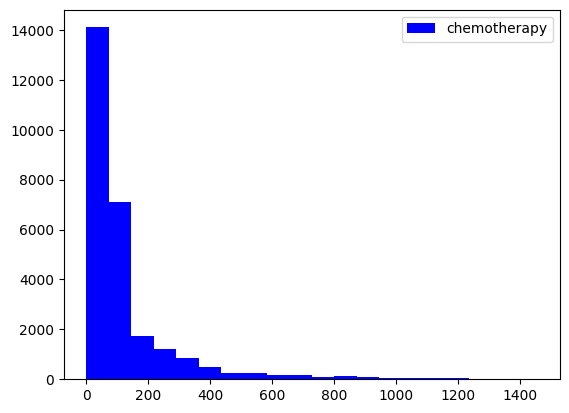

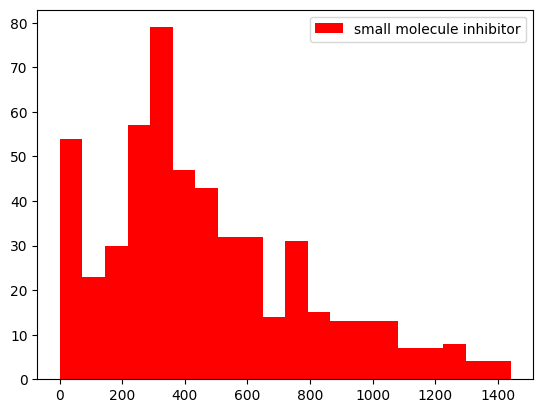

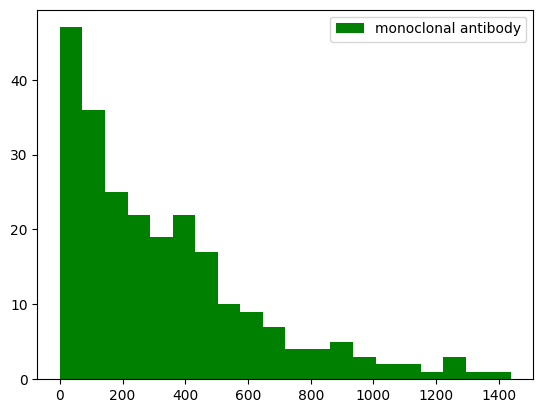

In [26]:
import matplotlib.pyplot as plt
plt.hist(new_df[new_df['cleaned_metastatic_first_treatment_type'] == 'chemotherapy']['treatment_pd'], bins=20, label = 'chemotherapy', color='blue')
plt.legend()
plt.show()
plt.hist(new_df[new_df['cleaned_metastatic_first_treatment_type'] == 'small molecule inhibitor']['treatment_pd'], bins=20, label = 'small molecule inhibitor', color='red')
plt.legend()
plt.show()
plt.hist(new_df[new_df['cleaned_metastatic_first_treatment_type'] == 'monoclonal antibody']['treatment_pd'], bins=20, label = 'monoclonal antibody', color='green')
plt.legend()
plt.show()

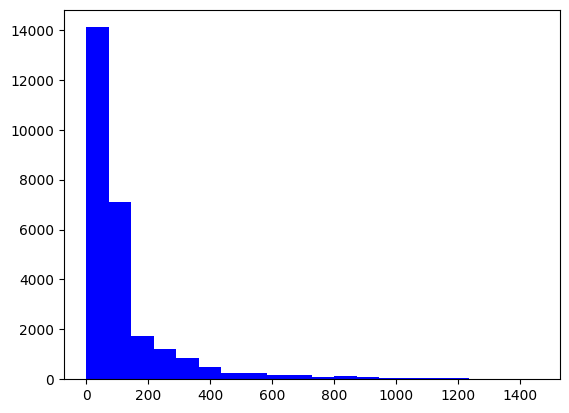

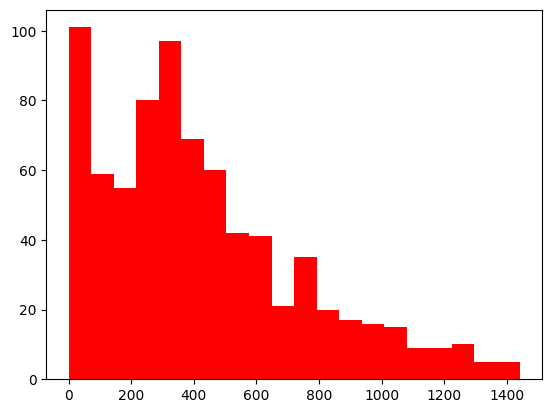

In [27]:
import matplotlib.pyplot as plt
plt.hist(new_df[new_df['cleaned_metastatic_first_treatment_type'] == 'chemotherapy']['treatment_pd'], bins=20, label = 'chemotherapy', color='blue')
plt.show()
plt.hist(new_df[new_df['cleaned_metastatic_first_treatment_type'] != 'chemotherapy']['treatment_pd'], bins=20, label = 'chemotherapy', color='red')
plt.show()

In [28]:
condition_OLAPARIB= new_df['metastatic_first_novel_treatment'] == 'OLAPARIB'
condition_PEMBROLIZUMAB = new_df['metastatic_first_novel_treatment'] == 'PEMBROLIZUMAB'


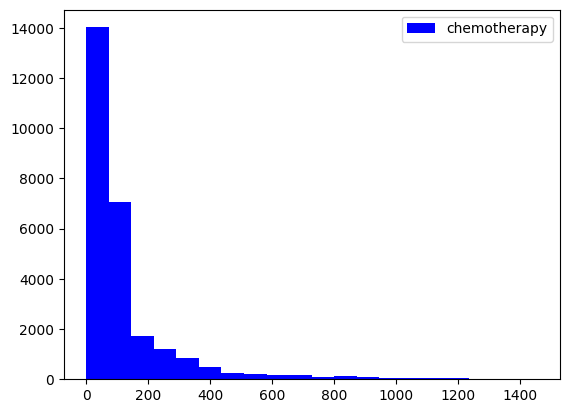

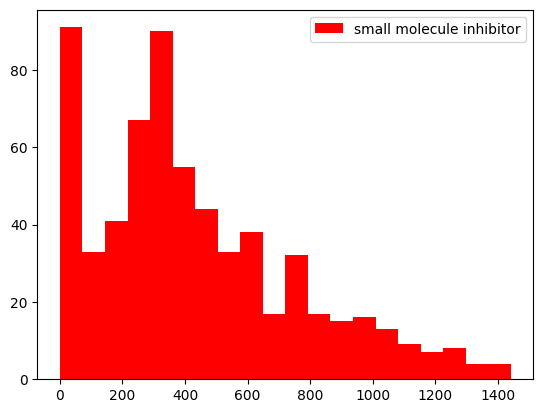

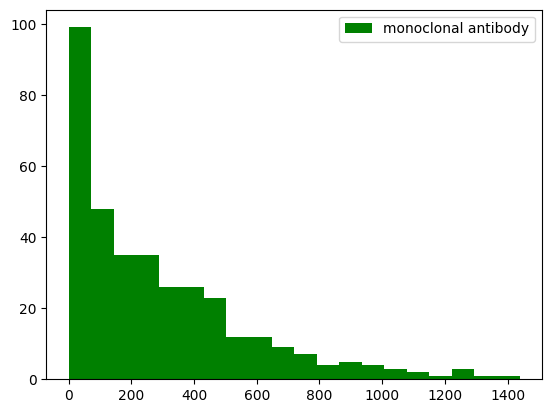

In [29]:
import matplotlib.pyplot as plt

# Assuming new_df is your DataFrame and condition_OLAPARIB and condition_PEMBROLIZUMAB are some conditions defined in your code.

# For chemotherapy
condition_chemo = (new_df['cleaned_metastatic_first_treatment_type'] == 'chemotherapy') & (~condition_OLAPARIB) & (~condition_PEMBROLIZUMAB)
plt.hist(new_df[condition_chemo]['treatment_pd'], bins=20, label='chemotherapy', color='blue')
plt.legend()
plt.show()

# For small molecule inhibitor
condition_smi = (new_df['cleaned_metastatic_first_treatment_type'] == 'small molecule inhibitor') | (condition_OLAPARIB)
plt.hist(new_df[condition_smi]['treatment_pd'], bins=20, label='small molecule inhibitor', color='red')
plt.legend()
plt.show()

# For monoclonal antibody
condition_mab = (new_df['cleaned_metastatic_first_treatment_type'] == 'monoclonal antibody') | (condition_PEMBROLIZUMAB)
plt.hist(new_df[condition_mab]['treatment_pd'], bins=20, label='monoclonal antibody', color='green')
plt.legend()
plt.show()


# Perform analysis on patient and population level data

In [30]:
new_train_df = df[df['allocated_set'] == 'train']
new_train_df.drop(columns=['allocated_set'], inplace=True)

/var/folders/r3/mc640yrn2_70d_7zvw5cc3q00000gn/T/ipykernel_91856/3118137996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_df.drop(columns=['allocated_set'], inplace=True)


# Check that datapoint of same zipcode share same population features

In [31]:
import pandas as pd

# Set the display options to show all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame
new_train_df[new_train_df['patient_zip3'] == 917].head()

patient_id patient_race  payer_type patient_state  patient_zip3  \
0        994155        Asian  COMMERCIAL            CA           917   
79       435012        Black    MEDICAID            CA           917   
114      818224        White    MEDICAID            CA           917   
119      764010        White         NaN            CA           917   
186      120556        White  COMMERCIAL            CA           917   

     patient_age patient_gender    bmi breast_cancer_diagnosis_code  \
0             46              F  27.00                       C50811   
79            46              F    NaN                       C50212   
114           57              F  31.82                       C50911   
119           49              F  20.94                       C50412   
186           58              F  26.78                       C50811   

                          breast_cancer_diagnosis_desc  \
0    Malignant neoplasm of ovrlp sites of right fem...   
79   Malig neoplasm of upper-inner quadrant of left...   
114  Malignant neoplasm of unsp site of right femal...   
119  Malig neoplasm of upper-outer quadrant of left...   
186  Malignant neoplasm of ovrlp sites of right fem...   

     breast_cancer_diagnosis_year metastatic_cancer_diagnosis_code  \
0                            2018                             C779   
79                           2015                             C773   
114                          2015                             C773   
119                          2016                             C773   
186                          2017                             C773   

    metastatic_first_treatment metastatic_first_treatment_type  \
0              DOXORUBICIN HCL                             NaN   
79                  PACLITAXEL                 Antineoplastics   
114            DOXORUBICIN HCL                             NaN   
119           CYCLOPHOSPHAMIDE                 Antineoplastics   
186            DOXORUBICIN HCL                             NaN   

    metastatic_first_novel_treatment metastatic_first_novel_treatment_type  \
0                                NaN                                   NaN   
79                               NaN                                   NaN   
114                              NaN                                   NaN   
119                              NaN                                   NaN   
186                              NaN                                   NaN   

    region division  population      density  age_median  age_under_10  \
0     West  Pacific       43031  2048.578261   38.852174     11.306522   
79    West  Pacific       43031  2048.578261   38.852174     11.306522   
114   West  Pacific       43031  2048.578261   38.852174     11.306522   
119   West  Pacific       43031  2048.578261   38.852174     11.306522   
186   West  Pacific       43031  2048.578261   38.852174     11.306522   

     age_10_to_19    age_20s    age_30s   age_40s    age_50s    age_60s  \
0       12.897826  14.121739  13.532609  13.16087  13.378261  11.473913   
79      12.897826  14.121739  13.532609  13.16087  13.378261  11.473913   
114     12.897826  14.121739  13.532609  13.16087  13.378261  11.473913   
119     12.897826  14.121739  13.532609  13.16087  13.378261  11.473913   
186     12.897826  14.121739  13.532609  13.16087  13.378261  11.473913   

      age_70s  age_over_80       male     female    married   divorced  \
0    6.380435     3.736957  49.052174  50.947826  48.504348  10.117391   
79   6.380435     3.736957  49.052174  50.947826  48.504348  10.117391   
114  6.380435     3.736957  49.052174  50.947826  48.504348  10.117391   
119  6.380435     3.736957  49.052174  50.947826  48.504348  10.117391   
186  6.380435     3.736957  49.052174  50.947826  48.504348  10.117391   

     never_married   widowed  family_size  family_dual_income  \
0        36.408696  4.969565     3.674783           59.219565   
79       36.408696  4.969565     3.674

In [32]:
patient_level_features = ['patient_id', 'patient_race', 'payer_type', 'patient_state',
       'patient_zip3', 'patient_age', 'patient_gender', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'breast_cancer_diagnosis_year', 'metastatic_cancer_diagnosis_code',
       'metastatic_first_treatment', 'metastatic_first_treatment_type',
       'metastatic_first_novel_treatment',
       'metastatic_first_novel_treatment_type', 'side', 'quadrant',
       'metastatic_organ', 'cleaned_metastatic_first_treatment',
       'cleaned_metastatic_first_treatment_type', 'treatment_pd']

# Extract the patient level features

In [33]:
patient_level_features_df = new_train_df[patient_level_features]
patient_level_features_df_float = patient_level_features_df.select_dtypes(include=['float64'])
patient_level_features_df_float['patient_zip3'] = patient_level_features_df['patient_zip3']

In [34]:
def scatter_plot_variable_vs_target(df, variable, target, title):
    plt.scatter(df[variable], df[target])
    plt.title(title)
    plt.xlabel(variable)
    plt.ylabel(target)
    plt.show()

## patient level feature scatterplots

In [35]:
# there is an outlier in the bmi column
patient_level_features_df_float[patient_level_features_df_float['bmi'] <90]

bmi  treatment_pd  patient_zip3
0      27.00          35.0           917
4      18.00         162.0           112
21     38.37          27.0           283
22     23.22         125.0           297
24     34.85          70.0           913
...      ...           ...           ...
27661  24.27         113.0           917
27663  28.00         235.0            73
27664  24.42         701.0           486
27665  32.52          86.0            58
27673  28.84          91.0           923

[8748 rows x 3 columns]

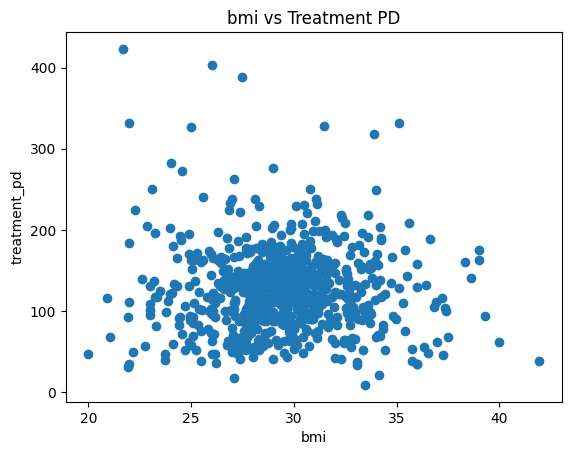

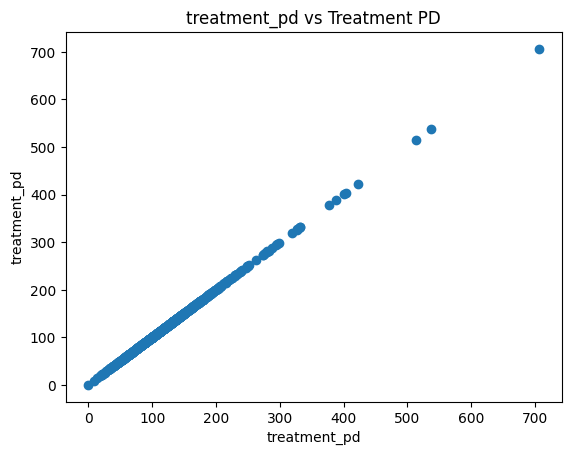

In [36]:

for variable in patient_level_features_df_float.columns[:-1]:
    # scatter_plot_variable_vs_target(patient_level_features_df_float[patient_level_features_df_float['bmi'] <90], variable, 'treatment_pd', variable + ' vs Treatment PD')
    scatter_plot_variable_vs_target(patient_level_features_df_float.groupby('patient_zip3').mean(), variable, 'treatment_pd', variable + ' vs Treatment PD')

In [37]:
patient_level_features_object = [i for i in patient_level_features if new_train_df[i].dtype == 'object']
patient_level_features_df_object = new_train_df[patient_level_features_object]
patient_level_features_df_object['patient_zip3'] = train_df['patient_zip3']
patient_level_features_df_object['treatment_pd'] = train_df['treatment_pd']

/var/folders/r3/mc640yrn2_70d_7zvw5cc3q00000gn/T/ipykernel_91856/2746835467.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_level_features_df_object['patient_zip3'] = train_df['patient_zip3']
/var/folders/r3/mc640yrn2_70d_7zvw5cc3q00000gn/T/ipykernel_91856/2746835467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_level_features_df_object['treatment_pd'] = train_df['treatment_pd']


In [38]:
patient_level_features_df_object

patient_race          payer_type patient_state patient_gender  \
0            Asian          COMMERCIAL            CA              F   
1              NaN  MEDICARE ADVANTAGE            OH              F   
2              NaN          COMMERCIAL            TX              F   
3         Hispanic            MEDICAID            CA              F   
4              NaN          COMMERCIAL            NY              F   
...            ...                 ...           ...            ...   
27669          NaN          COMMERCIAL            MO              F   
27670          NaN          COMMERCIAL            IN              F   
27671     Hispanic            MEDICAID            TX              F   
27672          NaN          COMMERCIAL            AZ              F   
27673        Black                 NaN            CA              F   

      breast_cancer_diagnosis_code  \
0                           C50811   
1                           C50412   
2                           C50212   
3                             1749   
4                             1749   
...                            ...   
27669                       C50911   
27670                       C50812   
27671                       C50812   
27672                         1749   
27673                         1744   

                            breast_cancer_diagnosis_desc  \
0      Malignant neoplasm of ovrlp sites of right fem...   
1      Malig neoplasm of upper-outer quadrant of left...   
2      Malig neoplasm of upper-inner quadrant of left...   
3      Malignant neoplasm of breast (female), unspeci...   
4      Malignant neoplasm of breast (female), unspeci...   
...                                                  ...   
27669  Malignant neoplasm of unsp site of right femal...   
27670  Malignant neoplasm of ovrlp sites of left fema...   
27671  Malignant neoplasm of ovrlp sites of left fema...   
27672  Malignant neoplasm of breast (female), unspeci...   
27673  Malignant neoplasm of upper-outer quadrant of ...   

      metastatic_cancer_diagnosis_code metastatic_first_treatment  \
0                                 C779            DOXORUBICIN HCL   
1                                C7951            DOXORUBICIN HCL   
2                                 C773                 PACLITAXEL   
3                                 C787            GEMCITABINE HCL   
4                                C7989            DOXORUBICIN HCL   
...                                ...                        ...   
27669                             C773                CARBOPLATIN   
27670                             C773                CARBOPLATIN   
27671                             C773                 PACLITAXEL   
27672                             C773                CARBOPLATIN   
27673                             C773                CARBOPLATIN   

      metastatic_first_treatment_type metastatic_first_novel_treatment  \
0                                 NaN                              NaN   
1                                 NaN                              NaN   
2                     Antineoplastics                              NaN   
3                                 NaN                              NaN   
4                                 NaN                              NaN   
...                               ...                              ...   
27669                 Antineoplastics                              NaN   
27670                 Antineoplastics                              NaN   
27671                 Antineoplastics                              NaN   
27672                 Antineoplastics                              NaN   
27673                 Antineoplastics                              NaN   

      metastatic_first_novel_treatment_type         side     quadrant  \
0                                       NaN            R      overlap   
1                                       NaN            L           UO   
2                                     

## drop low variance columns or columns with high missingness

In [39]:
patient_level_features_df_object.drop(columns=['patient_gender', "metastatic_first_treatment_type", "metastatic_first_novel_treatment_type"], inplace=True)

/var/folders/r3/mc640yrn2_70d_7zvw5cc3q00000gn/T/ipykernel_91856/2762866165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_level_features_df_object.drop(columns=['patient_gender', "metastatic_first_treatment_type", "metastatic_first_novel_treatment_type"], inplace=True)


In [40]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
for i in patient_level_features_df_object.columns:
    print(i)
    model = ols('treatment_pd ~ C(' + i + ')', data=patient_level_features_df_object).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)

patient_race
                       sum_sq       df         F    PR(>F)
C(patient_race)  2.736714e+05      4.0  2.159567  0.070871
Residual         3.965545e+08  12517.0       NaN       NaN
payer_type
                     sum_sq       df          F        PR(>F)
C(payer_type)  4.209154e+06      2.0  60.433441  6.572797e-27
Residual       8.648717e+08  24835.0        NaN           NaN
patient_state
                        sum_sq       df         F        PR(>F)
C(patient_state)  5.215328e+06     51.0  2.913317  1.966588e-11
Residual          9.667962e+08  27543.0       NaN           NaN
breast_cancer_diagnosis_code
                                       sum_sq       df           F  PR(>F)
C(breast_cancer_diagnosis_code)  2.716555e+08     58.0  183.743634     0.0
Residual                         7.039198e+08  27615.0         NaN     NaN
breast_cancer_diagnosis_desc
                                       sum_sq       df           F  PR(>F)
C(breast_cancer_diagnosis_desc)  2.716555e+08    

KeyboardInterrupt: 

In [42]:
patient_level_features_df_object[patient_level_features_df_object["patient_zip3"] ==  877]

patient_race  payer_type patient_state breast_cancer_diagnosis_code  \
6            White    MEDICAID            NM                         1742   
8423           NaN  COMMERCIAL            NM                       C50911   
10690          NaN  COMMERCIAL            NM                       C50412   
16868          NaN  COMMERCIAL            NM                       C50812   
19272          NaN  COMMERCIAL            NM                       C50411   
24402          NaN  COMMERCIAL            NM                       C50411   
25740        White    MEDICAID            NM                       C50212   

                            breast_cancer_diagnosis_desc  \
6      Malignant neoplasm of upper-inner quadrant of ...   
8423   Malignant neoplasm of unsp site of right femal...   
10690  Malig neoplasm of upper-outer quadrant of left...   
16868  Malignant neoplasm of ovrlp sites of left fema...   
19272  Malig neoplm of upper-outer quadrant of right ...   
24402  Malig neoplm of upper-outer quadrant of right ...   
25740  Malig neoplasm of upper-inner quadrant of left...   

      metastatic_cancer_diagnosis_code metastatic_first_treatment  \
6                                C7951               CAPECITABINE   
8423                              C773            DOXORUBICIN HCL   
10690                             C773           CYCLOPHOSPHAMIDE   
16868                            C7951                  DOCETAXEL   
19272                             C773            DOXORUBICIN HCL   
24402                            C7981            DOXORUBICIN HCL   
25740                             C773            DOXORUBICIN HCL   

      metastatic_first_novel_treatment         side     quadrant  \
6                                  NaN  unspecified           UI   
8423                               NaN            R  unspecified   
10690                              NaN            L           UO   
16868                              NaN            L      overlap   
19272                              NaN            R           UO   
24402                              NaN            R           UO   
25740                              NaN            L           UI   

                        metastatic_organ cleaned_metastatic_first_treatment  \
6                                   bone                       CAPECITABINE   
8423   axilla and upper limb lymph nodes                        DOXORUBICIN   
10690  axilla and upper limb lymph nodes                   CYCLOPHOSPHAMIDE   
16868                               bone                          DOCETAXEL   
19272  axilla and upper limb lymph nodes                        DOXORUBICIN   
24402                        unspecified                        DOXORUBICIN   
25740  axilla and upper limb lymph nodes                        DOXORUBICIN   

      cleaned_metastatic_first_treatment_type  patient_zip3  treatment_pd  
6                                chemotherapy           877           393  
8423                             chemotherapy           877            69  
10690                            chemotherapy           877           225  
16868                            chemotherapy           877            10  
19272                            chemotherapy           877            23  
24402                            chemotherapy           877           115  
25740                            chemotherapy           877            35

In [ ]:
patient_level_features_df_object

patient_race          payer_type patient_state  \
0            Asian          COMMERCIAL            CA   
1              NaN  MEDICARE ADVANTAGE            OH   
2              NaN          COMMERCIAL            TX   
3         Hispanic            MEDICAID            CA   
4              NaN          COMMERCIAL            NY   
...            ...                 ...           ...   
27669          NaN          COMMERCIAL            MO   
27670          NaN          COMMERCIAL            IN   
27671     Hispanic            MEDICAID            TX   
27672          NaN          COMMERCIAL            AZ   
27673        Black                 NaN            CA   

      breast_cancer_diagnosis_code  \
0                           C50811   
1                           C50412   
2                           C50212   
3                             1749   
4                             1749   
...                            ...   
27669                       C50911   
27670                       C50812   
27671                       C50812   
27672                         1749   
27673                         1744   

                            breast_cancer_diagnosis_desc  \
0      Malignant neoplasm of ovrlp sites of right fem...   
1      Malig neoplasm of upper-outer quadrant of left...   
2      Malig neoplasm of upper-inner quadrant of left...   
3      Malignant neoplasm of breast (female), unspeci...   
4      Malignant neoplasm of breast (female), unspeci...   
...                                                  ...   
27669  Malignant neoplasm of unsp site of right femal...   
27670  Malignant neoplasm of ovrlp sites of left fema...   
27671  Malignant neoplasm of ovrlp sites of left fema...   
27672  Malignant neoplasm of breast (female), unspeci...   
27673  Malignant neoplasm of upper-outer quadrant of ...   

      metastatic_cancer_diagnosis_code metastatic_first_treatment  \
0                                 C779            DOXORUBICIN HCL   
1                                C7951            DOXORUBICIN HCL   
2                                 C773                 PACLITAXEL   
3                                 C787            GEMCITABINE HCL   
4                                C7989            DOXORUBICIN HCL   
...                                ...                        ...   
27669                             C773                CARBOPLATIN   
27670                             C773                CARBOPLATIN   
27671                             C773                 PACLITAXEL   
27672                             C773                CARBOPLATIN   
27673                             C773                CARBOPLATIN   

      metastatic_first_novel_treatment         side     quadrant  \
0                                  NaN            R      overlap   
1                                  NaN            L           UO   
2                                  NaN            L           UI   
3                                  NaN  unspecified  unspecified   
4                                  NaN  unspecified  unspecified   
...                                ...          ...          ...   
27669                              NaN            R  unspecified   
27670                              NaN            L      overlap   
27671                              NaN            L      overlap   
27672                              NaN  unspecified  unspecified   
27673                              NaN  unspecified           UO   

                        metastatic_organ cleaned_metastatic_first_treatment  \
0                lymph node, unspecified                        DOXORUBICIN   
1                                   bone                        DOXORUBICIN   
2      axilla and upper limb lymph nodes                         PACLITAXEL   
3                                  liver                        GEMCITABINE   
4                            unspecified                        DOXORUBICIN   
...                                

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
for i in patient_level_features_df_object.columns:
    for j in patient_level_features_df_object['patient_zip3'].unique():
        print(i, j)
        try:
            model = ols('treatment_pd ~ C(' + i + ')', data=patient_level_features_df_object[patient_level_features_df_object['patient_zip3'] == j]).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
        except:
            continue
        
        print(anova_table)



patient_race 917
                       sum_sq     df         F    PR(>F)
C(patient_race)  7.392852e+05    4.0  6.384629  0.000078
Residual         5.413248e+06  187.0       NaN       NaN
patient_race 451
                   sum_sq   df         F    PR(>F)
C(patient_race)  1128.125  1.0  1.103243  0.328459
Residual         7157.875  7.0       NaN       NaN
patient_race 773
                        sum_sq    df         F    PR(>F)
C(patient_race)   64828.757331   2.0  1.881349  0.171147
Residual         482421.113636  28.0       NaN       NaN
patient_race 928
                       sum_sq     df        F    PR(>F)
C(patient_race)  2.262098e+05    4.0  1.12657  0.346679
Residual         6.776840e+06  135.0      NaN       NaN
patient_race 112
                       sum_sq     df         F    PR(>F)
C(patient_race)  5.889061e+04    4.0  0.418468  0.795142
Residual         5.382885e+06  153.0       NaN       NaN
patient_race 462
                        sum_sq    df         F    PR(>F)
C(patie

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                        sum_sq    df         F    PR(>F)
C(patient_race)   17169.416667   2.0  0.332703  0.722912
Residual         335438.333333  13.0       NaN       NaN
patient_race 446
patient_race 617
                        sum_sq    df         F    PR(>F)
C(patient_race)   15067.587302   2.0  0.185254  0.832765
Residual         610009.357143  15.0       NaN       NaN
patient_race 770
                       sum_sq     df         F    PR(>F)
C(patient_race)  3.064115e+04    4.0  0.219391  0.927082
Residual         3.561441e+06  102.0       NaN       NaN
patient_race 953
                       sum_sq    df         F    PR(>F)
C(patient_race)  7.273235e+04   4.0  0.416475  0.795655
Residual         1.615402e+06  37.0       NaN       NaN
patient_race 562
patient_race 850
                       sum_sq    df         F    PR(>F)
C(patient_race)  6.268220e+04   3.0  0.581137  0.630832
Residual         1.438150e+06  40.0       NaN       NaN
patient_race 768
                  sum_sq   df   

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                        sum_sq   df         F    PR(>F)
C(patient_race)  100696.066667  1.0  0.979143  0.351391
Residual         822728.333333  8.0       NaN       NaN
patient_race 453
                        sum_sq    df        F    PR(>F)
C(patient_race)    1889.704261   1.0  0.30223  0.588892
Residual         118798.105263  19.0      NaN       NaN
patient_race 150
                        sum_sq   df          F    PR(>F)
C(patient_race)  532994.177778  1.0  58.061773  0.000062
Residual          73438.222222  8.0        NaN       NaN
patient_race 921
                       sum_sq    df         F   PR(>F)
C(patient_race)  2.190136e+05   4.0  2.948771  0.02506
Residual         1.485457e+06  80.0       NaN      NaN
patient_race 779
patient_race 760
                        sum_sq    df         F    PR(>F)
C(patient_race)   38078.232794   4.0  0.386825  0.816482
Residual         812113.346154  33.0       NaN       NaN
patient_race 416
patient_race 298
                       sum_sq   df    

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

patient_race 432
                       sum_sq    df         F    PR(>F)
C(patient_race)  17790.678571   3.0  1.759802  0.218131
Residual         33698.250000  10.0       NaN       NaN
patient_race 108
                  sum_sq   df         F    PR(>F)
C(patient_race)   7350.0  1.0  0.320989  0.671843
Residual         22898.0  1.0       NaN       NaN
patient_race 191
                       sum_sq     df         F    PR(>F)
C(patient_race)  2.805479e+05    4.0  2.111018  0.083475
Residual         4.053357e+06  122.0       NaN       NaN
patient_race 286
patient_race 140
                       sum_sq    df         F   PR(>F)
C(patient_race)  1.226367e+03   1.0  0.013806  0.90753
Residual         1.954185e+06  22.0       NaN      NaN
patient_race 541
patient_race 493
                     sum_sq    df         F    PR(>F)
C(patient_race)    32713.35   1.0  0.325872  0.577149
Residual         1405418.40  14.0       NaN       NaN
patient_race 937
                        sum_sq    df         F  

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/reg

                        sum_sq    df         F    PR(>F)
C(patient_race)   44845.344444   1.0  1.529213  0.238106
Residual         381235.055556  13.0       NaN       NaN
patient_race 83
                        sum_sq   df         F    PR(>F)
C(patient_race)   39588.222222  3.0  0.347026  0.793585
Residual         190130.666667  5.0       NaN       NaN
patient_race 398
                        sum_sq    df         F    PR(>F)
C(patient_race)   40674.850877   2.0  0.915289  0.420375
Residual         355514.833333  16.0       NaN       NaN
patient_race 403
                   sum_sq    df         F    PR(>F)
C(patient_race)   2737.80   1.0  0.662257  0.426399
Residual         74412.75  18.0       NaN       NaN
patient_race 784
                   sum_sq    df         F    PR(>F)
C(patient_race)   28496.2   2.0  0.489826  0.623599
Residual         378144.8  13.0       NaN       NaN
patient_race 844
patient_race 802
                       sum_sq    df         F    PR(>F)
C(patient_race)  2.88

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regr

                   sum_sq   df           F    PR(>F)
C(patient_race)  35610.75  2.0  556.417969  0.029963
Residual            32.00  1.0         NaN       NaN
patient_race 735
patient_race 123
                       sum_sq    df         F    PR(>F)
C(patient_race)  7.833628e+04   2.0  0.436084  0.653596
Residual         1.526903e+06  17.0       NaN       NaN
patient_race 457
                 sum_sq   df         F   PR(>F)
C(patient_race)   729.0  1.0  1.850254  0.30678
Residual          788.0  2.0       NaN      NaN
patient_race 716
patient_race 550
                       sum_sq    df        F    PR(>F)
C(patient_race)  7.717636e+04   2.0  0.75408  0.482219
Residual         1.125795e+06  22.0      NaN       NaN
patient_race 197
                       sum_sq   df         F   PR(>F)
C(patient_race)    330.285714  1.0  0.031443  0.86509
Residual         63025.714286  6.0       NaN      NaN
patient_race 339
                       sum_sq    df        F    PR(>F)
C(patient_race)   10481.4216

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regr

                     sum_sq   df         F    PR(>F)
C(patient_race)  400.166667  1.0  0.734925  0.548825
Residual         544.500000  1.0       NaN       NaN
patient_race 107
patient_race 281
patient_race 587
patient_race 456
                   sum_sq   df         F   PR(>F)
C(patient_race)   20667.0  1.0  0.152595  0.71598
Residual         541747.0  4.0       NaN      NaN
patient_race 148
patient_race 229
                        sum_sq   df        F    PR(>F)
C(patient_race)   25859.593407  3.0  0.32767  0.805594
Residual         236758.714286  9.0      NaN       NaN
patient_race 16
patient_race 244
                        sum_sq   df         F    PR(>F)
C(patient_race)   58432.533333  1.0  1.026334  0.350118
Residual         341599.466667  6.0       NaN       NaN
patient_race 786
                        sum_sq    df         F    PR(>F)
C(patient_race)   35132.543233   3.0  0.628688  0.603563
Residual         447058.421053  24.0       NaN       NaN
patient_race 681
                  

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regr

                       sum_sq    df         F    PR(>F)
C(patient_race)  1.150538e+05   2.0  0.438033  0.656086
Residual         1.444632e+06  11.0       NaN       NaN
patient_race 255
patient_race 376
                  sum_sq   df         F    PR(>F)
C(patient_race)  27380.0  1.0  1.743061  0.278445
Residual         47124.0  3.0       NaN       NaN
patient_race 603
                  sum_sq   df         F    PR(>F)
C(patient_race)  6500.25  2.0  0.637217  0.663076
Residual         5100.50  1.0       NaN       NaN
patient_race 226
                        sum_sq   df         F    PR(>F)
C(patient_race)   49364.742857  2.0  0.735597  0.512905
Residual         234879.357143  7.0       NaN       NaN
patient_race 243
                       sum_sq   df         F    PR(>F)
C(patient_race)   3960.333333  1.0  0.383953  0.569047
Residual         41258.500000  4.0       NaN       NaN
patient_race 185
                      sum_sq   df         F    PR(>F)
C(patient_race)  2233.347222  1.0  2.146012

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regre

                      sum_sq   df        F    PR(>F)
C(patient_race)   574.083333  1.0  0.16958  0.720425
Residual         6770.666667  2.0      NaN       NaN
patient_race 352
patient_race 239
                 sum_sq   df         F    PR(>F)
C(patient_race)  4873.5  2.0  11.05102  0.208053
Residual          220.5  1.0       NaN       NaN
patient_race 284
patient_race 999
patient_race 625
                   sum_sq   df         F    PR(>F)
C(patient_race)   2976.75  1.0  0.380415  0.600237
Residual         15650.00  2.0       NaN       NaN
patient_race 525
patient_race 995
patient_race 680
patient_race 977
patient_race 165
                  sum_sq   df         F    PR(>F)
C(patient_race)  29584.0  1.0  1.161957  0.393798
Residual         50921.0  2.0       NaN       NaN
patient_race 503
                      sum_sq   df          F    PR(>F)
C(patient_race)  2204.166667  1.0  15.389837  0.007775
Residual          859.333333  6.0        NaN       NaN
patient_race 249
patient_race 21
      

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                     sum_sq     df         F    PR(>F)
C(payer_type)  1.274536e+05    2.0  2.375743  0.096025
Residual       4.560072e+06  170.0       NaN       NaN
payer_type 253
                sum_sq   df         F    PR(>F)
C(payer_type)    136.9  1.0  0.060343  0.812139
Residual       18149.5  8.0       NaN       NaN
payer_type 117
                     sum_sq     df        F   PR(>F)
C(payer_type)  5.972924e+05    2.0  7.41334  0.00094
Residual       4.592487e+06  114.0      NaN      NaN
payer_type 629
                     sum_sq    df         F    PR(>F)
C(payer_type)    992.711111   2.0  0.731963  0.497375
Residual       10171.733333  15.0       NaN       NaN
payer_type 9
payer_type 762
                      sum_sq    df       F    PR(>F)
C(payer_type)   43919.128788   2.0  1.5312  0.228387
Residual       587997.666667  41.0     NaN       NaN
payer_type 957
                      sum_sq    df         F    PR(>F)
C(payer_type)    7224.723347   2.0  0.391068  0.680746
Residual     

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                     sum_sq    df         F    PR(>F)
C(payer_type)  1.289745e+05   2.0  1.147765  0.325564
Residual       2.809253e+06  50.0       NaN       NaN
payer_type 164
payer_type 540
payer_type 947
                    sum_sq   df         F    PR(>F)
C(payer_type)  1184.222222  1.0  1.243185  0.301669
Residual       6668.000000  7.0       NaN       NaN
payer_type 648
                     sum_sq    df         F    PR(>F)
C(payer_type)  2.970124e+04   1.0  0.264046  0.616684
Residual       1.349822e+06  12.0       NaN       NaN
payer_type 236
                     sum_sq    df         F    PR(>F)
C(payer_type)  3.675243e+03   1.0  0.080429  0.777822
Residual       2.421872e+06  53.0       NaN       NaN
payer_type 321
                      sum_sq    df         F    PR(>F)
C(payer_type)    6276.168067   2.0  0.089226  0.915155
Residual       492379.714286  14.0       NaN       NaN
payer_type 916
                      sum_sq    df         F    PR(>F)
C(payer_type)   41467.338889   2.

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                     sum_sq    df         F    PR(>F)
C(payer_type)  3.135408e+04   1.0  0.206854  0.656747
Residual       1.970491e+06  13.0       NaN       NaN
payer_type 495
                     sum_sq    df        F    PR(>F)
C(payer_type)  3.987365e+03   2.0  0.06672  0.935545
Residual       1.404422e+06  47.0      NaN       NaN
payer_type 349
                      sum_sq   df         F    PR(>F)
C(payer_type)   27935.560606  2.0  0.894545  0.446057
Residual       124915.166667  8.0       NaN       NaN
payer_type 757
                     sum_sq    df         F    PR(>F)
C(payer_type)  1.122012e+03   1.0  0.025706  0.873861
Residual       1.134865e+06  26.0       NaN       NaN
payer_type 116
                  sum_sq   df         F    PR(>F)
C(payer_type)   56718.75  1.0  1.858523  0.244486
Residual       122072.75  4.0       NaN       NaN
payer_type 141
                      sum_sq    df        F    PR(>F)
C(payer_type)   17688.970588   1.0  0.72408  0.408188
Residual       366443.

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


payer_type 874
                     sum_sq   df        F    PR(>F)
C(payer_type)   7841.385281  2.0  1.23188  0.341672
Residual       25461.523810  8.0      NaN       NaN
payer_type 62
                      sum_sq   df         F    PR(>F)
C(payer_type)   20400.277778  1.0  0.634771  0.448607
Residual       257104.222222  8.0       NaN       NaN
payer_type 813
payer_type 131
                      sum_sq   df         F    PR(>F)
C(payer_type)    5688.014286  1.0  0.258669  0.632676
Residual       109947.700000  5.0       NaN       NaN
payer_type 691
                    sum_sq   df         F    PR(>F)
C(payer_type)   136.533333  1.0  0.098446  0.774254
Residual       4160.666667  3.0       NaN       NaN
payer_type 527
               sum_sq   df         F    PR(>F)
C(payer_type)     3.2  1.0  0.003653  0.955606
Residual       2628.0  3.0       NaN       NaN
payer_type 986
                      sum_sq    df        F    PR(>F)
C(payer_type)   10058.401923   1.0  0.41145  0.534372
Residual   

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regr

                sum_sq   df         F   PR(>F)
C(payer_type)  98804.5  2.0  9.202734  0.01098
Residual       37577.5  7.0       NaN      NaN
payer_type 247
payer_type 37
payer_type 504
payer_type 577
payer_type 948
payer_type 508
payer_type 359
payer_type 747
payer_type 47
payer_type 216
payer_type 11
                     sum_sq   df         F    PR(>F)
C(payer_type)   2745.633333  1.0  0.767997  0.445348
Residual       10725.166667  3.0       NaN       NaN
payer_type 167
payer_type 728
                 sum_sq   df           F    PR(>F)
C(payer_type)  16650.75  1.0  154.173611  0.006424
Residual         216.00  2.0         NaN       NaN
payer_type 266
payer_type 679
payer_type 975
                     sum_sq    df         F    PR(>F)
C(payer_type)   8772.712088   2.0  1.444493  0.281129
Residual       30366.057143  10.0       NaN       NaN
payer_type 277
                      sum_sq   df         F    PR(>F)
C(payer_type)   77958.107143  1.0  1.027065  0.357351
Residual       379518.750

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regr

                        sum_sq     df         F    PR(>F)
C(patient_state)  2.007847e+04    1.0  0.350173  0.554535
Residual          1.473604e+07  257.0       NaN       NaN
patient_state 125
                        sum_sq    df         F   PR(>F)
C(patient_state)  1.211028e+04   1.0  0.410007  0.52415
Residual          1.978965e+06  67.0       NaN      NaN
patient_state 723
                         sum_sq   df       F    PR(>F)
C(patient_state)    1549.388889  1.0  0.0693  0.799939
Residual          156503.500000  7.0     NaN       NaN
patient_state 193
                        sum_sq    df         F   PR(>F)
C(patient_state)  4.413287e+03   1.0  0.126715  0.72394
Residual          1.253820e+06  36.0       NaN      NaN
patient_state 931
patient_state 776
patient_state 133
patient_state 754
                         sum_sq    df         F    PR(>F)
C(patient_state)   11555.976608   1.0  0.238014  0.631877
Residual          825378.444444  17.0       NaN       NaN
patient_state 923
       

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                        sum_sq    df         F   PR(>F)
C(patient_state)  1.215186e+04   2.0  0.152034  0.85919
Residual          3.436935e+06  86.0       NaN      NaN
patient_state 781
patient_state 182
patient_state 74
                        sum_sq    df         F    PR(>F)
C(patient_state)  8.196941e+05   2.0  7.892593  0.000739
Residual          4.206173e+06  81.0       NaN       NaN
patient_state 988
patient_state 855
                   sum_sq   df        F    PR(>F)
C(patient_state)   378.45  1.0  0.34691  0.597278
Residual          3272.75  3.0      NaN       NaN
patient_state 515
patient_state 712
patient_state 408
patient_state 303
                        sum_sq     df         F    PR(>F)
C(patient_state)  7.651699e+03    1.0  0.216596  0.642489
Residual          4.239243e+06  120.0       NaN       NaN
patient_state 381
patient_state 650
patient_state 179
patient_state 633
                        sum_sq    df         F    PR(>F)
C(patient_state)  5.971684e+03   1.0  0.096539 

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                        sum_sq    df         F    PR(>F)
C(patient_state)    9403.24939   1.0  0.554707  0.460865
Residual          661117.77500  39.0       NaN       NaN
patient_state 951
patient_state 978
patient_state 810
patient_state 495
patient_state 349
patient_state 757
patient_state 116
patient_state 141
patient_state 184
                        sum_sq   df         F    PR(>F)
C(patient_state)   1882.045455  1.0  0.224974  0.646572
Residual          75290.500000  9.0       NaN       NaN
patient_state 488
patient_state 726
patient_state 970
                         sum_sq    df         F    PR(>F)
C(patient_state)   10650.501149   1.0  0.487602  0.490758
Residual          611592.965517  28.0       NaN       NaN
patient_state 492
                        sum_sq    df         F    PR(>F)
C(patient_state)  2.242200e+04   1.0  0.339212  0.563326
Residual          2.842311e+06  43.0       NaN       NaN
patient_state 524
patient_state 700
patient_state 334
                         sum

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                       sum_sq   df         F    PR(>F)
C(patient_state)  1376.083333  2.0  0.626489  0.592437
Residual          3294.750000  3.0       NaN       NaN
patient_state 434
                         sum_sq    df         F    PR(>F)
C(patient_state)    3794.320346   1.0  0.128307  0.723947
Residual          591442.952381  20.0       NaN       NaN
patient_state 181
patient_state 954
patient_state 129
                         sum_sq    df         F    PR(>F)
C(patient_state)    5782.876190   1.0  0.221459  0.645729
Residual          339464.857143  13.0       NaN       NaN
patient_state 421
patient_state 851
patient_state 56
patient_state 847
patient_state 360
patient_state 385
patient_state 425
patient_state 225
                        sum_sq    df         F    PR(>F)
C(patient_state)  4.888003e+03   1.0  0.046111  0.832687
Residual          1.696075e+06  16.0       NaN       NaN
patient_state 720
patient_state 391
patient_state 714
patient_state 713
patient_state 547
patient_sta

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/reg

                         sum_sq    df         F    PR(>F)
C(patient_state)    3563.033333   2.0  0.153959  0.858003
Residual          335568.966667  29.0       NaN       NaN
patient_state 24
patient_state 807
patient_state 418
patient_state 687
patient_state 271
patient_state 209
patient_state 89
                    sum_sq   df        F    PR(>F)
C(patient_state)   13230.0  1.0  0.29839  0.613933
Residual          177352.0  4.0      NaN       NaN
patient_state 288
patient_state 48
patient_state 513
patient_state 366
patient_state 789
patient_state 994
patient_state 661
                         sum_sq    df        F    PR(>F)
C(patient_state)    3982.007576   1.0  0.36955  0.556803
Residual          107752.909091  10.0      NaN       NaN
patient_state 737
patient_state 357
patient_state 260
patient_state 548
patient_state 624
patient_state 596
patient_state 270
patient_state 163
patient_state 538
patient_state 383
patient_state 34
patient_state 276
patient_state 166
patient_state 505
pa

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                  sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_code)  40323.6  7.0  1.410508  0.475646
Residual                          8168.0  2.0       NaN       NaN
breast_cancer_diagnosis_code 754
                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  702981.804386   7.0  8.246839  0.001232
Residual                         133952.616667  11.0       NaN       NaN
breast_cancer_diagnosis_code 923
                                       sum_sq     df        F    PR(>F)
C(breast_cancer_diagnosis_code)  1.709012e+06   19.0  2.94672  0.000195
Residual                         3.510351e+06  115.0      NaN       NaN
breast_cancer_diagnosis_code 605
                                       sum_sq     df         F    PR(>F)
C(breast_cancer_diagnosis_code)  1.953823e+06   26.0  2.082264  0.003457
Residual                         5.232920e+06  145.0       NaN       NaN
breast_cancer_diagnosis_code 902
                

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  294664.337121  18.0  1.609914  0.109968
Residual                         366062.208333  36.0       NaN       NaN
breast_cancer_diagnosis_code 926
                                       sum_sq     df         F        PR(>F)
C(breast_cancer_diagnosis_code)  1.967137e+06   23.0  4.717561  1.503546e-09
Residual                         2.918872e+06  161.0       NaN           NaN
breast_cancer_diagnosis_code 253
                                       sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_code)   6000.566667  4.0  0.610517  0.673516
Residual                         12285.833333  5.0       NaN       NaN
breast_cancer_diagnosis_code 117
                                       sum_sq     df         F    PR(>F)
C(breast_cancer_diagnosis_code)  2.214956e+06   20.0  2.860006  0.000277
Residual                         4.027185e+06  104.0       NaN       NaN
breast_cancer_diagn

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                       sum_sq    df         F   PR(>F)
C(breast_cancer_diagnosis_code)  1.674081e+06  17.0  2.846822  0.00174
Residual                         1.902523e+06  55.0       NaN      NaN
breast_cancer_diagnosis_code 325
                                   sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_code)  240790.0  7.0  3.144545  0.065409
Residual                          87513.0  8.0       NaN       NaN
breast_cancer_diagnosis_code 871
                                       sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  1.459203e+06  21.0  2.480694  0.001418
Residual                         2.773055e+06  99.0       NaN       NaN
breast_cancer_diagnosis_code 895
                                        sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_code)  277827.833333  9.0  6.682369  0.006776
Residual                          36956.666667  8.0       NaN       NaN
breast_cancer_diagnosis_code 61
                       

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                       sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  1.760221e+06  16.0  4.162059  0.000087
Residual                         1.163032e+06  44.0       NaN       NaN
breast_cancer_diagnosis_code 958
                                       sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  1.213568e+06  14.0  5.283796  0.000006
Residual                         8.038703e+05  49.0       NaN       NaN
breast_cancer_diagnosis_code 667
                                  sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_code)  7679.35  6.0  1.370945  0.429089
Residual                         2800.75  3.0       NaN       NaN
breast_cancer_diagnosis_code 626
                                       sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  1.610830e+06  11.0  3.001122  0.094507
Residual                         2.927687e+05   6.0       NaN       NaN
breast_cancer_diagnosis_code 333
                      

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                       sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  1.608425e+06  18.0  4.058558  0.000018
Residual                         1.387066e+06  63.0       NaN       NaN
breast_cancer_diagnosis_code 197
                                     sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  1000932.95   8.0  3.579142  0.020441
Residual                          454443.05  13.0       NaN       NaN
breast_cancer_diagnosis_code 339
                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)   40065.160215  14.0  0.356413  0.970501
Residual                         128471.033333  16.0       NaN       NaN
breast_cancer_diagnosis_code 863
                                   sum_sq   df          F    PR(>F)
C(breast_cancer_diagnosis_code)  222769.0  6.0  22.855135  0.158767
Residual                           1624.5  1.0        NaN       NaN
breast_cancer_diagnosis_code 815
                   

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

                                        sum_sq    df        F   PR(>F)
C(breast_cancer_diagnosis_code)  206173.644928  14.0  1.37839  0.33199
Residual                          85471.833333   8.0      NaN      NaN
breast_cancer_diagnosis_code 580
breast_cancer_diagnosis_code 162
                                        sum_sq   df           F    PR(>F)
C(breast_cancer_diagnosis_code)  296148.166667  1.0  616.333333  0.025629
Residual                            480.500000  1.0         NaN       NaN
breast_cancer_diagnosis_code 424
                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  131613.350816   8.0  1.075722  0.423889
Residual                         259991.303030  17.0       NaN       NaN
breast_cancer_diagnosis_code 132
                                   sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_code)   9699.00  6.0  0.684189  0.674075
Residual                         11813.25  5.0       NaN       NaN
breast_cancer

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

                                       sum_sq   df       F    PR(>F)
C(breast_cancer_diagnosis_code)  28705.428571  5.0  2.3433  0.457568
Residual                          2450.000000  1.0     NaN       NaN
breast_cancer_diagnosis_code 660
                                      sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  592663.9375  10.0  0.982266  0.543745
Residual                         301682.0000   5.0       NaN       NaN
breast_cancer_diagnosis_code 741
                                       sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)   7462.863636   8.0  0.804215  0.610416
Residual                         15079.500000  13.0       NaN       NaN
breast_cancer_diagnosis_code 338
                                       sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  1.266138e+06  13.0  2.622036  0.012607
Residual                         1.225781e+06  33.0       NaN       NaN
breast_cancer_diagnosis_code 992
                

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

                                        sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_code)  429090.636364  8.0  5.006892  0.177082
Residual                          21425.000000  2.0       NaN       NaN
breast_cancer_diagnosis_code 510
breast_cancer_diagnosis_code 729
                                        sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_code)  318908.604167  6.0  3.352514  0.050845
Residual                         142687.833333  9.0       NaN       NaN
breast_cancer_diagnosis_code 35
                                      sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_code)  4425.909091  3.0  1.447389  0.308439
Residual                         7135.000000  7.0       NaN       NaN
breast_cancer_diagnosis_code 614
                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  741290.266667  10.0  0.505249  0.826179
Residual                         586870.666667   4.0       NaN       NaN
breast_c

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

breast_cancer_diagnosis_code 977
breast_cancer_diagnosis_code 165
breast_cancer_diagnosis_code 503
                                        sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_code)  518319.000000  8.0  1.050879  0.489787
Residual                         369918.333333  6.0       NaN       NaN
breast_cancer_diagnosis_code 249
breast_cancer_diagnosis_code 21
                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_code)  238238.821429   9.0  4.357401  0.012552
Residual                          66824.416667  11.0       NaN       NaN
breast_cancer_diagnosis_code 17
                                   sum_sq   df        F    PR(>F)
C(breast_cancer_diagnosis_code)  379075.5  5.0  7.10811  0.127915
Residual                          21332.0  2.0      NaN       NaN
breast_cancer_diagnosis_code 558
                                 sum_sq   df         F   PR(>F)
C(breast_cancer_diagnosis_code)  156.75  2.0  9.796875  0.22036
Residual  

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

breast_cancer_diagnosis_code 25
breast_cancer_diagnosis_code 829
breast_cancer_diagnosis_code 575
breast_cancer_diagnosis_code 160
breast_cancer_diagnosis_code 135
breast_cancer_diagnosis_code 514
breast_cancer_diagnosis_code 250
breast_cancer_diagnosis_code 638
breast_cancer_diagnosis_code 12
breast_cancer_diagnosis_code 684
breast_cancer_diagnosis_code 646
breast_cancer_diagnosis_code 355
breast_cancer_diagnosis_code 51
breast_cancer_diagnosis_code 139
breast_cancer_diagnosis_code 825
breast_cancer_diagnosis_code 798
breast_cancer_diagnosis_code 647
breast_cancer_diagnosis_code 845
breast_cancer_diagnosis_code 414
breast_cancer_diagnosis_code 13
breast_cancer_diagnosis_code 53
breast_cancer_diagnosis_code 584
breast_cancer_diagnosis_code 674
breast_cancer_diagnosis_code 826
breast_cancer_diagnosis_code 979
breast_cancer_diagnosis_code 827
breast_cancer_diagnosis_code 686
breast_cancer_diagnosis_code 653
breast_cancer_diagnosis_desc 917
                                       sum_sq   

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                     sum_sq    df         F   PR(>F)
C(breast_cancer_diagnosis_desc)  522333.125  17.0  2.187324  0.03081
Residual                         407364.875  29.0       NaN      NaN
breast_cancer_diagnosis_desc 304
                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  588311.766667  10.0  10.24652  0.000002
Residual                         137797.833333  24.0       NaN       NaN
breast_cancer_diagnosis_desc 774
                                       sum_sq     df         F        PR(>F)
C(breast_cancer_diagnosis_desc)  2.299250e+06   23.0  6.149672  7.033064e-12
Residual                         2.015710e+06  124.0       NaN           NaN
breast_cancer_diagnosis_desc 945
                                       sum_sq     df        F    PR(>F)
C(breast_cancer_diagnosis_desc)  1.377110e+06   21.0  2.43022  0.001712
Residual                         2.752351e+06  102.0      NaN       NaN
breast_cancer_diagnosis_desc

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_desc)   15307.708333   7.0  0.109193  0.996458
Residual                         240324.041667  12.0       NaN       NaN
breast_cancer_diagnosis_desc 408
breast_cancer_diagnosis_desc 303
                                       sum_sq     df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  1.366575e+06   19.0  2.547061  0.001404
Residual                         2.880320e+06  102.0       NaN       NaN
breast_cancer_diagnosis_desc 381
                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  714080.617647  12.0  1.782207  0.118871
Residual                         701176.000000  21.0       NaN       NaN
breast_cancer_diagnosis_desc 650
                                    sum_sq   df          F    PR(>F)
C(breast_cancer_diagnosis_desc)  245869.35  5.0  17.183522  0.008276
Residual                          11446.75  4.0        NaN       NaN
brea

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  287461.443678  12.0  1.754971  0.145502
Residual                         218397.866667  16.0       NaN       NaN
breast_cancer_diagnosis_desc 403
                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  735691.325192  19.0  1.669085  0.083118
Residual                         974345.061905  42.0       NaN       NaN
breast_cancer_diagnosis_desc 784
                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  411304.835176  11.0  2.296571  0.041339
Residual                         407034.462121  25.0       NaN       NaN
breast_cancer_diagnosis_desc 844
                                       sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  12518.928571  5.0  8.012114  0.261719
Residual                           312.500000  1.0       NaN       NaN
breast_cancer_diagnosis_desc 80

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  691113.896939  15.0  3.047731  0.003717
Residual                         498879.450000  33.0       NaN       NaN
breast_cancer_diagnosis_desc 658
                                 sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  5444.5  8.0  2.814568  0.134709
Residual                         1209.0  5.0       NaN       NaN
breast_cancer_diagnosis_desc 685
                                        sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_desc)   29145.681818  6.0  0.184706  0.965801
Residual                         105196.500000  4.0       NaN       NaN
breast_cancer_diagnosis_desc 883
                                       sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  70112.219697  5.0  1.041455  0.482767
Residual                         67321.416667  5.0       NaN       NaN
breast_cancer_diagnosis_desc 952
                         

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  422534.293590  17.0  1.326254  0.235232
Residual                         637184.533333  34.0       NaN       NaN
breast_cancer_diagnosis_desc 39
breast_cancer_diagnosis_desc 319
                                        sum_sq    df         F   PR(>F)
C(breast_cancer_diagnosis_desc)  472745.275439  17.0  2.056502  0.06227
Residual                         270445.066667  20.0       NaN      NaN
breast_cancer_diagnosis_desc 187
                                    sum_sq   df          F    PR(>F)
C(breast_cancer_diagnosis_desc)  142973.25  8.0  13.400392  0.028059
Residual                           4001.00  3.0        NaN       NaN
breast_cancer_diagnosis_desc 717
                                   sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  74120.15  6.0  3.581116  0.161238
Residual                         10348.75  3.0       NaN       NaN
breast_cancer_diagnosis_de

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

                                       sum_sq    df         F   PR(>F)
C(breast_cancer_diagnosis_desc)  1.746098e+06  16.0  5.488682  0.00001
Residual                         7.356686e+05  37.0       NaN      NaN
breast_cancer_diagnosis_desc 285
                                        sum_sq   df        F    PR(>F)
C(breast_cancer_diagnosis_desc)  283630.900000  9.0  6.62214  0.025474
Residual                          23794.833333  5.0      NaN       NaN
breast_cancer_diagnosis_desc 721
                                   sum_sq   df          F    PR(>F)
C(breast_cancer_diagnosis_desc)  527944.0  4.0  40.020012  0.024527
Residual                           6596.0  2.0        NaN       NaN
breast_cancer_diagnosis_desc 783
                                       sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  41051.789474  11.0  0.561707  0.811502
Residual                         46508.000000   7.0       NaN       NaN
breast_cancer_diagnosis_desc 860
breast_cancer_diagnosi

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

                                       sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  11840.795455  3.0  2.829704  0.116128
Residual                          9763.750000  7.0       NaN       NaN
breast_cancer_diagnosis_desc 534
breast_cancer_diagnosis_desc 395
                                        sum_sq   df         F   PR(>F)
C(breast_cancer_diagnosis_desc)  129463.915686  7.0  0.975204  0.50158
Residual                         170685.966667  9.0       NaN      NaN
breast_cancer_diagnosis_desc 292
                                        sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  106322.066667  8.0  0.827077  0.609387
Residual                          96413.666667  6.0       NaN       NaN
breast_cancer_diagnosis_desc 545
breast_cancer_diagnosis_desc 873
breast_cancer_diagnosis_desc 561
                                        sum_sq    df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  592757.902174   8.0  6.622201  0.001144
Residual      

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

                                   sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  125126.5  8.0  1.642597  0.542295
Residual                           9522.0  1.0       NaN       NaN
breast_cancer_diagnosis_desc 137
                                       sum_sq   df        F    PR(>F)
C(breast_cancer_diagnosis_desc)  37252.857143  5.0  0.82987  0.677648
Residual                          8978.000000  1.0      NaN       NaN
breast_cancer_diagnosis_desc 955
                                       sum_sq   df          F    PR(>F)
C(breast_cancer_diagnosis_desc)  93700.681818  6.0  10.158081  0.020932
Residual                          6149.500000  4.0        NaN       NaN
breast_cancer_diagnosis_desc 746
breast_cancer_diagnosis_desc 683
                                 sum_sq   df            F    PR(>F)
C(breast_cancer_diagnosis_desc)  3592.7  3.0  2395.133333  0.015019
Residual                            0.5  1.0          NaN       NaN
breast_cancer_diagnosis_desc 665
    

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

breast_cancer_diagnosis_desc 511
                                       sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  32632.928571  4.0  1.614453  0.417019
Residual                         10106.500000  2.0       NaN       NaN
breast_cancer_diagnosis_desc 69
                                        sum_sq   df         F   PR(>F)
C(breast_cancer_diagnosis_desc)  152599.208333  5.0  4.478771  0.19254
Residual                          13628.666667  2.0       NaN      NaN
breast_cancer_diagnosis_desc 996
breast_cancer_diagnosis_desc 259
breast_cancer_diagnosis_desc 521
breast_cancer_diagnosis_desc 262
                                   sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_desc)   45572.0  2.0  0.255999  0.796179
Residual                         178016.0  2.0       NaN       NaN
breast_cancer_diagnosis_desc 397
                                      sum_sq   df         F    PR(>F)
C(breast_cancer_diagnosis_desc)  1418.428571  3.0  0.798215  0.571287
Res

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                           sum_sq    df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)  7.920470e+05  10.0  4.322963  0.000097
Residual                             1.319173e+06  72.0       NaN       NaN
metastatic_cancer_diagnosis_code 440
                                           sum_sq     df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)  1.336520e+06   12.0  4.897215  0.000002
Residual                             2.638172e+06  116.0       NaN       NaN
metastatic_cancer_diagnosis_code 394
                                           sum_sq    df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)  45119.920635   4.0  1.679754  0.214305
Residual                             87298.357143  13.0       NaN       NaN
metastatic_cancer_diagnosis_code 740
                                           sum_sq    df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)  5.045119e+05   9.0  2.119116  0.045563
Residual                             1.296195e+06 

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                            sum_sq    df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)   41950.485507   6.0  0.513106  0.789875
Residual                             218021.166667  16.0       NaN       NaN
metastatic_cancer_diagnosis_code 528
                                            sum_sq   df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)   34439.166667  2.0  1.056816  0.387025
Residual                             146644.500000  9.0       NaN       NaN
metastatic_cancer_diagnosis_code 630
                                            sum_sq    df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)  781315.062839   8.0  6.753249  0.000002
Residual                             968943.042424  67.0       NaN       NaN
metastatic_cancer_diagnosis_code 423
                                           sum_sq    df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)     35.346405   1.0  0.010377  0.920129
Residual                             54501.7647

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                            sum_sq    df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)   99582.729412   7.0  0.883194  0.533739
Residual                             402689.270588  25.0       NaN       NaN
metastatic_cancer_diagnosis_code 976
                                           sum_sq   df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)  23493.833333  2.0  0.634226  0.589219
Residual                             55565.000000  3.0       NaN       NaN
metastatic_cancer_diagnosis_code 128
                                            sum_sq    df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)   61335.129825   5.0  3.665624  0.009812
Residual                             107088.133333  32.0       NaN       NaN
metastatic_cancer_diagnosis_code 342
                                            sum_sq    df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)  369442.808184   5.0  2.792495  0.036149
Residual                             740871.4565

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                           sum_sq    df         F   PR(>F)
C(metastatic_cancer_diagnosis_code)  8.634497e+05   6.0  3.579597  0.00855
Residual                             1.206071e+06  30.0       NaN      NaN
metastatic_cancer_diagnosis_code 255
                                          sum_sq   df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)  5734.166667  3.0  0.640045  0.657196
Residual                             5972.666667  2.0       NaN       NaN
metastatic_cancer_diagnosis_code 376
                                            sum_sq    df         F   PR(>F)
C(metastatic_cancer_diagnosis_code)  537065.053571   2.0  4.875207  0.03048
Residual                             605893.875000  11.0       NaN      NaN
metastatic_cancer_diagnosis_code 603
                                            sum_sq   df           F    PR(>F)
C(metastatic_cancer_diagnosis_code)  608428.166667  2.0  113.231048  0.000069
Residual                              13433.333333  5.0   

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

                                          sum_sq   df         F   PR(>F)
C(metastatic_cancer_diagnosis_code)  1032.533333  1.0  1.332492  0.33197
Residual                             2324.666667  3.0       NaN      NaN
metastatic_cancer_diagnosis_code 718
                                            sum_sq   df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)   31530.266667  3.0  0.556544  0.662687
Residual                             113307.333333  6.0       NaN       NaN
metastatic_cancer_diagnosis_code 586
metastatic_cancer_diagnosis_code 693
metastatic_cancer_diagnosis_code 449
                                           sum_sq   df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)   4546.880952  1.0  0.560944  0.487597
Residual                             40528.833333  5.0       NaN       NaN
metastatic_cancer_diagnosis_code 257
metastatic_cancer_diagnosis_code 989
                                          sum_sq   df         F    PR(>F)
C(metastatic_cancer_diagnosis_co

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/reg

                                      sum_sq   df          F    PR(>F)
C(metastatic_cancer_diagnosis_code)  13106.3  3.0  11.985642  0.208493
Residual                               364.5  1.0        NaN       NaN
metastatic_cancer_diagnosis_code 167
                                     sum_sq   df    F    PR(>F)
C(metastatic_cancer_diagnosis_code)  1837.5  1.0  3.0  0.333333
Residual                              612.5  1.0  NaN       NaN
metastatic_cancer_diagnosis_code 728
                                           sum_sq   df             F  \
C(metastatic_cancer_diagnosis_code)  1.686675e+04  2.0  2.088003e+30   
Residual                             4.038968e-27  1.0           NaN   

                                           PR(>F)  
C(metastatic_cancer_diagnosis_code)  4.893499e-16  
Residual                                      NaN  
metastatic_cancer_diagnosis_code 266
                                          sum_sq   df         F    PR(>F)
C(metastatic_cancer_diagnosis_code)  

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

                                     sum_sq    df         F    PR(>F)
C(metastatic_first_treatment)  3.013080e+05   6.0  1.704662  0.137279
Residual                       1.620257e+06  55.0       NaN       NaN
metastatic_first_treatment 294
                                      sum_sq    df         F    PR(>F)
C(metastatic_first_treatment)  605608.193399   8.0  3.932713  0.002215
Residual                       654467.992647  34.0       NaN       NaN
metastatic_first_treatment 933
                                      sum_sq    df         F    PR(>F)
C(metastatic_first_treatment)  198762.386525   8.0  3.604973  0.003314
Residual                       261894.166667  38.0       NaN       NaN
metastatic_first_treatment 326
metastatic_first_treatment 535
                                      sum_sq    df         F    PR(>F)
C(metastatic_first_treatment)  209185.269580   7.0  2.525756  0.028317
Residual                       520588.172727  44.0       NaN       NaN
metastatic_first_treatment 

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                     sum_sq    df         F        PR(>F)
C(metastatic_first_treatment)  1.280286e+06  12.0  6.482318  3.276345e-08
Residual                       1.497741e+06  91.0       NaN           NaN
metastatic_first_treatment 668
metastatic_first_treatment 968
                                      sum_sq   df          F    PR(>F)
C(metastatic_first_treatment)  441707.969697  6.0  14.126292  0.011466
Residual                        20845.666667  4.0        NaN       NaN
metastatic_first_treatment 454
                                      sum_sq    df         F    PR(>F)
C(metastatic_first_treatment)  709658.350000  12.0  5.403678  0.000019
Residual                       459650.631818  42.0       NaN       NaN
metastatic_first_treatment 890
                                      sum_sq    df         F    PR(>F)
C(metastatic_first_treatment)  635406.190605  10.0  9.469818  0.000002
Residual                       174454.890476  26.0       NaN       NaN
metastatic_firs

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

                                     sum_sq    df         F    PR(>F)
C(metastatic_first_treatment)  62796.067544   7.0  4.460371  0.013903
Residual                       22123.616667  11.0       NaN       NaN
metastatic_first_treatment 63
                                     sum_sq    df         F    PR(>F)
C(metastatic_first_treatment)  1.635070e+06   8.0  3.122157  0.015344
Residual                       1.505634e+06  23.0       NaN       NaN
metastatic_first_treatment 66
                                      sum_sq    df         F    PR(>F)
C(metastatic_first_treatment)   99445.172705   4.0  2.328317  0.095402
Residual                       192200.305556  18.0       NaN       NaN
metastatic_first_treatment 580
metastatic_first_treatment 162
metastatic_first_treatment 424
                                      sum_sq    df         F    PR(>F)
C(metastatic_first_treatment)  172499.517949   6.0  2.493088  0.059735
Residual                       219105.135897  19.0       NaN       NaN
m

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

                                      sum_sq    df         F    PR(>F)
C(metastatic_first_treatment)  717469.698718   9.0  7.783006  0.000222
Residual                       163882.916667  16.0       NaN       NaN
metastatic_first_treatment 176
                                      sum_sq   df         F    PR(>F)
C(metastatic_first_treatment)  160170.047619  7.0  6.012684  0.021965
Residual                        22833.166667  6.0       NaN       NaN
metastatic_first_treatment 636
                                     sum_sq   df          F    PR(>F)
C(metastatic_first_treatment)  62133.428571  4.0  24.853371  0.039054
Residual                        1250.000000  2.0        NaN       NaN
metastatic_first_treatment 903
                                      sum_sq   df          F    PR(>F)
C(metastatic_first_treatment)  308285.057143  7.0  23.035256  0.000623
Residual                        11471.300000  6.0        NaN       NaN
metastatic_first_treatment 384
                              

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

                                      sum_sq    df         F        PR(>F)
C(metastatic_first_treatment)  654154.053689   5.0  23.35097  4.635381e-07
Residual                        95247.598485  17.0       NaN           NaN
metastatic_first_treatment 411
                                      sum_sq    df         F    PR(>F)
C(metastatic_first_treatment)  158598.424107   6.0  4.213461  0.004606
Residual                       156837.044643  25.0       NaN       NaN
metastatic_first_treatment 499
                                      sum_sq   df           F    PR(>F)
C(metastatic_first_treatment)  504328.333333  4.0  205.848299  0.052221
Residual                          612.500000  1.0         NaN       NaN
metastatic_first_treatment 671
metastatic_first_treatment 803
                                      sum_sq   df          F    PR(>F)
C(metastatic_first_treatment)  291813.047619  5.0  14.998101  0.000691
Residual                        31130.666667  8.0        NaN       NaN
metastati

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

                                    sum_sq   df          F    PR(>F)
C(metastatic_first_treatment)  2480.833333  2.0  12.376663  0.035539
Residual                        300.666667  3.0        NaN       NaN
metastatic_first_treatment 971
                                 sum_sq   df          F    PR(>F)
C(metastatic_first_treatment)  117516.3  3.0  13.718763  0.004285
Residual                        17132.2  6.0        NaN       NaN
metastatic_first_treatment 137
                                     sum_sq   df           F    PR(>F)
C(metastatic_first_treatment)  45958.107143  3.0  168.499018  0.000768
Residual                         272.750000  3.0         NaN       NaN
metastatic_first_treatment 955
                                     sum_sq   df         F    PR(>F)
C(metastatic_first_treatment)  62413.181818  4.0  2.500728  0.151539
Residual                       37437.000000  6.0       NaN       NaN
metastatic_first_treatment 746
metastatic_first_treatment 683
                    

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

                                     sum_sq   df         F    PR(>F)
C(metastatic_first_treatment)  39801.428571  4.0  6.773558  0.132759
Residual                        2938.000000  2.0       NaN       NaN
metastatic_first_treatment 69
                                   sum_sq   df         F   PR(>F)
C(metastatic_first_treatment)  144766.875  4.0  5.059184  0.10699
Residual                        21461.000  3.0       NaN      NaN
metastatic_first_treatment 996
metastatic_first_treatment 259
metastatic_first_treatment 521
metastatic_first_treatment 262
                                      sum_sq   df        F    PR(>F)
C(metastatic_first_treatment)   41403.333333  2.0  0.22726  0.814823
Residual                       182184.666667  2.0      NaN       NaN
metastatic_first_treatment 397
                                    sum_sq   df        F    PR(>F)
C(metastatic_first_treatment)  1336.761905  2.0  1.43841  0.338333
Residual                       1858.666667  4.0      NaN       NaN
me

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regre

metastatic_first_novel_treatment 933
metastatic_first_novel_treatment 326
metastatic_first_novel_treatment 535
metastatic_first_novel_treatment 480
metastatic_first_novel_treatment 180
metastatic_first_novel_treatment 796
metastatic_first_novel_treatment 407
metastatic_first_novel_treatment 118
metastatic_first_novel_treatment 790
metastatic_first_novel_treatment 104
metastatic_first_novel_treatment 940
metastatic_first_novel_treatment 435
metastatic_first_novel_treatment 177
metastatic_first_novel_treatment 20
metastatic_first_novel_treatment 635
metastatic_first_novel_treatment 114
metastatic_first_novel_treatment 761
metastatic_first_novel_treatment 924
metastatic_first_novel_treatment 106
metastatic_first_novel_treatment 88
metastatic_first_novel_treatment 443
metastatic_first_novel_treatment 467
metastatic_first_novel_treatment 744
metastatic_first_novel_treatment 730
metastatic_first_novel_treatment 993
metastatic_first_novel_treatment 6
metastatic_first_novel_treatment 189
metas

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regr

metastatic_first_novel_treatment 168
metastatic_first_novel_treatment 840
metastatic_first_novel_treatment 468
metastatic_first_novel_treatment 590
metastatic_first_novel_treatment 170
metastatic_first_novel_treatment 84
metastatic_first_novel_treatment 960
metastatic_first_novel_treatment 951
metastatic_first_novel_treatment 978
metastatic_first_novel_treatment 810
metastatic_first_novel_treatment 495
metastatic_first_novel_treatment 349
metastatic_first_novel_treatment 757
metastatic_first_novel_treatment 116
metastatic_first_novel_treatment 141
metastatic_first_novel_treatment 184
metastatic_first_novel_treatment 488
metastatic_first_novel_treatment 726
metastatic_first_novel_treatment 970
metastatic_first_novel_treatment 492
metastatic_first_novel_treatment 524
metastatic_first_novel_treatment 700
metastatic_first_novel_treatment 334
metastatic_first_novel_treatment 487
metastatic_first_novel_treatment 328
metastatic_first_novel_treatment 976
metastatic_first_novel_treatment 128
me

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regre

metastatic_first_novel_treatment 268
metastatic_first_novel_treatment 264
metastatic_first_novel_treatment 218
metastatic_first_novel_treatment 351
metastatic_first_novel_treatment 138
metastatic_first_novel_treatment 45
metastatic_first_novel_treatment 623
metastatic_first_novel_treatment 594
metastatic_first_novel_treatment 358
metastatic_first_novel_treatment 865
metastatic_first_novel_treatment 675
metastatic_first_novel_treatment 438
metastatic_first_novel_treatment 58
metastatic_first_novel_treatment 897
metastatic_first_novel_treatment 738
metastatic_first_novel_treatment 846
metastatic_first_novel_treatment 412
metastatic_first_novel_treatment 673
metastatic_first_novel_treatment 792
metastatic_first_novel_treatment 843
metastatic_first_novel_treatment 25
metastatic_first_novel_treatment 829
metastatic_first_novel_treatment 575
metastatic_first_novel_treatment 160
metastatic_first_novel_treatment 135
metastatic_first_novel_treatment 514
metastatic_first_novel_treatment 250
meta

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                sum_sq    df         F   PR(>F)
C(side)   2.066034e+05   2.0  2.504746  0.10198
Residual  1.031060e+06  25.0       NaN      NaN
side 392
                 sum_sq    df         F   PR(>F)
C(side)    40717.543333   2.0  2.774846  0.08421
Residual  161411.816667  22.0       NaN      NaN
side 907
                sum_sq    df        F  PR(>F)
C(side)   4.342878e+05   2.0  10.3591  0.0001
Residual  1.676933e+06  80.0      NaN     NaN
side 440
                sum_sq     df          F        PR(>F)
C(side)   1.324283e+06    2.0  31.478091  8.177013e-12
Residual  2.650409e+06  126.0        NaN           NaN
side 394
                 sum_sq    df         F    PR(>F)
C(side)    26424.277778   2.0  1.869748  0.188365
Residual  105994.000000  15.0       NaN       NaN
side 740
                sum_sq    df          F    PR(>F)
C(side)   5.385840e+05   2.0  11.948403  0.000048
Residual  1.262123e+06  56.0        NaN       NaN
side 172
                 sum_sq    df         F    PR(>F)
C(

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                 sum_sq    df          F    PR(>F)
C(side)   934733.428571   2.0  11.558353  0.001979
Residual  444789.500000  11.0        NaN       NaN
side 236
                sum_sq    df          F    PR(>F)
C(side)   8.685838e+05   2.0  13.566001  0.000016
Residual  1.760729e+06  55.0        NaN       NaN
side 321
                 sum_sq    df        F    PR(>F)
C(side)    61937.716667   2.0  1.16733  0.334931
Residual  451004.033333  17.0      NaN       NaN
side 916
                 sum_sq    df         F   PR(>F)
C(side)    41065.930159   2.0  0.892064  0.42717
Residual  414312.736508  18.0       NaN      NaN
side 183
                sum_sq    df         F    PR(>F)
C(side)   1.039632e+06   2.0  6.465394  0.008751
Residual  1.286396e+06  16.0       NaN       NaN
side 242
                 sum_sq    df         F   PR(>F)
C(side)   501591.047619   2.0  6.999399  0.00564
Residual  644958.190476  18.0       NaN      NaN
side 469
                 sum_sq    df        F    PR(>F)
C(side

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                sum_sq    df         F    PR(>F)
C(side)    3074.865934   2.0  0.382693  0.691595
Residual  40174.057143  10.0       NaN       NaN
side 970
                 sum_sq    df         F    PR(>F)
C(side)   450539.192016   2.0  9.011663  0.000861
Residual  749926.868590  30.0       NaN       NaN
side 492
                sum_sq    df         F    PR(>F)
C(side)   9.003442e+05   2.0  9.624994  0.000362
Residual  1.964389e+06  42.0       NaN       NaN
side 524
                 sum_sq   df         F    PR(>F)
C(side)    75826.888889  2.0  1.208709  0.362174
Residual  188201.333333  6.0       NaN       NaN
side 700
                 sum_sq    df         F    PR(>F)
C(side)    20761.721491   2.0  1.041784  0.363508
Residual  348757.541667  35.0       NaN       NaN
side 334
                 sum_sq    df         F    PR(>F)
C(side)    17145.244565   2.0  0.659745  0.522137
Residual  558735.125000  43.0       NaN       NaN
side 487
                 sum_sq    df     F    PR(>F)
C(side)  

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


           sum_sq   df         F   PR(>F)
C(side)   16095.0  2.0  1.621771  0.33307
Residual  14886.5  3.0       NaN      NaN
side 404
                sum_sq    df         F    PR(>F)
C(side)   3.853529e+05   2.0  3.116067  0.066369
Residual  1.236664e+06  20.0       NaN       NaN
side 320
                 sum_sq    df         F    PR(>F)
C(side)    21194.166667   2.0  1.882609  0.171633
Residual  151981.200000  27.0       NaN       NaN
side 175
            sum_sq    df         F    PR(>F)
C(side)    16784.8   2.0  0.883685  0.433708
Residual  142455.7  15.0       NaN       NaN
side 724
                sum_sq    df         F    PR(>F)
C(side)   45944.900000   2.0  7.054548  0.009426
Residual  39076.833333  12.0       NaN       NaN
side 710
                 sum_sq   df         F    PR(>F)
C(side)    23188.242424  2.0  0.704571  0.522589
Residual  131644.666667  8.0       NaN       NaN
side 261
                sum_sq   df         F    PR(>F)
C(side)    2660.512121  1.0  1.263966  0.28999

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

               sum_sq   df         F    PR(>F)
C(side)   1982.738095  2.0  1.122315  0.367145
Residual  7949.928571  9.0       NaN       NaN
side 639
side 323
            sum_sq   df         F    PR(>F)
C(side)    991.875  1.0  3.572179  0.107649
Residual  1666.000  6.0       NaN       NaN
side 380
                 sum_sq   df         F    PR(>F)
C(side)   125248.466667  2.0  1.482257  0.277692
Residual  380243.200000  9.0       NaN       NaN
side 28
                sum_sq    df         F    PR(>F)
C(side)     621.385714   2.0  0.067264  0.935298
Residual  55428.214286  12.0       NaN       NaN
side 274
side 29
                 sum_sq    df         F    PR(>F)
C(side)    65693.219925   2.0  1.297098  0.300567
Residual  405170.464286  16.0       NaN       NaN
side 769
                 sum_sq   df         F    PR(>F)
C(side)   343146.533333  2.0  7.688354  0.017122
Residual  156211.966667  7.0       NaN       NaN
side 856
                 sum_sq    df         F    PR(>F)
C(side)    85172

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

                 sum_sq   df         F    PR(>F)
C(side)    26048.533333  1.0  0.461344  0.545706
Residual  169386.666667  3.0       NaN       NaN
side 990
                sum_sq   df         F    PR(>F)
C(side)   74754.666667  2.0  3.230291  0.178569
Residual  34712.666667  3.0       NaN       NaN
side 263
side 543
                 sum_sq   df         F    PR(>F)
C(side)    30426.181818  2.0  1.054506  0.392216
Residual  115414.000000  8.0       NaN       NaN
side 247
side 37
            sum_sq   df        F    PR(>F)
C(side)   252052.3  2.0  1.88926  0.231012
Residual  400239.7  6.0      NaN       NaN
side 504
                sum_sq   df          F    PR(>F)
C(side)   60626.242857  2.0  11.391409  0.006295
Residual  18627.357143  7.0        NaN       NaN
side 577
               sum_sq   df         F    PR(>F)
C(side)   1672.533333  1.0  2.566985  0.207439
Residual  1954.666667  3.0       NaN       NaN
side 948
           sum_sq   df          F    PR(>F)
C(side)   38016.7  2.0  32.831

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                    sum_sq    df         F    PR(>F)
C(quadrant)   24341.471329   4.0  0.495222  0.739462
Residual     208898.892308  17.0       NaN       NaN
quadrant 140
                   sum_sq    df        F    PR(>F)
C(quadrant)  2.604759e+05   6.0  0.66393  0.678948
Residual     3.269370e+06  50.0      NaN       NaN
quadrant 541
                    sum_sq    df         F    PR(>F)
C(quadrant)    3031.643011   5.0  0.135238  0.982623
Residual     112085.066667  25.0       NaN       NaN
quadrant 493
                   sum_sq    df         F    PR(>F)
C(quadrant)  7.832598e+04   7.0  0.214131  0.979547
Residual     1.672160e+06  32.0       NaN       NaN
quadrant 937
                   sum_sq    df         F    PR(>F)
C(quadrant)  1.803792e+05   8.0  0.406284  0.910764
Residual     2.386357e+06  43.0       NaN       NaN
quadrant 26
              sum_sq   df        F    PR(>F)
C(quadrant)   1339.2  2.0  0.02186  0.978607
Residual     61262.0  2.0      NaN       NaN
quadrant 77
      

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                    sum_sq    df         F    PR(>F)
C(quadrant)   21162.250980   5.0  0.431763  0.822545
Residual     274475.866667  28.0       NaN       NaN
quadrant 238
                   sum_sq    df         F    PR(>F)
C(quadrant)  2.553285e+05   6.0  0.593526  0.734046
Residual     3.800004e+06  53.0       NaN       NaN
quadrant 523
                   sum_sq   df         F    PR(>F)
C(quadrant)  5.999783e+04  1.0  0.301415  0.596353
Residual     1.791487e+06  9.0       NaN       NaN
quadrant 230
                sum_sq    df         F  PR(>F)
C(quadrant)  18878.985   6.0  1.134219  0.3825
Residual     49934.775  18.0       NaN     NaN
quadrant 110
                   sum_sq    df         F    PR(>F)
C(quadrant)  1.898506e+05   5.0  0.361456  0.865828
Residual     1.365621e+06  13.0       NaN       NaN
quadrant 592
                    sum_sq   df         F    PR(>F)
C(quadrant)  371906.055556  4.0  0.388069  0.809218
Residual     958349.500000  4.0       NaN       NaN
quadrant 991
 

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                   sum_sq    df         F    PR(>F)
C(quadrant)  30679.368627   6.0  2.154856  0.135515
Residual     23728.866667  10.0       NaN       NaN
quadrant 281
               sum_sq   df         F    PR(>F)
C(quadrant)  126478.0  4.0  0.787351  0.561504
Residual     361434.0  9.0       NaN       NaN
quadrant 587
                   sum_sq   df         F    PR(>F)
C(quadrant)  12332.057143  2.0  0.298356  0.757226
Residual     82666.800000  4.0       NaN       NaN
quadrant 456
                   sum_sq    df         F    PR(>F)
C(quadrant)  1.200550e+06   7.0  3.448812  0.008294
Residual     1.442151e+06  29.0       NaN       NaN
quadrant 148
                    sum_sq    df         F    PR(>F)
C(quadrant)   16071.311111   3.0  0.335354  0.800102
Residual     191693.688889  12.0       NaN       NaN
quadrant 229
                    sum_sq    df         F    PR(>F)
C(quadrant)  231366.434524   6.0  1.878824  0.155157
Residual     287336.708333  14.0       NaN       NaN
quadrant 16

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

                    sum_sq    df         F    PR(>F)
C(quadrant)   99253.238095   5.0  0.299352  0.905664
Residual     994680.000000  15.0       NaN       NaN
quadrant 56
quadrant 847
               sum_sq   df         F   PR(>F)
C(quadrant)   77930.8  2.0  0.410954  0.70874
Residual     189634.0  2.0       NaN      NaN
quadrant 360
              sum_sq   df         F    PR(>F)
C(quadrant)  9142.75  2.0  1.865867  0.459716
Residual     2450.00  1.0       NaN       NaN
quadrant 385
                    sum_sq   df          F    PR(>F)
C(quadrant)  618969.011111  5.0  36.290489  0.000011
Residual      30700.722222  9.0        NaN       NaN
quadrant 425
                   sum_sq   df         F    PR(>F)
C(quadrant)   6628.333333  2.0  0.458169  0.670443
Residual     21700.500000  3.0       NaN       NaN
quadrant 225
                   sum_sq    df         F    PR(>F)
C(quadrant)  1.251227e+05   3.0  0.370536  0.775494
Residual     1.575840e+06  14.0       NaN       NaN
quadrant 720
       

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

                    sum_sq   df         F    PR(>F)
C(quadrant)   49712.722222  4.0  0.383961  0.811797
Residual     129473.500000  4.0       NaN       NaN
quadrant 134
                    sum_sq   df         F    PR(>F)
C(quadrant)   34337.333333  5.0  0.542089  0.740882
Residual     101348.166667  8.0       NaN       NaN
quadrant 222
                  sum_sq   df         F    PR(>F)
C(quadrant)    20.166667  1.0  0.019918  0.910743
Residual     1012.500000  1.0       NaN       NaN
quadrant 874
                   sum_sq   df         F    PR(>F)
C(quadrant)   1861.367424  1.0  0.532808  0.483993
Residual     31441.541667  9.0       NaN       NaN
quadrant 62
                    sum_sq   df         F    PR(>F)
C(quadrant)  137860.159091  3.0  2.054337  0.194933
Residual     156582.750000  7.0       NaN       NaN
quadrant 813
                    sum_sq   df          F    PR(>F)
C(quadrant)  429030.083333  1.0  2059.3444  0.000485
Residual        416.666667  2.0        NaN       NaN
quadra

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

              sum_sq   df         F    PR(>F)
C(quadrant)  2106.75  1.0  0.535116  0.540564
Residual     7874.00  2.0       NaN       NaN
quadrant 624
                    sum_sq   df         F    PR(>F)
C(quadrant)   85589.333333  4.0  1.042242  0.449507
Residual     143710.666667  7.0       NaN       NaN
quadrant 596
             sum_sq   df         F    PR(>F)
C(quadrant)   529.2  1.0  3.015957  0.133125
Residual     1052.8  6.0       NaN       NaN
quadrant 270
                   sum_sq   df         F    PR(>F)
C(quadrant)  64202.981818  3.0  3.084021  0.099406
Residual     48575.200000  7.0       NaN       NaN
quadrant 163
               sum_sq   df            F    PR(>F)
C(quadrant)  945440.7  3.0  2180.947405  0.015739
Residual        144.5  1.0          NaN       NaN
quadrant 538
             sum_sq   df     F    PR(>F)
C(quadrant)  344.25  2.0  4.25  0.324443
Residual      40.50  1.0   NaN       NaN
quadrant 383
                  sum_sq   df         F    PR(>F)
C(quadrant)  5272

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

metastatic_organ 917
                           sum_sq     df         F    PR(>F)
C(metastatic_organ)  1.231216e+06   10.0  3.979049  0.000044
Residual             8.199756e+06  265.0       NaN       NaN
metastatic_organ 451
                           sum_sq    df         F    PR(>F)
C(metastatic_organ)  7.113485e+05   6.0  3.052498  0.019384
Residual             1.126351e+06  29.0       NaN       NaN
metastatic_organ 773
                           sum_sq     df         F        PR(>F)
C(metastatic_organ)  1.205996e+06   11.0  9.827726  9.621276e-13
Residual             1.427941e+06  128.0       NaN           NaN
metastatic_organ 928
                           sum_sq     df         F    PR(>F)
C(metastatic_organ)  2.153621e+06   12.0  3.982384  0.000017
Residual             8.562459e+06  190.0       NaN       NaN
metastatic_organ 112
                           sum_sq     df         F        PR(>F)
C(metastatic_organ)  1.831603e+06   12.0  6.382989  3.555039e-10
Residual             7.6

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                           sum_sq     df         F    PR(>F)
C(metastatic_organ)  9.028298e+05   10.0  3.943894  0.000073
Residual             3.983180e+06  174.0       NaN       NaN
metastatic_organ 253
                           sum_sq   df         F    PR(>F)
C(metastatic_organ)   5758.566667  3.0  0.919324  0.486165
Residual             12527.833333  6.0       NaN       NaN
metastatic_organ 117
                           sum_sq     df         F    PR(>F)
C(metastatic_organ)  1.491102e+06   11.0  3.224069  0.000753
Residual             4.751040e+06  113.0       NaN       NaN
metastatic_organ 629
                           sum_sq    df        F    PR(>F)
C(metastatic_organ)   1792.808824   3.0  0.58657  0.632518
Residual             16300.941176  16.0      NaN       NaN
metastatic_organ 9
                            sum_sq    df         F    PR(>F)
C(metastatic_organ)   66021.725023   5.0  0.422325  0.829163
Residual             875442.539683  28.0       NaN       NaN
metastatic_orga

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                           sum_sq    df         F    PR(>F)
C(metastatic_organ)  9.896675e+05   7.0  5.391024  0.000082
Residual             1.547291e+06  59.0       NaN       NaN
metastatic_organ 64
                           sum_sq    df         F    PR(>F)
C(metastatic_organ)  1.011871e+06   9.0  6.389885  0.000002
Residual             1.178866e+06  67.0       NaN       NaN
metastatic_organ 317
                           sum_sq    df         F    PR(>F)
C(metastatic_organ)  1.042049e+06   6.0  7.618326  0.000009
Residual             1.094255e+06  48.0       NaN       NaN
metastatic_organ 622
                            sum_sq    df         F  PR(>F)
C(metastatic_organ)  504868.651314   7.0  4.206246   0.001
Residual             874491.992754  51.0       NaN     NaN
metastatic_organ 494
                           sum_sq    df         F    PR(>F)
C(metastatic_organ)  3.743072e+05   7.0  3.669529  0.001701
Residual             1.194906e+06  82.0       NaN       NaN
metastatic_organ 479

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                            sum_sq    df        F    PR(>F)
C(metastatic_organ)  253766.788559   5.0  1.97861  0.109681
Residual             795181.319549  31.0      NaN       NaN
metastatic_organ 198
                           sum_sq    df         F   PR(>F)
C(metastatic_organ)  95391.111111   5.0  6.388421  0.00408
Residual             35836.500000  12.0       NaN      NaN
metastatic_organ 703
                           sum_sq    df          F    PR(>F)
C(metastatic_organ)  95904.764706   3.0  19.525404  0.000013
Residual             26196.235294  16.0        NaN       NaN
metastatic_organ 801
                           sum_sq    df         F    PR(>F)
C(metastatic_organ)  1.213750e+05   7.0  0.849908  0.551246
Residual             1.162878e+06  57.0       NaN       NaN
metastatic_organ 476
                           sum_sq    df         F    PR(>F)
C(metastatic_organ)   2098.092308   2.0  0.586728  0.574199
Residual             17879.600000  10.0       NaN       NaN
metastatic_organ

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                           sum_sq    df         F    PR(>F)
C(metastatic_organ)  5.394831e+05   7.0  1.664599  0.169944
Residual             1.018575e+06  22.0       NaN       NaN
metastatic_organ 129
                            sum_sq   df         F   PR(>F)
C(metastatic_organ)  270120.858333  5.0  6.471952  0.00807
Residual              75126.875000  9.0       NaN      NaN
metastatic_organ 421
                            sum_sq    df         F    PR(>F)
C(metastatic_organ)   70855.393939   7.0  0.343805  0.924577
Residual             647716.772727  22.0       NaN       NaN
metastatic_organ 851
                            sum_sq    df          F    PR(>F)
C(metastatic_organ)  942962.380952   6.0  14.573975  0.000027
Residual             150970.857143  14.0        NaN       NaN
metastatic_organ 56
metastatic_organ 847
                            sum_sq   df           F    PR(>F)
C(metastatic_organ)  267224.133333  2.0  784.415264  0.001273
Residual                340.666667  2.0       

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

                       sum_sq   df           F    PR(>F)
C(metastatic_organ)  187230.0  1.0  223.424821  0.000117
Residual               3352.0  4.0         NaN       NaN
metastatic_organ 288
                        sum_sq   df           F   PR(>F)
C(metastatic_organ)  209510.45  1.0  145.199272  0.00123
Residual               4328.75  3.0         NaN      NaN
metastatic_organ 48
                           sum_sq   df          F    PR(>F)
C(metastatic_organ)  41654.083333  1.0  32.432455  0.029477
Residual              2568.666667  2.0        NaN       NaN
metastatic_organ 513
metastatic_organ 366
metastatic_organ 789
                            sum_sq   df           F    PR(>F)
C(metastatic_organ)  413294.083333  1.0  177.811882  0.005577
Residual               4648.666667  2.0         NaN       NaN
metastatic_organ 994
metastatic_organ 661
metastatic_organ 737
                         sum_sq   df         F    PR(>F)
C(metastatic_organ)   37924.725  2.0  0.363161  0.707845
Residual   

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

                                             sum_sq     df         F  \
C(cleaned_metastatic_first_treatment)  3.139046e+06   14.0  11.22421   
Residual                               6.392399e+06  320.0       NaN   

                                             PR(>F)  
C(cleaned_metastatic_first_treatment)  6.369019e-21  
Residual                                        NaN  
cleaned_metastatic_first_treatment 462
                                              sum_sq     df          F  \
C(cleaned_metastatic_first_treatment)  428481.313107   10.0  10.384158   
Residual                               437387.609970  106.0        NaN   

                                             PR(>F)  
C(cleaned_metastatic_first_treatment)  4.885420e-12  
Residual                                        NaN  
cleaned_metastatic_first_treatment 877
                                              sum_sq   df          F    PR(>F)
C(cleaned_metastatic_first_treatment)  111686.428571  3.0  21.903595  0.015283


/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

                                              sum_sq    df         F    PR(>F)
C(cleaned_metastatic_first_treatment)   59328.071429   5.0  1.588584  0.204748
Residual                               164324.607143  22.0       NaN       NaN
cleaned_metastatic_first_treatment 400
                                             sum_sq    df          F  \
C(cleaned_metastatic_first_treatment)  2.011786e+06   7.0  47.682139   
Residual                               2.109580e+05  35.0        NaN   

                                             PR(>F)  
C(cleaned_metastatic_first_treatment)  4.893455e-16  
Residual                                        NaN  
cleaned_metastatic_first_treatment 447
                                             sum_sq   df         F    PR(>F)
C(cleaned_metastatic_first_treatment)  1.190514e+06  6.0  3.553078  0.060809
Residual                               3.909097e+05  7.0       NaN       NaN
cleaned_metastatic_first_treatment 275
                                    

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                              sum_sq    df          F  \
C(cleaned_metastatic_first_treatment)  376075.341270   9.0  19.385291   
Residual                                56044.547619  26.0        NaN   

                                             PR(>F)  
C(cleaned_metastatic_first_treatment)  2.217844e-09  
Residual                                        NaN  
cleaned_metastatic_first_treatment 307
                                              sum_sq    df        F    PR(>F)
C(cleaned_metastatic_first_treatment)  232539.516667   7.0  3.10988  0.023116
Residual                               202959.150000  19.0      NaN       NaN
cleaned_metastatic_first_treatment 44
                                             sum_sq    df           F  \
C(cleaned_metastatic_first_treatment)  1.649244e+06   4.0  437.079607   
Residual                               1.886663e+04  20.0         NaN   

                                             PR(>F)  
C(cleaned_metastatic_first_treatm

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

                                            sum_sq   df         F    PR(>F)
C(cleaned_metastatic_first_treatment)   398.190476  3.0  0.071097  0.971553
Residual                               5600.666667  3.0       NaN       NaN
cleaned_metastatic_first_treatment 840
                                              sum_sq    df         F    PR(>F)
C(cleaned_metastatic_first_treatment)  198505.560606   6.0  3.969876  0.014074
Residual                               125007.393939  15.0       NaN       NaN
cleaned_metastatic_first_treatment 468
                                              sum_sq    df           F  \
C(cleaned_metastatic_first_treatment)  899839.818182   7.0  169.301217   
Residual                                10630.045455  14.0         NaN   

                                             PR(>F)  
C(cleaned_metastatic_first_treatment)  1.950155e-12  
Residual                                        NaN  
cleaned_metastatic_first_treatment 590
                                 

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

                                              sum_sq   df          F    PR(>F)
C(cleaned_metastatic_first_treatment)  313579.519048  5.0  17.823649  0.000197
Residual                                31668.214286  9.0        NaN       NaN
cleaned_metastatic_first_treatment 421
                                              sum_sq    df         F    PR(>F)
C(cleaned_metastatic_first_treatment)   75873.066667   5.0  0.566658  0.724615
Residual                               642699.100000  24.0       NaN       NaN
cleaned_metastatic_first_treatment 851
                                             sum_sq    df          F  \
C(cleaned_metastatic_first_treatment)  1.056613e+06   8.0  42.467527   
Residual                               3.732072e+04  12.0        NaN   

                                             PR(>F)  
C(cleaned_metastatic_first_treatment)  1.211691e-07  
Residual                                        NaN  
cleaned_metastatic_first_treatment 56
cleaned_metastatic_first_treatm

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                            sum_sq   df         F    PR(>F)
C(cleaned_metastatic_first_treatment)  3421.333333  2.0  1.781326  0.359541
Residual                               1920.666667  2.0       NaN       NaN
cleaned_metastatic_first_treatment 795
                                              sum_sq   df         F    PR(>F)
C(cleaned_metastatic_first_treatment)  400779.636364  4.0  12.08721  0.004936
Residual                                49736.000000  6.0       NaN       NaN
cleaned_metastatic_first_treatment 510
cleaned_metastatic_first_treatment 729
                                              sum_sq    df          F  \
C(cleaned_metastatic_first_treatment)  432371.215278   5.0  29.588909   
Residual                                29225.222222  10.0        NaN   

                                         PR(>F)  
C(cleaned_metastatic_first_treatment)  0.000011  
Residual                                    NaN  
cleaned_metastatic_first_treatment 35
             

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

                                              sum_sq   df         F    PR(>F)
C(cleaned_metastatic_first_treatment)  325253.116667  4.0  1.275474  0.364354
Residual                               446259.800000  7.0       NaN       NaN
cleaned_metastatic_first_treatment 999
cleaned_metastatic_first_treatment 625
                                              sum_sq    df         F    PR(>F)
C(cleaned_metastatic_first_treatment)  112467.942857   6.0  3.025104  0.053366
Residual                                68160.057143  11.0       NaN       NaN
cleaned_metastatic_first_treatment 525
                                            sum_sq   df       F    PR(>F)
C(cleaned_metastatic_first_treatment)   310.083333  1.0  0.8262  0.414787
Residual                               1501.250000  4.0     NaN       NaN
cleaned_metastatic_first_treatment 995
cleaned_metastatic_first_treatment 680
                                              sum_sq   df         F    PR(>F)
C(cleaned_metastatic_first_treatme

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

                                              sum_sq   df             F  \
C(cleaned_metastatic_first_treatment)  406015.333333  4.0  12687.979167   
Residual                                    8.000000  1.0           NaN   

                                         PR(>F)  
C(cleaned_metastatic_first_treatment)  0.006658  
Residual                                    NaN  
cleaned_metastatic_first_treatment 358
                                            sum_sq   df         F    PR(>F)
C(cleaned_metastatic_first_treatment)   554.833333  3.0  0.113812  0.944315
Residual                               3250.000000  2.0       NaN       NaN
cleaned_metastatic_first_treatment 865
cleaned_metastatic_first_treatment 675
                                            sum_sq   df         F    PR(>F)
C(cleaned_metastatic_first_treatment)   704.166667  1.0  0.695473  0.557484
Residual                               1012.500000  1.0       NaN       NaN
cleaned_metastatic_first_treatment 438
cleaned_meta

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                                   sum_sq   df          F  \
C(cleaned_metastatic_first_treatment_type)  167973.017857  1.0  10.762114   
Residual                                     93646.857143  6.0        NaN   

                                              PR(>F)  
C(cleaned_metastatic_first_treatment_type)  0.016811  
Residual                                         NaN  
cleaned_metastatic_first_treatment_type 303
                                                  sum_sq     df         F  \
C(cleaned_metastatic_first_treatment_type)  1.638083e+05    1.0  4.814249   
Residual                                    4.083086e+06  120.0       NaN   

                                              PR(>F)  
C(cleaned_metastatic_first_treatment_type)  0.030152  
Residual                                         NaN  
cleaned_metastatic_first_treatment_type 381
cleaned_metastatic_first_treatment_type 650
cleaned_metastatic_first_treatment_type 179
cleaned_metastatic_first_treat

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                                   sum_sq    df          F  \
C(cleaned_metastatic_first_treatment_type)  481508.714243   2.0  15.016111   
Residual                                    897851.929825  56.0        NaN   

                                              PR(>F)  
C(cleaned_metastatic_first_treatment_type)  0.000006  
Residual                                         NaN  
cleaned_metastatic_first_treatment_type 494
                                                  sum_sq    df         F  \
C(cleaned_metastatic_first_treatment_type)  2.756629e+03   1.0  0.154861   
Residual                                    1.566456e+06  88.0       NaN   

                                              PR(>F)  
C(cleaned_metastatic_first_treatment_type)  0.694884  
Residual                                         NaN  
cleaned_metastatic_first_treatment_type 479
                                                  sum_sq    df          F  \
C(cleaned_metastatic_first_treatment_type

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                                                   sum_sq    df         F  \
C(cleaned_metastatic_first_treatment_type)  155358.519231   1.0  14.88528   
Residual                                    542726.980769  52.0       NaN   

                                              PR(>F)  
C(cleaned_metastatic_first_treatment_type)  0.000317  
Residual                                         NaN  
cleaned_metastatic_first_treatment_type 725
                                              sum_sq   df         F    PR(>F)
C(cleaned_metastatic_first_treatment_type)    6084.0  1.0  0.092504  0.789744
Residual                                    131540.0  2.0       NaN       NaN
cleaned_metastatic_first_treatment_type 616
                                                   sum_sq    df          F  \
C(cleaned_metastatic_first_treatment_type)  447279.585139   2.0  19.938583   
Residual                                    179462.941176  16.0        NaN   

                                              

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


cleaned_metastatic_first_treatment_type 734
cleaned_metastatic_first_treatment_type 413
                                                   sum_sq   df           F  \
C(cleaned_metastatic_first_treatment_type)  243961.928571  1.0  101.266833   
Residual                                     12045.500000  5.0         NaN   

                                              PR(>F)  
C(cleaned_metastatic_first_treatment_type)  0.000166  
Residual                                         NaN  
cleaned_metastatic_first_treatment_type 961
                                                   sum_sq    df         F  \
C(cleaned_metastatic_first_treatment_type)  108924.011111   1.0  2.369432   
Residual                                    735528.266667  16.0       NaN   

                                              PR(>F)  
C(cleaned_metastatic_first_treatment_type)  0.143274  
Residual                                         NaN  
cleaned_metastatic_first_treatment_type 15
cleaned_metastatic_first_tre

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regr

                                                   sum_sq   df         F  \
C(cleaned_metastatic_first_treatment_type)  111386.133333  1.0  1.007898   
Residual                                    442053.200000  4.0       NaN   

                                              PR(>F)  
C(cleaned_metastatic_first_treatment_type)  0.372212  
Residual                                         NaN  
cleaned_metastatic_first_treatment_type 582
cleaned_metastatic_first_treatment_type 881
cleaned_metastatic_first_treatment_type 248
cleaned_metastatic_first_treatment_type 511
cleaned_metastatic_first_treatment_type 69
cleaned_metastatic_first_treatment_type 996
cleaned_metastatic_first_treatment_type 259
cleaned_metastatic_first_treatment_type 521
cleaned_metastatic_first_treatment_type 262
cleaned_metastatic_first_treatment_type 397
cleaned_metastatic_first_treatment_type 739
cleaned_metastatic_first_treatment_type 363
cleaned_metastatic_first_treatment_type 268
cleaned_metastatic_first_treatment_

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


patient_zip3 465
patient_zip3 335
patient_zip3 256
patient_zip3 130
patient_zip3 464
patient_zip3 232
patient_zip3 370
patient_zip3 880
patient_zip3 542
patient_zip3 618
patient_zip3 894
patient_zip3 652
patient_zip3 532
patient_zip3 932
patient_zip3 312
patient_zip3 484
patient_zip3 295
patient_zip3 430
patient_zip3 799
patient_zip3 73
patient_zip3 302
patient_zip3 80
patient_zip3 420
patient_zip3 60
patient_zip3 362
patient_zip3 299
patient_zip3 240
patient_zip3 307
patient_zip3 44
patient_zip3 705
patient_zip3 736
patient_zip3 201
patient_zip3 325
patient_zip3 871
patient_zip3 895
patient_zip3 61
patient_zip3 490
patient_zip3 502
patient_zip3 613
patient_zip3 431
patient_zip3 936
patient_zip3 445
patient_zip3 496
patient_zip3 601
patient_zip3 565
patient_zip3 437
patient_zip3 287
patient_zip3 777
patient_zip3 967
patient_zip3 656
patient_zip3 758
patient_zip3 147
patient_zip3 984
patient_zip3 238
patient_zip3 523
patient_zip3 230
patient_zip3 110
patient_zip3 592
patient_zip3 991
pa

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


patient_zip3 422
patient_zip3 63
patient_zip3 66
patient_zip3 580
patient_zip3 162
patient_zip3 424
patient_zip3 132
patient_zip3 546
patient_zip3 109
patient_zip3 743
patient_zip3 279
patient_zip3 124
patient_zip3 387
patient_zip3 200
patient_zip3 898
patient_zip3 664
patient_zip3 159
patient_zip3 368
patient_zip3 870
patient_zip3 806
patient_zip3 318
patient_zip3 146
patient_zip3 591
patient_zip3 347
patient_zip3 198
patient_zip3 703
patient_zip3 801
patient_zip3 476
patient_zip3 615
patient_zip3 641
patient_zip3 107
patient_zip3 281
patient_zip3 587
patient_zip3 456
patient_zip3 148
patient_zip3 229
patient_zip3 16
patient_zip3 244
patient_zip3 786
patient_zip3 681
patient_zip3 598
patient_zip3 676
patient_zip3 415
patient_zip3 199
patient_zip3 559
patient_zip3 809
patient_zip3 595
patient_zip3 793
patient_zip3 597
patient_zip3 944
patient_zip3 173
patient_zip3 65
patient_zip3 206
patient_zip3 233
patient_zip3 220
patient_zip3 41
patient_zip3 161
patient_zip3 393
patient_zip3 544
pa

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


patient_zip3 425
patient_zip3 225
patient_zip3 720
patient_zip3 391
patient_zip3 714
patient_zip3 713
patient_zip3 547
patient_zip3 814
patient_zip3 372
patient_zip3 973
patient_zip3 763
patient_zip3 365
patient_zip3 81
patient_zip3 985
patient_zip3 473
patient_zip3 255
patient_zip3 376
patient_zip3 603
patient_zip3 226
patient_zip3 243
patient_zip3 185
patient_zip3 507
patient_zip3 389
patient_zip3 156
patient_zip3 904
patient_zip3 678
patient_zip3 439
patient_zip3 404
patient_zip3 320
patient_zip3 175
patient_zip3 724
patient_zip3 710
patient_zip3 261
patient_zip3 534
patient_zip3 395
patient_zip3 292
patient_zip3 545
patient_zip3 873
patient_zip3 561
patient_zip3 411
patient_zip3 499
patient_zip3 671
patient_zip3 803
patient_zip3 188
patient_zip3 506
patient_zip3 477
patient_zip3 500
patient_zip3 313
patient_zip3 918
patient_zip3 379
patient_zip3 149
patient_zip3 227
patient_zip3 196
patient_zip3 18
patient_zip3 14
patient_zip3 795
patient_zip3 510
patient_zip3 729
patient_zip3 35
p

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regre

patient_zip3 45
patient_zip3 623
patient_zip3 594
patient_zip3 358
patient_zip3 865
patient_zip3 675
patient_zip3 438
patient_zip3 58
patient_zip3 897
patient_zip3 738
patient_zip3 846
patient_zip3 412
patient_zip3 673
patient_zip3 792
patient_zip3 843
patient_zip3 25
patient_zip3 829
patient_zip3 575
patient_zip3 160
patient_zip3 135
patient_zip3 514
patient_zip3 250
patient_zip3 638
patient_zip3 12
patient_zip3 684
patient_zip3 646
patient_zip3 355
patient_zip3 51
patient_zip3 139
patient_zip3 825
patient_zip3 798
patient_zip3 647
patient_zip3 845
patient_zip3 414
patient_zip3 13
patient_zip3 53
patient_zip3 584
patient_zip3 674
patient_zip3 826
patient_zip3 979
patient_zip3 827
patient_zip3 686
patient_zip3 653
treatment_pd 917
                       sum_sq     df             F  PR(>F)
C(treatment_pd)  9.430973e+06  165.0  1.935039e+28     0.0
Residual         3.249193e-22  110.0           NaN     NaN
treatment_pd 451
                       sum_sq    df             F        PR(>F)
C

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                       sum_sq     df             F  PR(>F)
C(treatment_pd)  4.969174e+06  122.0  1.752676e+28     0.0
Residual         1.115485e-22   48.0           NaN     NaN
treatment_pd 925
                       sum_sq     df             F  PR(>F)
C(treatment_pd)  2.853222e+06  114.0  2.205096e+28     0.0
Residual         5.221089e-23   46.0           NaN     NaN
treatment_pd 234
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  6.189102e+06  78.0  1.107366e+28  1.010099e-249
Residual         1.289776e-22  18.0           NaN            NaN
treatment_pd 314
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  5.354654e+05  26.0  1.360860e+27  2.142193e-14
Residual         1.513369e-23   1.0           NaN           NaN
treatment_pd 211
treatment_pd 708
treatment_pd 442
                       sum_sq    df             F  PR(>F)
C(treatment_pd)  5.070157e+06  68.0  1.057816e+28     0.0
Residual         1.973606e-22  28.0      

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                       sum_sq     df             F  PR(>F)
C(treatment_pd)  5.219363e+06  108.0  8.555936e+27     0.0
Residual         1.468587e-22   26.0           NaN     NaN
treatment_pd 605
                       sum_sq     df             F  PR(>F)
C(treatment_pd)  7.186744e+06  112.0  1.727006e+28     0.0
Residual         2.192160e-22   59.0           NaN     NaN
treatment_pd 902
                       sum_sq     df             F  PR(>F)
C(treatment_pd)  4.106632e+06  112.0  2.490523e+27     0.0
Residual         5.152824e-22   35.0           NaN     NaN
treatment_pd 436
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  7.834472e+05  32.0  6.710413e+27  2.572459e-42
Residual         1.094540e-23   3.0           NaN           NaN
treatment_pd 553
                       sum_sq    df             F  PR(>F)
C(treatment_pd)  6.129681e+06  98.0  1.219524e+28     0.0
Residual         2.256701e-22  44.0           NaN     NaN
treatment_pd 346
                  

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


                       sum_sq     df             F  PR(>F)
C(treatment_pd)  7.942599e+06  133.0  8.713884e+27     0.0
Residual         3.906376e-22   57.0           NaN     NaN
treatment_pd 891
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  1.815475e+06  57.0  1.909013e+28  1.179524e-126
Residual         1.501582e-23   9.0           NaN            NaN
treatment_pd 237
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  4.062489e+05  15.0  7.576291e+28  2.850879e-15
Residual         3.574739e-25   1.0           NaN           NaN
treatment_pd 920
                       sum_sq     df             F  PR(>F)
C(treatment_pd)  3.884299e+06  102.0  2.129995e+28     0.0
Residual         5.721156e-23   32.0           NaN     NaN
treatment_pd 711
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  3.671218e+05  16.0  3.356006e+28  2.979733e-29
Residual         1.367406e-24   2.0           NaN           NaN

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

treatment_pd 337
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  9.296980e+05  40.0  6.524279e+28  1.871531e-86
Residual         2.137473e-24   6.0           NaN           NaN
treatment_pd 304
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  7.261096e+05  32.0  4.839778e+27  2.066211e-28
Residual         9.376846e-24   2.0           NaN           NaN
treatment_pd 774
                       sum_sq    df             F  PR(>F)
C(treatment_pd)  4.314961e+06  98.0  1.107533e+28     0.0
Residual         1.948006e-22  49.0           NaN     NaN
treatment_pd 945
                       sum_sq    df             F  PR(>F)
C(treatment_pd)  4.129461e+06  89.0  1.195495e+28     0.0
Residual         1.319576e-22  34.0           NaN     NaN
treatment_pd 145
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  6.567554e+05  21.0  9.421634e+28  4.947052e-44
Residual         9.958167e-25   3.0           NaN      

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

                       sum_sq    df             F         PR(>F)
C(treatment_pd)  5.164264e+06  89.0  8.748574e+28  2.702343e-286
Residual         1.326512e-23  20.0           NaN            NaN
treatment_pd 452
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  2.793631e+06  65.0  2.719468e+28  4.420022e-281
Residual         3.160834e-23  20.0           NaN            NaN
treatment_pd 217
treatment_pd 461
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  7.710597e+05  54.0  2.656407e+28  3.328048e-183
Residual         6.987841e-24  13.0           NaN            NaN
treatment_pd 405
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.884062e+06  40.0  8.169432e+28  6.028687e-44
Residual         1.729676e-24   3.0           NaN           NaN
treatment_pd 43
treatment_pd 388
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.026316e+06  15.0  2.402805e+29  4.16180

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

                       sum_sq    df             F         PR(>F)
C(treatment_pd)  1.417721e+06  64.0  1.669361e+28  1.556539e-223
Residual         2.123149e-23  16.0           NaN            NaN
treatment_pd 410
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  9.114305e+05  47.0  2.252424e+27  6.705498e-136
Residual         8.609451e-23  10.0           NaN            NaN
treatment_pd 731
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  1.921565e+06  52.0  9.778271e+27  2.452926e-125
Residual         3.401200e-23   9.0           NaN            NaN
treatment_pd 294
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.260076e+06  38.0  5.987600e+28  5.872200e-58
Residual         2.215238e-24   4.0           NaN           NaN
treatment_pd 933
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  4.606566e+05  37.0  3.031580e+28  1.682261e-127
Residual         3.696145

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.822599e+06  51.0  7.180170e+27  1.392725e-28
Residual         9.954425e-24   2.0           NaN           NaN
treatment_pd 759
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  2.557685e+05  15.0  1.671352e+29  5.983181e-30
Residual         2.040412e-25   2.0           NaN           NaN
treatment_pd 7
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  6.607265e+05  51.0  5.922528e+27  3.076411e-42
Residual         6.562446e-24   3.0           NaN           NaN
treatment_pd 926
                       sum_sq     df             F  PR(>F)
C(treatment_pd)  4.886009e+06  120.0  1.782150e+28     0.0
Residual         1.462207e-22   64.0           NaN     NaN
treatment_pd 253
treatment_pd 117
                       sum_sq    df             F  PR(>F)
C(treatment_pd)  6.242142e+06  94.0  2.049259e+28     0.0
Residual         9.721429e-23  30.0           Na

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

                       sum_sq    df             F         PR(>F)
C(treatment_pd)  1.973068e+06  44.0  2.640507e+28  2.843744e-113
Residual         1.358601e-23   8.0           NaN            NaN
treatment_pd 373
treatment_pd 377
treatment_pd 282
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.237663e+06  24.0  4.824642e+27  4.251177e-42
Residual         3.206619e-23   3.0           NaN           NaN
treatment_pd 392
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  2.021294e+05  21.0  1.857466e+28  5.651381e-43
Residual         1.554571e-24   3.0           NaN           NaN
treatment_pd 907
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  2.111220e+06  72.0  1.508308e+28  4.356305e-140
Residual         1.944066e-23  10.0           NaN            NaN
treatment_pd 440
                       sum_sq    df             F  PR(>F)
C(treatment_pd)  3.974692e+06  88.0  3.729047e+28     0.0
Residual

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.228882e+06  46.0  1.326301e+28  9.194279e-43
Residual         6.042706e-24   3.0           NaN           NaN
treatment_pd 542
treatment_pd 618
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  7.725259e+05  35.0  5.397254e+28  3.371507e-86
Residual         2.453711e-24   6.0           NaN           NaN
treatment_pd 894
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.694801e+05  15.0  6.096249e+28  3.178160e-15
Residual         1.853381e-25   1.0           NaN           NaN
treatment_pd 652
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  5.522493e+04  12.0  9.390012e+28  1.064961e-29
Residual         9.802070e-26   2.0           NaN           NaN
treatment_pd 532
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  6.029830e+05  41.0  1.038954e+29  1.808120e-215
Residual         

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

                       sum_sq    df             F  PR(>F)
C(treatment_pd)  4.232258e+06  87.0  1.013280e+28     0.0
Residual         1.584299e-22  33.0           NaN     NaN
treatment_pd 895
treatment_pd 61
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  6.664030e+05  24.0  2.600661e+28  3.203500e-57
Residual         4.270729e-24   4.0           NaN           NaN
treatment_pd 490
                       sum_sq    df             F  PR(>F)
C(treatment_pd)  4.856172e+06  91.0  1.913701e+28     0.0
Residual         6.692522e-23  24.0           NaN     NaN
treatment_pd 502
treatment_pd 613
treatment_pd 431
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  6.719596e+05  39.0  1.699833e+27  2.009569e-41
Residual         3.040839e-23   3.0           NaN           NaN
treatment_pd 936
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  8.337758e+05  48.0  8.437374e+28  9.020330e-144
Residual         2.0

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.555471e+06  15.0  2.412713e+28  3.868460e-43
Residual         1.289396e-23   3.0           NaN           NaN
treatment_pd 592
treatment_pd 991
treatment_pd 805
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  2.593618e+06  57.0  2.356958e+28  8.033467e-197
Residual         2.702759e-23  14.0           NaN            NaN
treatment_pd 607
treatment_pd 458
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  1.754517e+06  36.0  1.392624e+29  3.880424e-116
Residual         2.799699e-24   8.0           NaN            NaN
treatment_pd 610
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.191696e+06  40.0  1.878224e+28  5.952846e-57
Residual         6.344805e-24   4.0           NaN           NaN
treatment_pd 662
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  8.877012e+04  15.0  1.1714

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

                       sum_sq    df             F         PR(>F)
C(treatment_pd)  2.536959e+06  56.0  4.722194e+28  1.557214e-142
Residual         9.593597e-24  10.0           NaN            NaN
treatment_pd 64
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  2.190737e+06  61.0  4.469380e+28  7.279623e-213
Residual         1.205326e-23  15.0           NaN            NaN
treatment_pd 317
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  2.136304e+06  45.0  8.873086e+28  1.253064e-129
Residual         4.815246e-24   9.0           NaN            NaN
treatment_pd 622
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  1.379361e+06  50.0  2.540819e+28  3.219653e-113
Residual         8.686086e-24   8.0           NaN            NaN
treatment_pd 494
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  1.569213e+06  67.0  1.070161e+29  1.508637e-315
Residual         4.8148

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

treatment_pd 916
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  4.553787e+05  19.0  1.227577e+28  7.107289e-15
Residual         1.952407e-24   1.0           NaN           NaN
treatment_pd 183
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  2.326029e+06  17.0  3.201870e+28  4.393951e-15
Residual         4.273291e-24   1.0           NaN           NaN
treatment_pd 242
treatment_pd 469
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.060105e+06  36.0  8.346364e+27  8.673130e-15
Residual         3.528168e-24   1.0           NaN           NaN
treatment_pd 38
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  3.792290e+05  27.0  8.881338e+28  1.444140e-72
Residual         7.907321e-25   5.0           NaN           NaN
treatment_pd 608
treatment_pd 208
treatment_pd 195
treatment_pd 935
                       sum_sq    df             F        PR(>F)
C(treatment_pd) 

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

treatment_pd 315
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  8.053462e+05  37.0  1.747386e+28  6.103307e-43
Residual         3.736916e-24   3.0           NaN           NaN
treatment_pd 85
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.511983e+06  29.0  3.354830e+28  2.306615e-43
Residual         4.662294e-24   3.0           NaN           NaN
treatment_pd 273
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  2.443090e+05  10.0  2.215677e+29  1.653284e-15
Residual         1.102638e-25   1.0           NaN           NaN
treatment_pd 409
treatment_pd 501
treatment_pd 23
treatment_pd 956
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  2.508147e+06  78.0  1.861021e+28  9.445462e-252
Residual         3.110137e-23  18.0           NaN            NaN
treatment_pd 76
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  2.786418e+06  

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

treatment_pd 717
treatment_pd 563
                       sum_sq    df             F         PR(>F)
C(treatment_pd)  5.663431e+05  33.0  4.645121e+28  4.100510e-100
Residual         2.586227e-24   7.0           NaN            NaN
treatment_pd 474
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  6.350867e+04  23.0  1.904957e+29  1.715683e-44
Residual         4.348517e-26   3.0           NaN           NaN
treatment_pd 672
treatment_pd 422
treatment_pd 63
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  3.140704e+06  28.0  2.639431e+28  3.308251e-43
Residual         1.274912e-23   3.0           NaN           NaN
treatment_pd 66
treatment_pd 580
treatment_pd 162
treatment_pd 424
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  3.916047e+05  23.0  7.986903e+26  1.252050e-27
Residual         4.263552e-23   2.0           NaN           NaN
treatment_pd 132
                       sum_sq    df         

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

                       sum_sq    df             F        PR(>F)
C(treatment_pd)  5.851739e+05  35.0  5.484343e+28  3.213430e-86
Residual         1.829126e-24   6.0           NaN           NaN
treatment_pd 838
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  8.813526e+05  22.0  3.519086e+27  6.842701e-42
Residual         3.415218e-23   3.0           NaN           NaN
treatment_pd 176
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.830032e+05  11.0  4.239600e+29  2.358713e-30
Residual         7.848219e-26   2.0           NaN           NaN
treatment_pd 636
treatment_pd 903
treatment_pd 384
treatment_pd 634
treatment_pd 660
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  8.943459e+05  14.0  2.458604e+28  4.998585e-15
Residual         2.598298e-24   1.0           NaN           NaN
treatment_pd 741
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  2.254236e+04  1

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

treatment_pd 873
treatment_pd 561
treatment_pd 411
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  3.154355e+05  29.0  3.932043e+28  2.543207e-29
Residual         5.532536e-25   2.0           NaN           NaN
treatment_pd 499
treatment_pd 671
treatment_pd 803
treatment_pd 188
treatment_pd 506
treatment_pd 477
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  9.874384e+05  20.0  2.532105e+28  4.951910e-15
Residual         1.949837e-24   1.0           NaN           NaN
treatment_pd 500
treatment_pd 313
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  2.441223e+05  14.0  6.792649e+29  2.598104e-45
Residual         7.701255e-26   3.0           NaN           NaN
treatment_pd 918
treatment_pd 379
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  4.467852e+05  11.0  2.885866e+29  1.451928e-15
Residual         1.407440e-25   1.0           NaN           NaN
treatment_p

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/r

treatment_pd 766
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  8.846445e+05  15.0  9.714463e+28  2.517664e-15
Residual         6.070979e-25   1.0           NaN           NaN
treatment_pd 251
treatment_pd 689
treatment_pd 645
treatment_pd 788
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  1.059786e+05  18.0  1.407493e+28  6.632666e-15
Residual         4.183108e-25   1.0           NaN           NaN
treatment_pd 49
                       sum_sq    df             F        PR(>F)
C(treatment_pd)  7.854600e+04  13.0  5.693854e+28  3.280147e-15
Residual         1.061144e-25   1.0           NaN           NaN
treatment_pd 352
treatment_pd 239
                       sum_sq   df             F        PR(>F)
C(treatment_pd)  4.545302e+05  9.0  3.867380e+29  1.247936e-15
Residual         1.305880e-25  1.0           NaN           NaN
treatment_pd 284
treatment_pd 999
treatment_pd 625
treatment_pd 525
                       sum_sq   

/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
/Users/wenyuanchen/anaconda3/envs/biomedin215/lib/python3.11/site-packages/statsmodels/re

# Extract the population level features

In [43]:
population_level_features = [i for i in new_train_df.columns if i not in patient_level_features]
population_level_features_df = new_train_df[population_level_features]

## extract numerical features

In [44]:
population_level_features_float = [i for i in population_level_features if new_train_df[i].dtype == 'float64']
population_level_features_df_float = new_train_df[population_level_features_float]
population_level_features_df_float['patient_zip3'] = train_df['patient_zip3']
population_level_features_df_float['treatment_pd'] = train_df['treatment_pd']
population_level_features_df_float_mean = population_level_features_df_float.groupby('patient_zip3').mean().reset_index()

/var/folders/r3/mc640yrn2_70d_7zvw5cc3q00000gn/T/ipykernel_91856/3678079131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_level_features_df_float['patient_zip3'] = train_df['patient_zip3']
/var/folders/r3/mc640yrn2_70d_7zvw5cc3q00000gn/T/ipykernel_91856/3678079131.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_level_features_df_float['treatment_pd'] = train_df['treatment_pd']


## extract categorical features

In [45]:
population_level_features_object = [i for i in population_level_features if new_train_df[i].dtype == 'object']
population_level_features_df_object = new_train_df[population_level_features_object]
population_level_features_df_object['patient_zip3'] = train_df['patient_zip3']
population_level_features_df_object['treatment_pd'] = train_df['treatment_pd']


/var/folders/r3/mc640yrn2_70d_7zvw5cc3q00000gn/T/ipykernel_91856/3243454837.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_level_features_df_object['patient_zip3'] = train_df['patient_zip3']
/var/folders/r3/mc640yrn2_70d_7zvw5cc3q00000gn/T/ipykernel_91856/3243454837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_level_features_df_object['treatment_pd'] = train_df['treatment_pd']


## Poluation level feature scatterplots

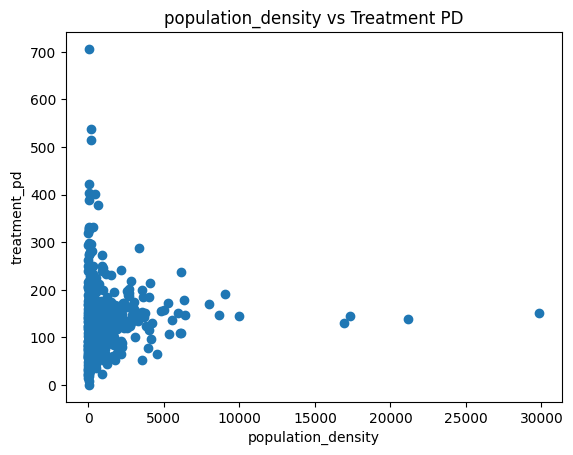

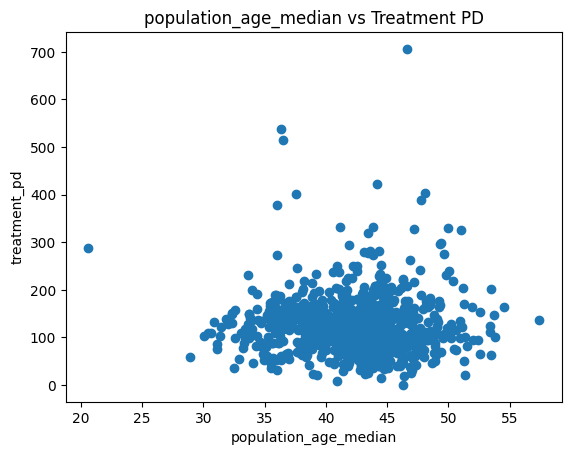

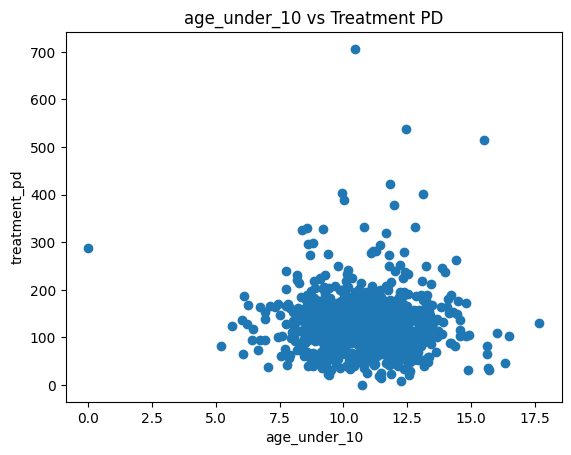

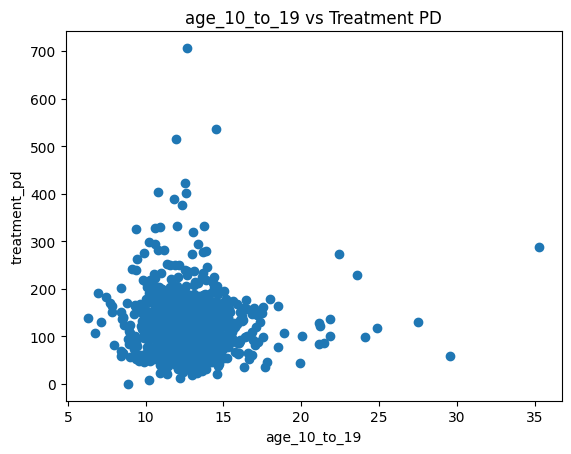

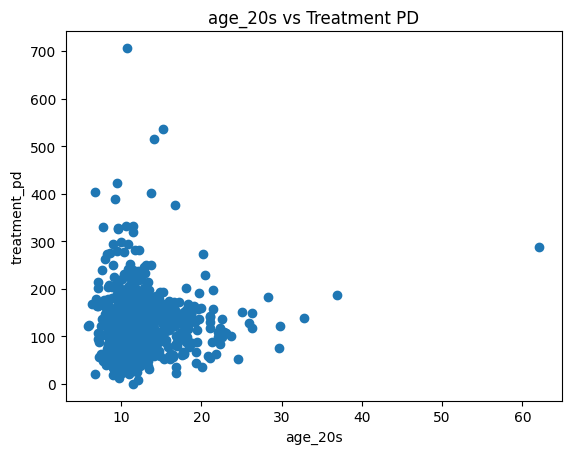

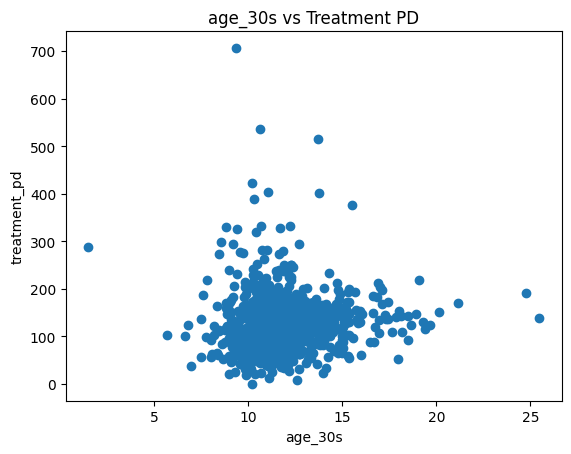

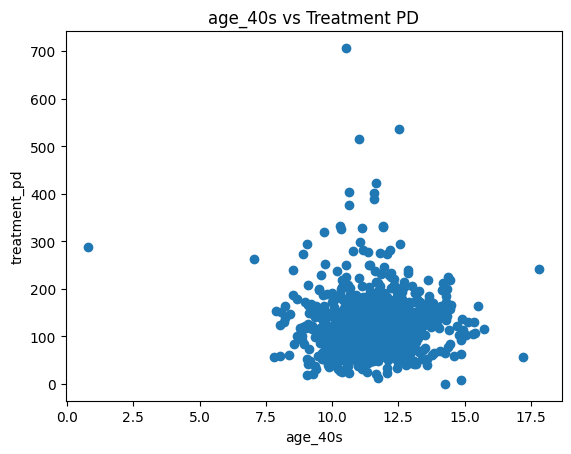

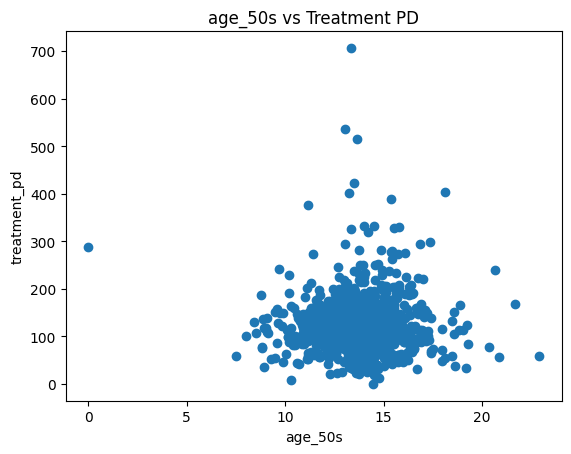

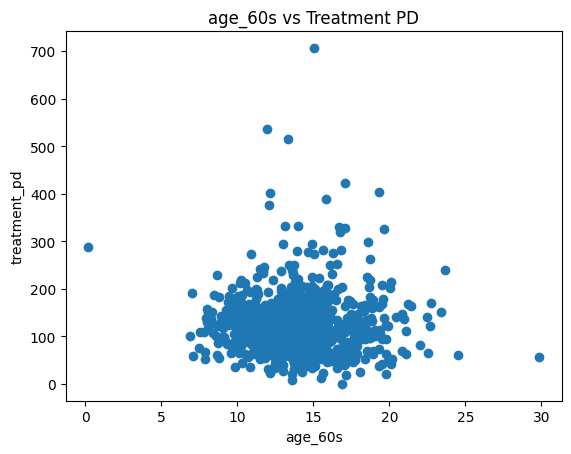

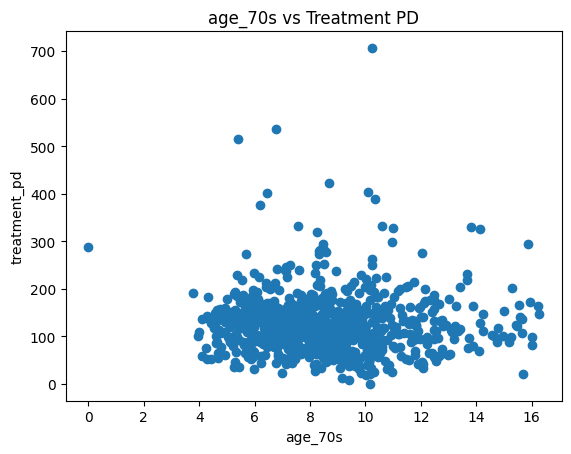

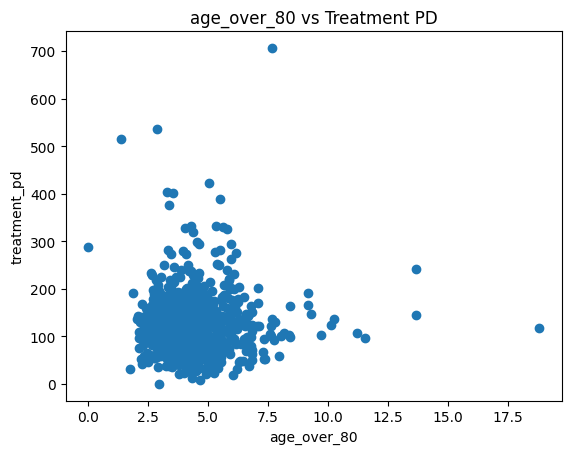

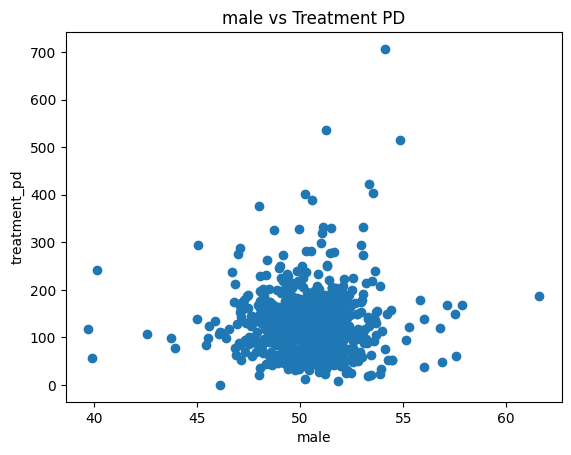

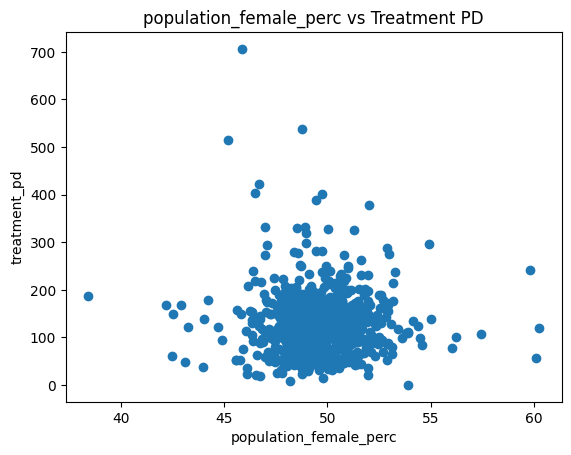

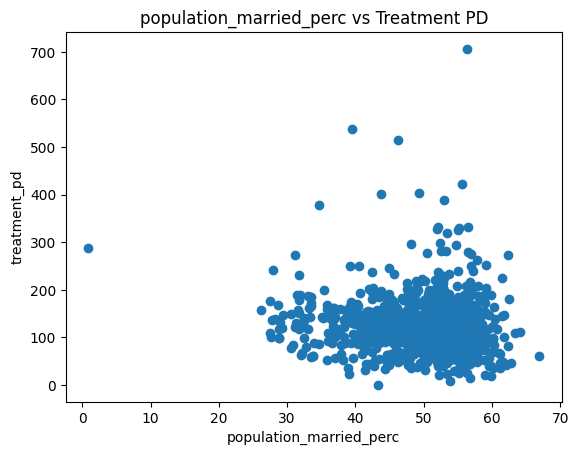

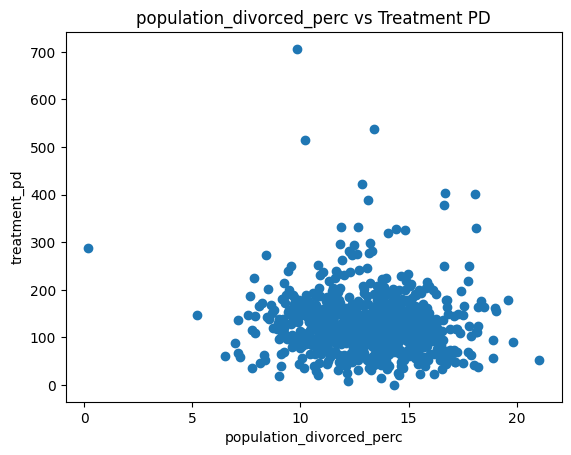

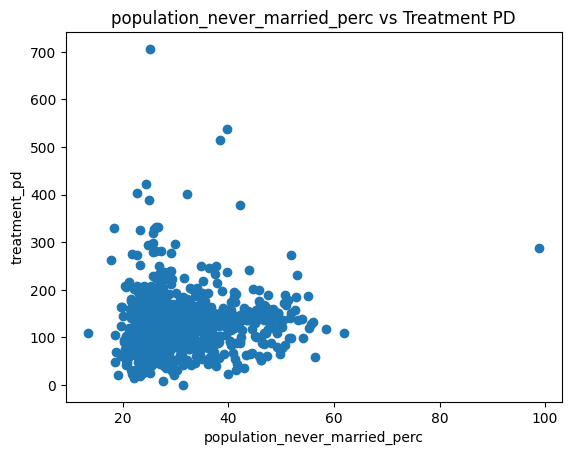

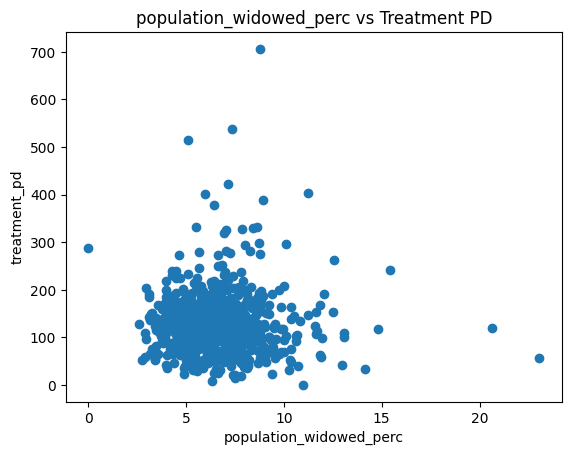

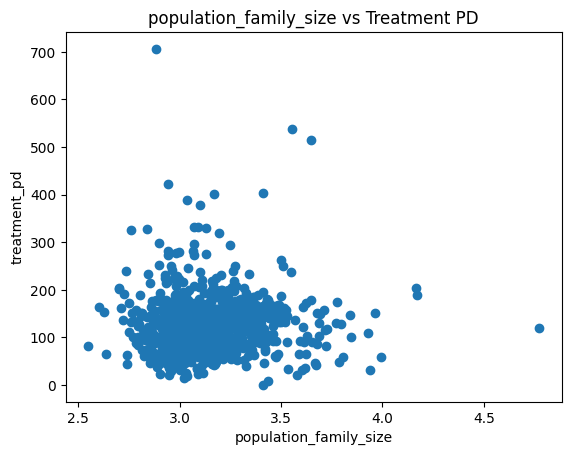

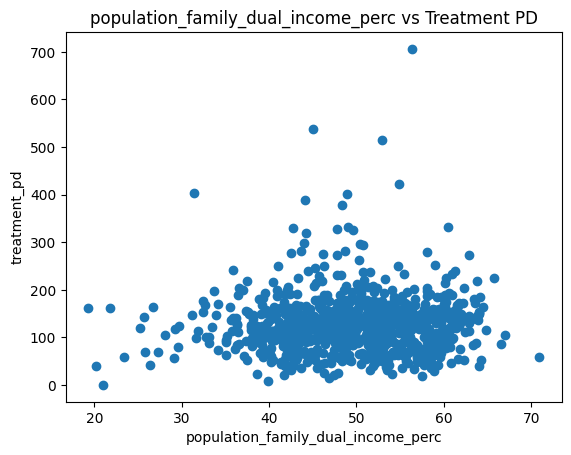

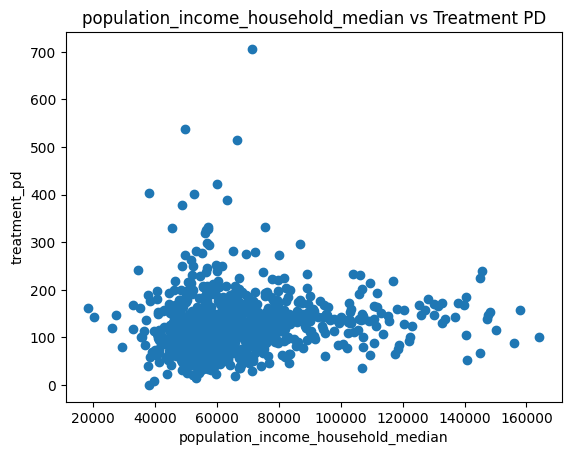

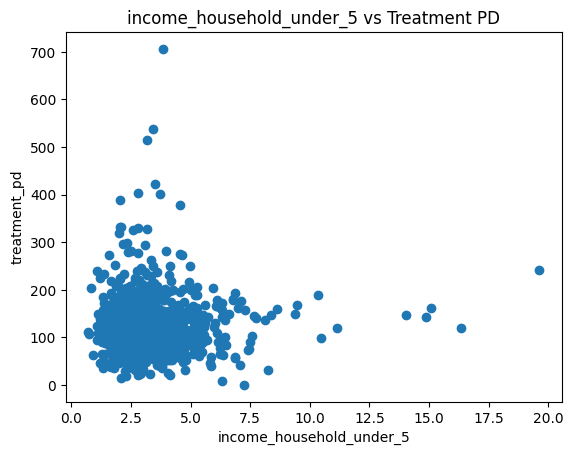

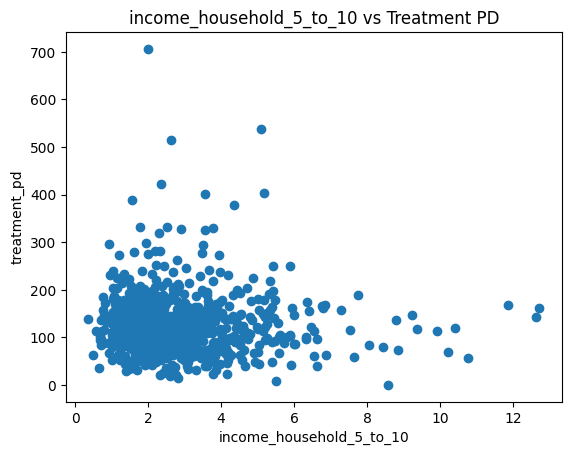

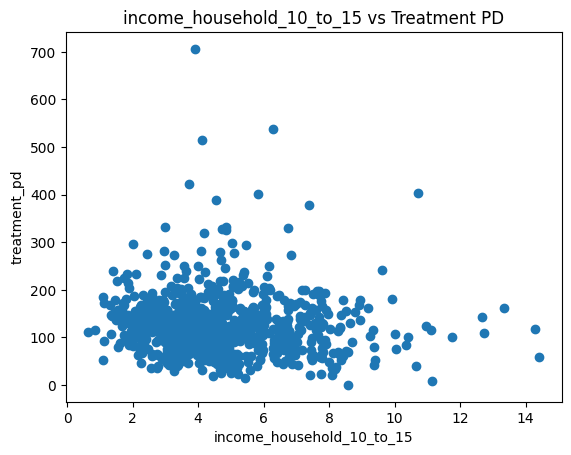

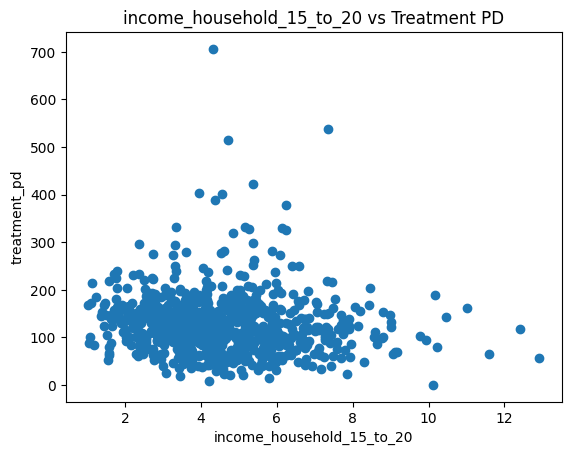

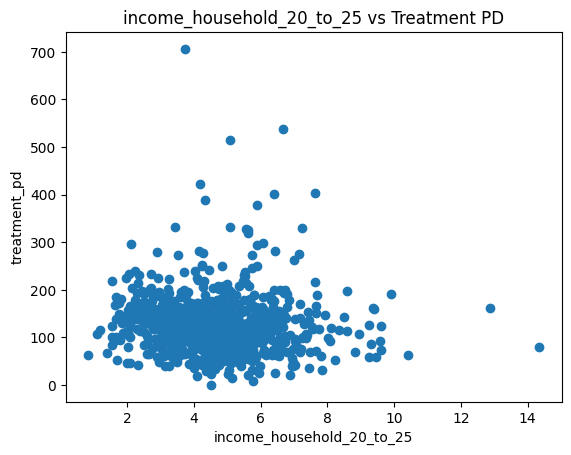

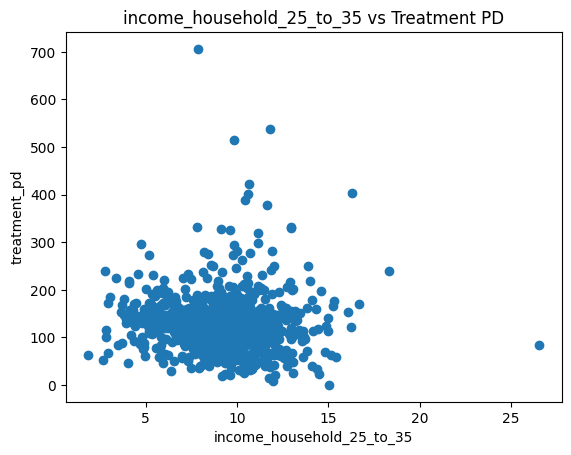

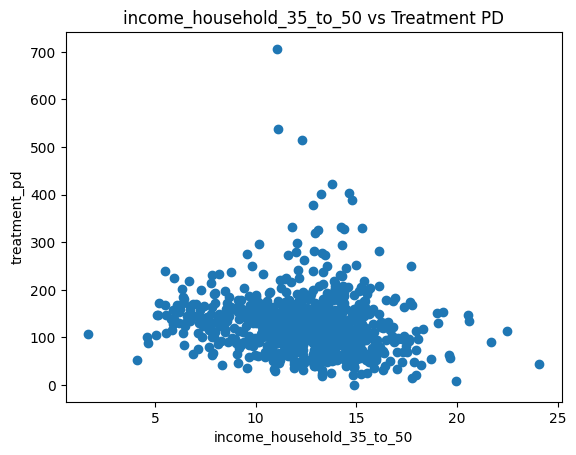

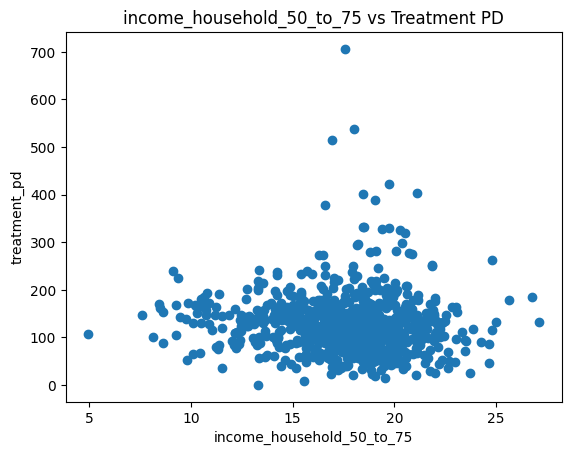

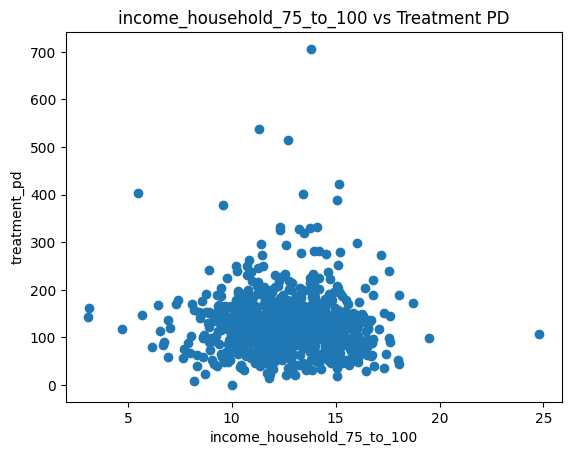

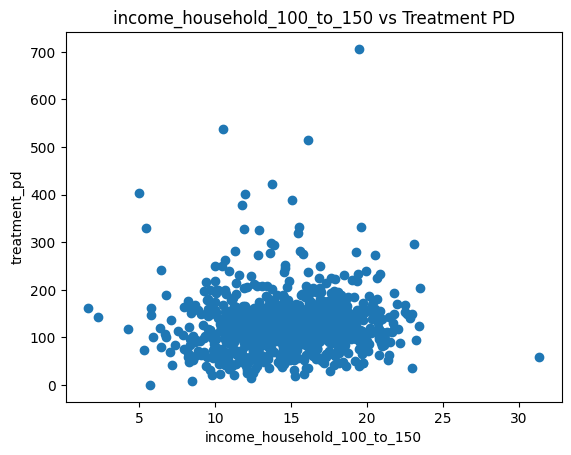

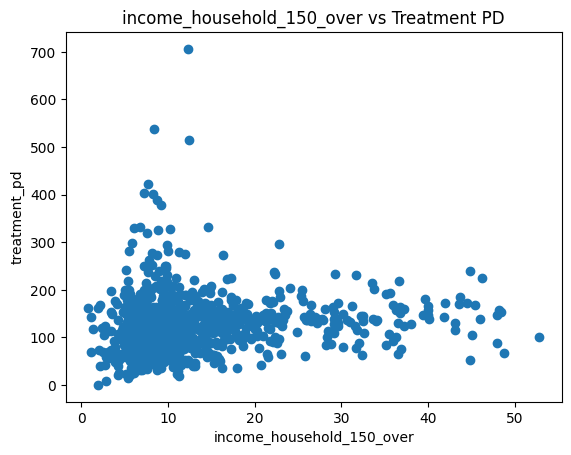

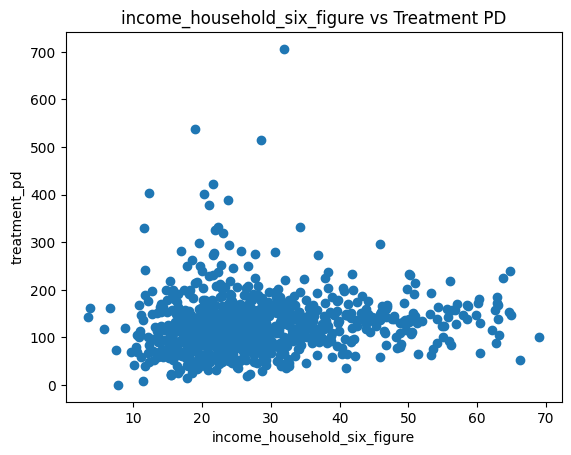

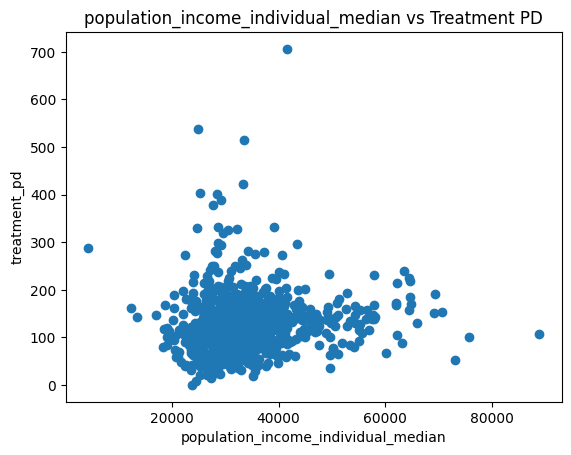

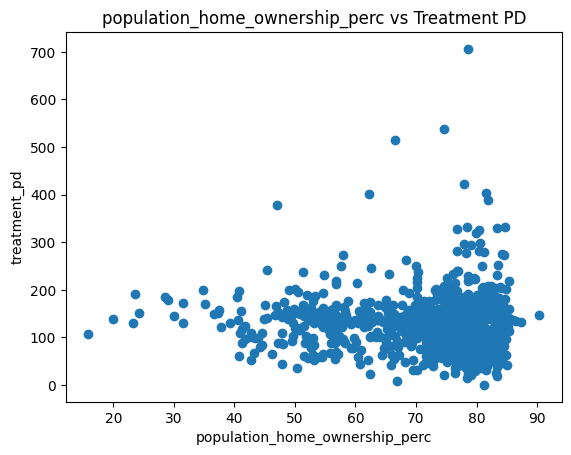

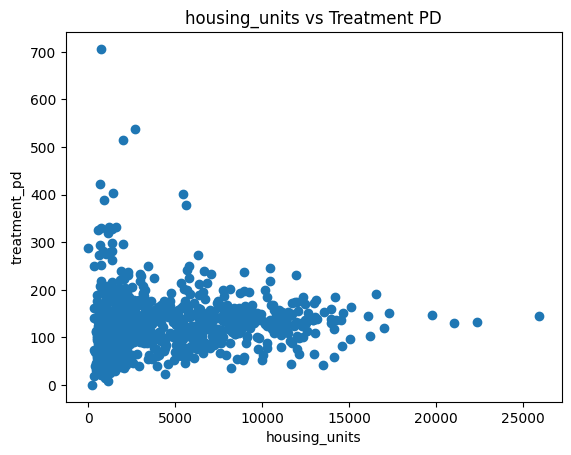

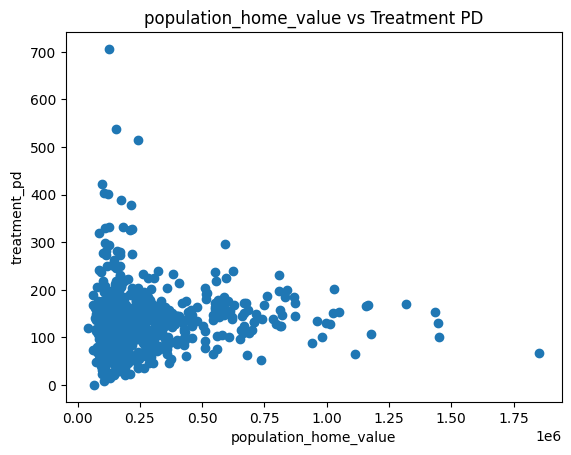

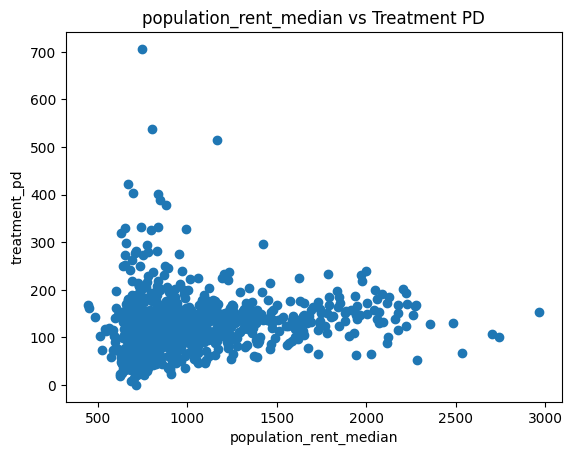

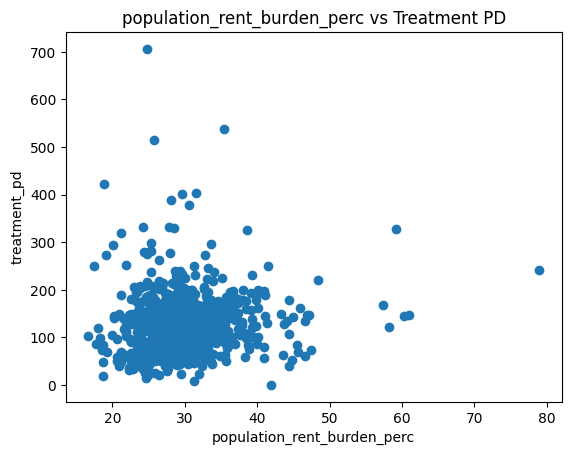

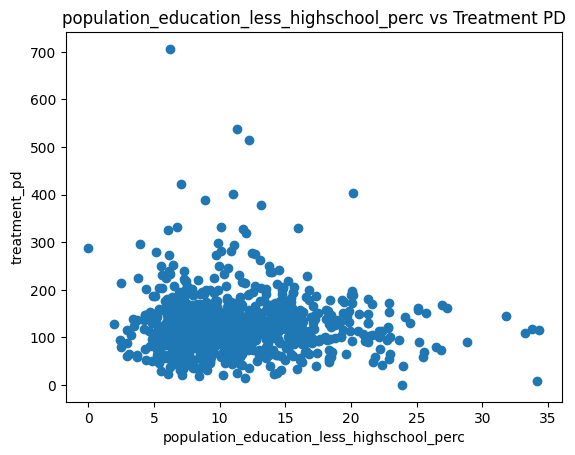

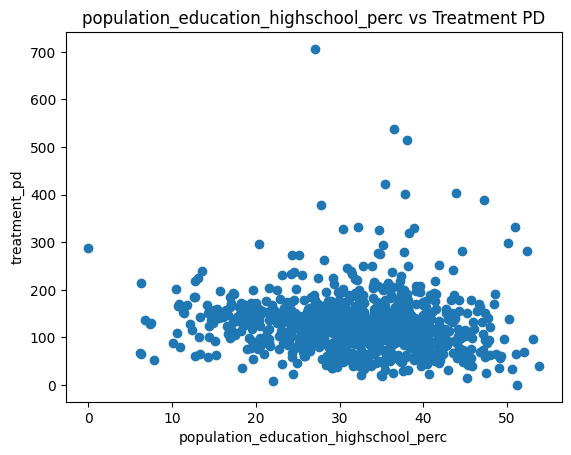

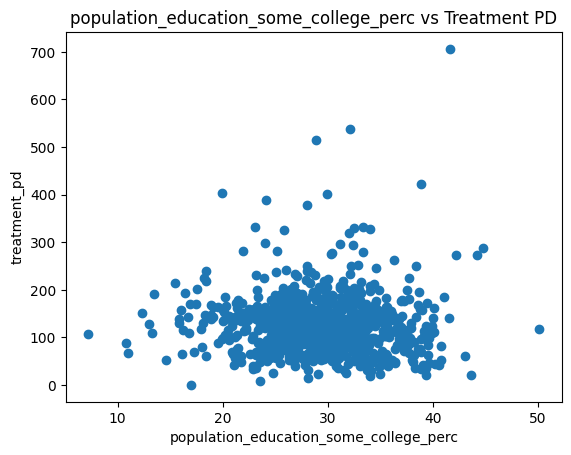

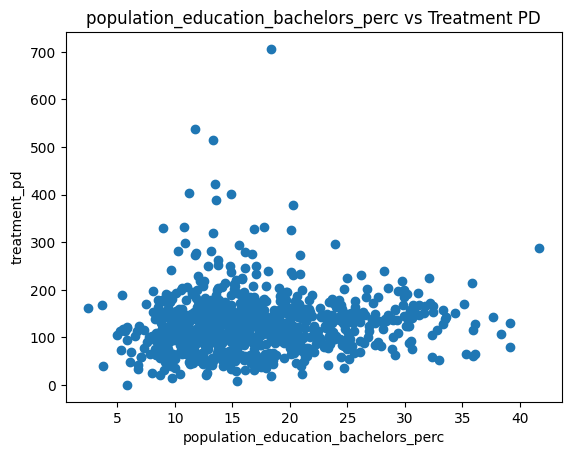

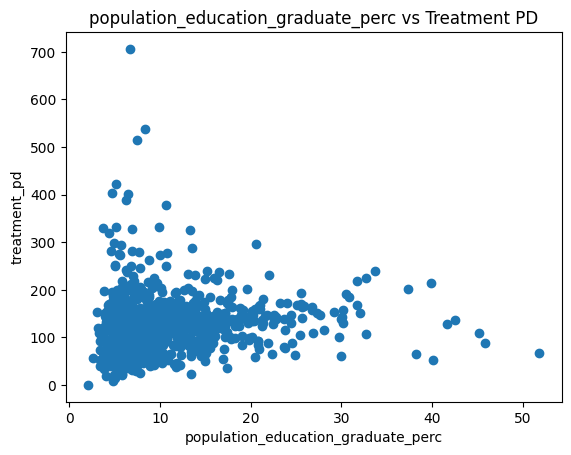

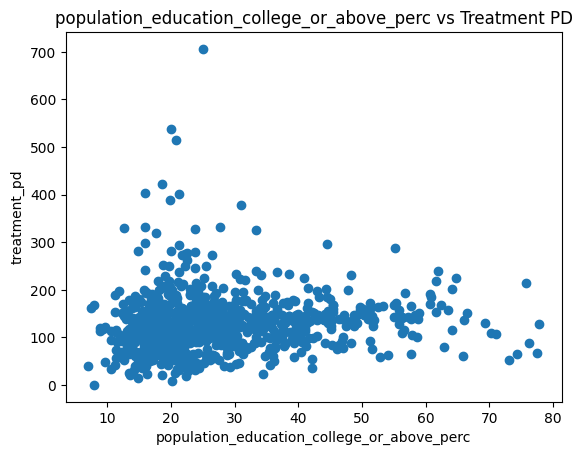

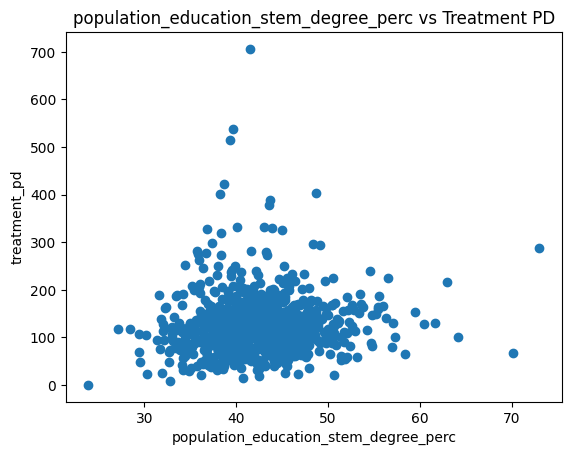

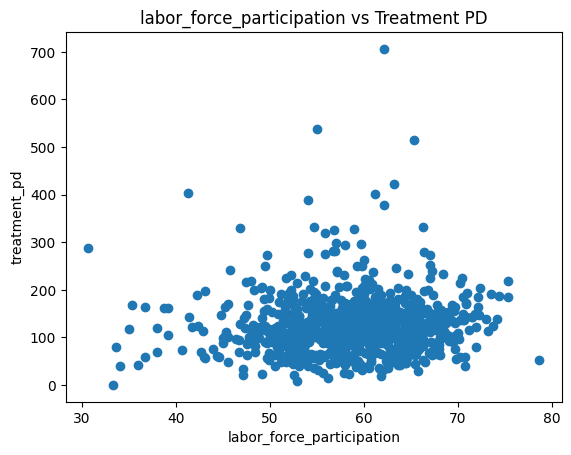

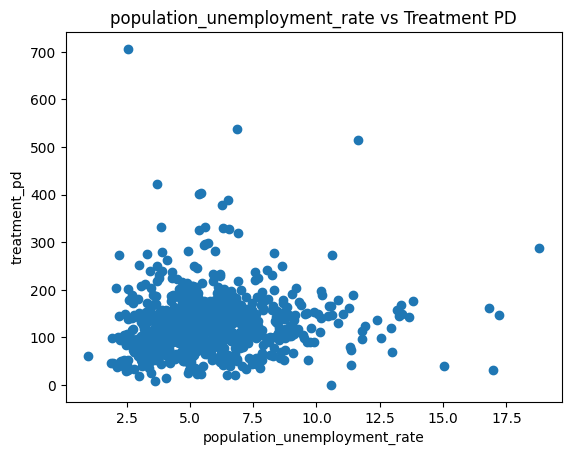

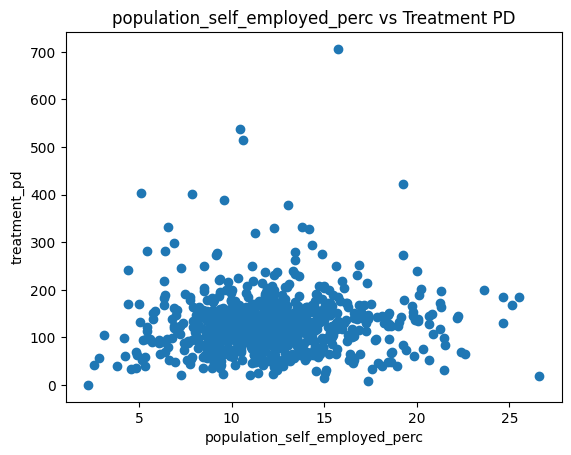

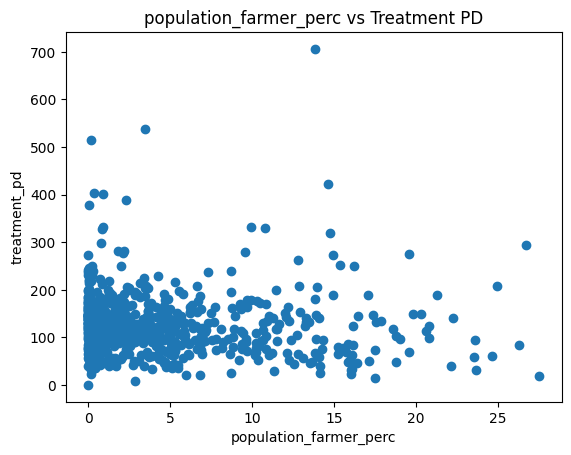

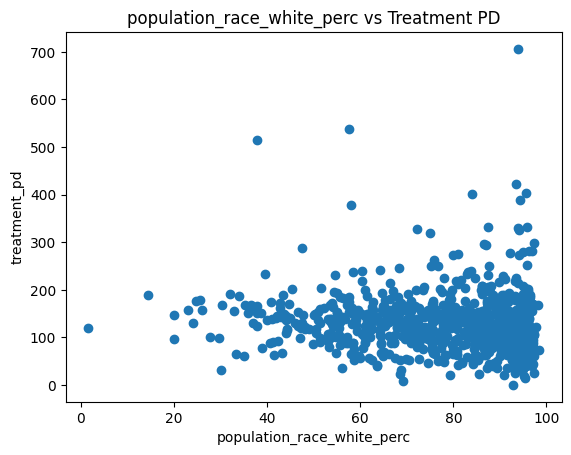

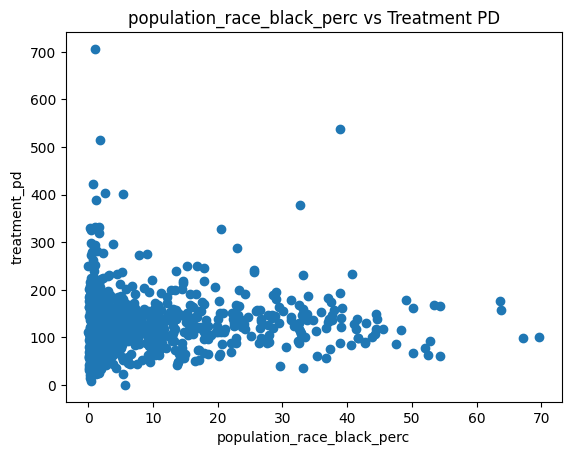

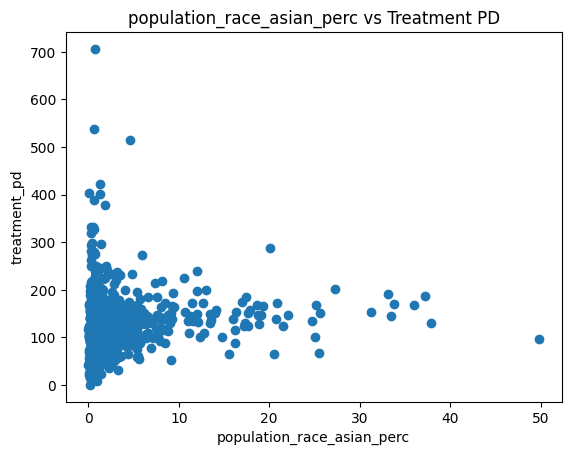

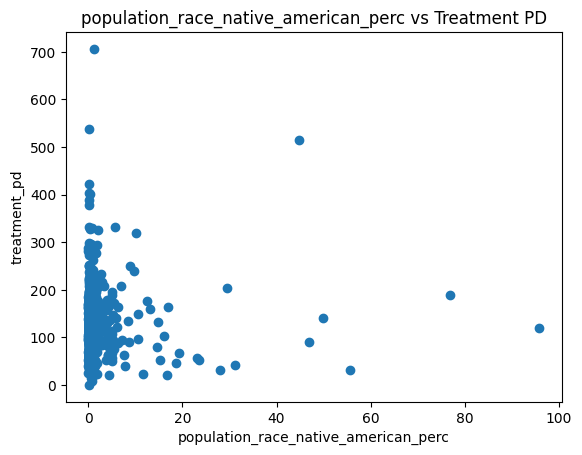

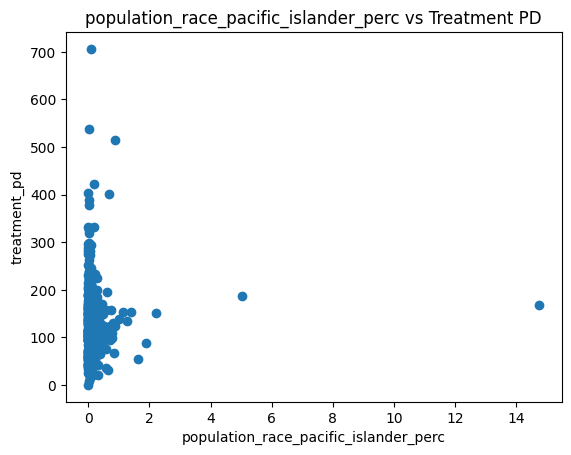

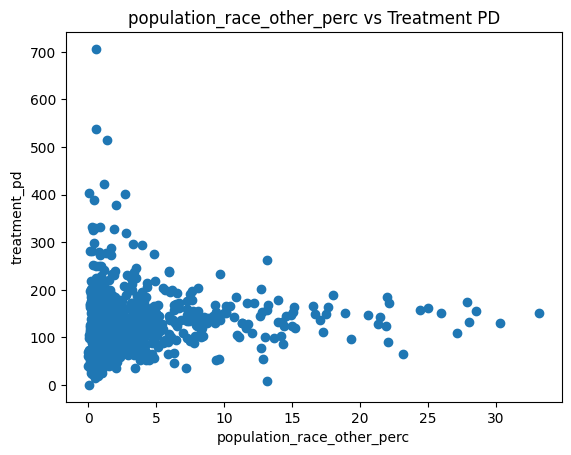

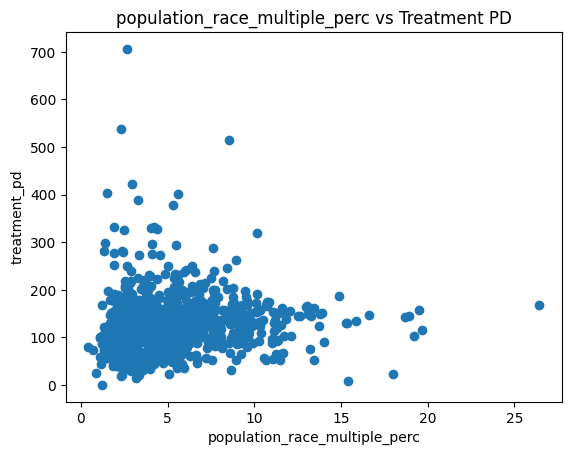

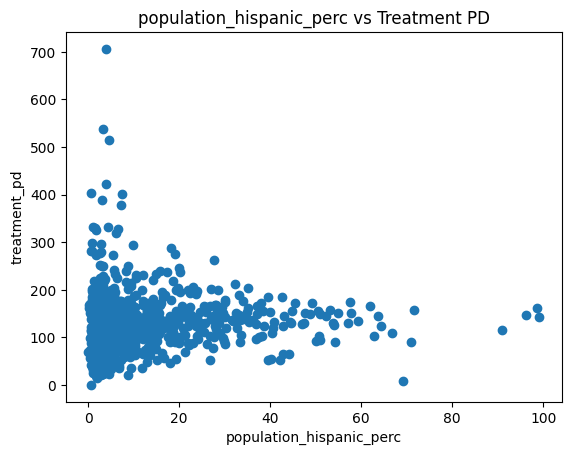

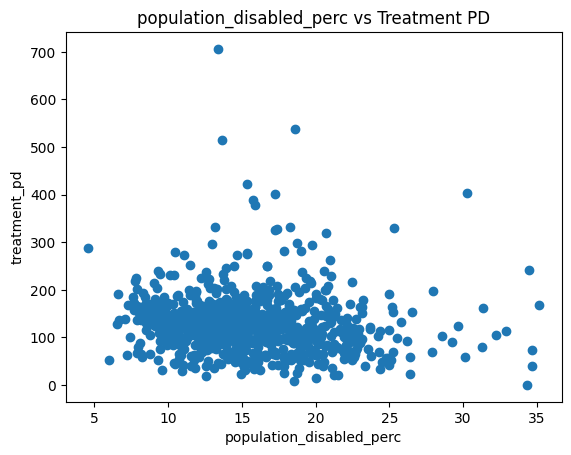

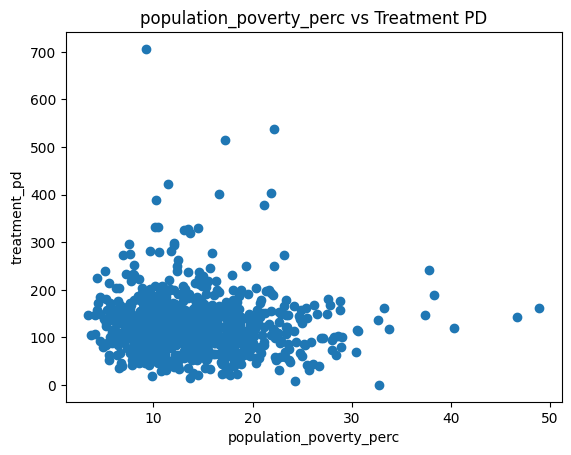

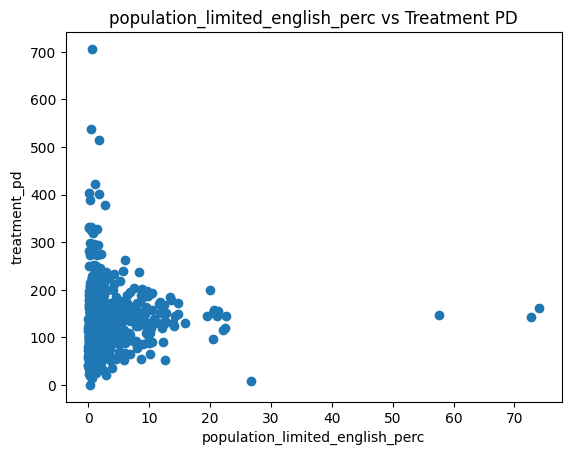

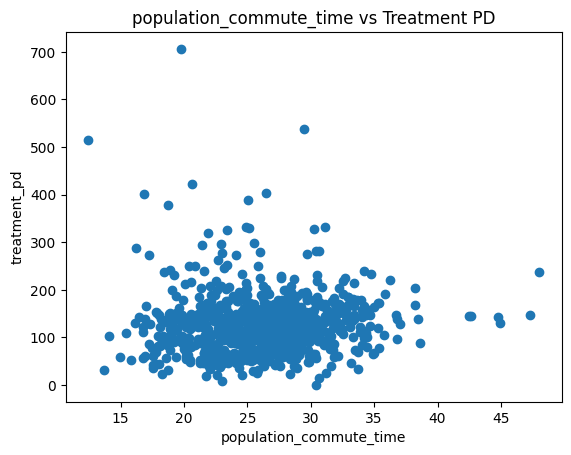

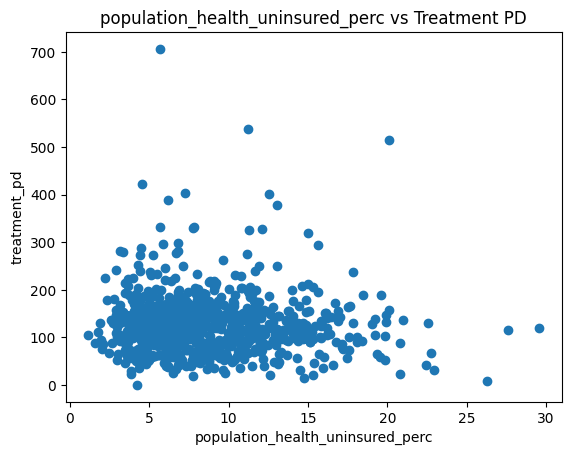

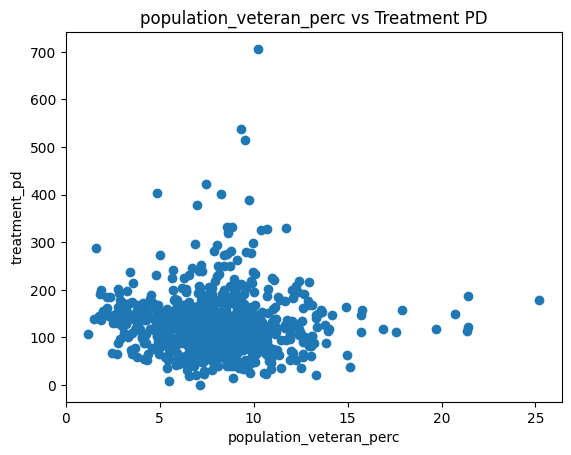

In [ ]:
for variable in population_level_features_df_float.columns[:-2]:
    scatter_plot_variable_vs_target(population_level_features_df_float_mean, variable, 'treatment_pd', variable + ' vs Treatment PD')

## Heatmap for correlation visualization between continous population features and treatment_pd

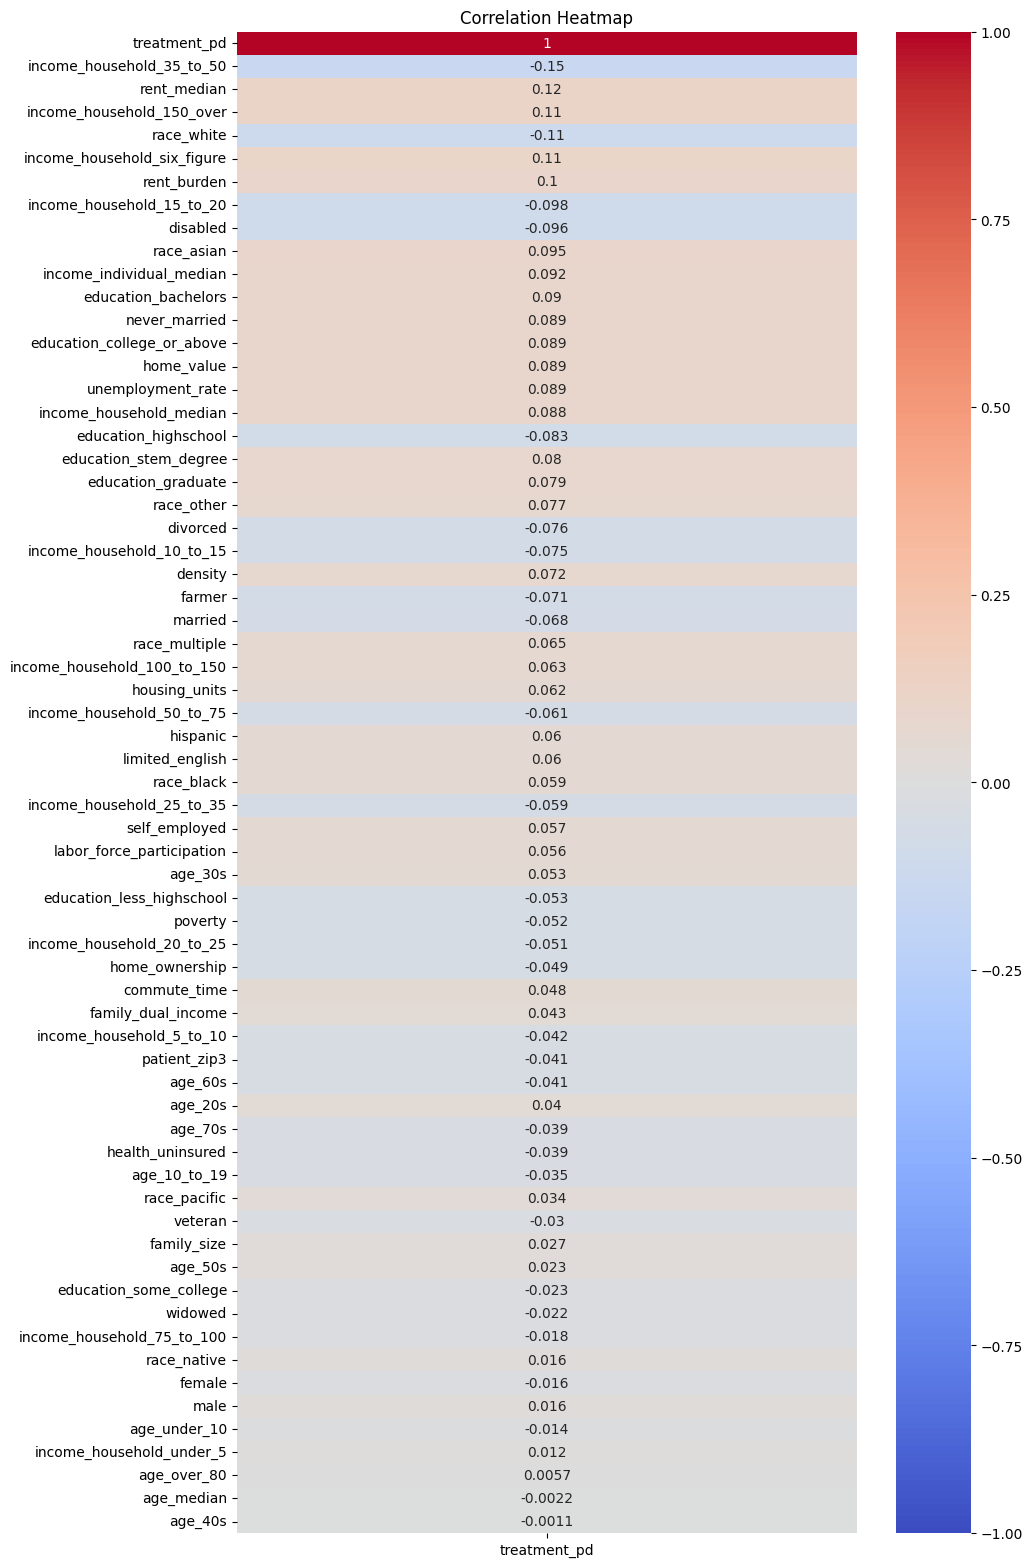

In [48]:
# Create a heatmap
correlations = population_level_features_df_float_mean.corr()['treatment_pd']
sorted_correlations = correlations.abs().sort_values(ascending=False)
sorted_correlations = correlations.loc[sorted_correlations.index]
plt.figure(figsize=(10, len(sorted_correlations) * 0.3))
sns.heatmap(sorted_correlations.to_frame(), annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## Do ANOVA test for categorical population features

In [ ]:
population_level_features_df_object

region            division  patient_zip3  treatment_pd
0           West             Pacific           917            35
1        Midwest  East North Central           451            33
2          South  West South Central           773            24
3           West             Pacific           928           455
4      Northeast     Middle Atlantic           112           162
...          ...                 ...           ...           ...
27669    Midwest  West North Central           653            25
27670    Midwest  East North Central           462            22
27671      South  West South Central           769            28
27672       West            Mountain           853           169
27673       West             Pacific           923            91

[27674 rows x 4 columns]

In [ ]:

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'df' is your DataFrame, 'categorical_var' is your categorical variable,
# and 'continuous_var' is your continuous variable.
model = ols('treatment_pd ~ C(region)', data=population_level_features_df_object).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame

print(anova_table)


                 sum_sq       df         F    PR(>F)
C(region)  8.279059e+05      3.0  7.826282  0.000032
Residual   9.678301e+08  27447.0       NaN       NaN


In [ ]:

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'df' is your DataFrame, 'categorical_var' is your categorical variable,
# and 'continuous_var' is your continuous variable.
model = ols('treatment_pd ~ C(division)', data=population_level_features_df_object).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame

print(anova_table)


                   sum_sq       df         F        PR(>F)
C(division)  1.796693e+06      8.0  6.374345  2.679338e-08
Residual     9.668613e+08  27442.0       NaN           NaN
